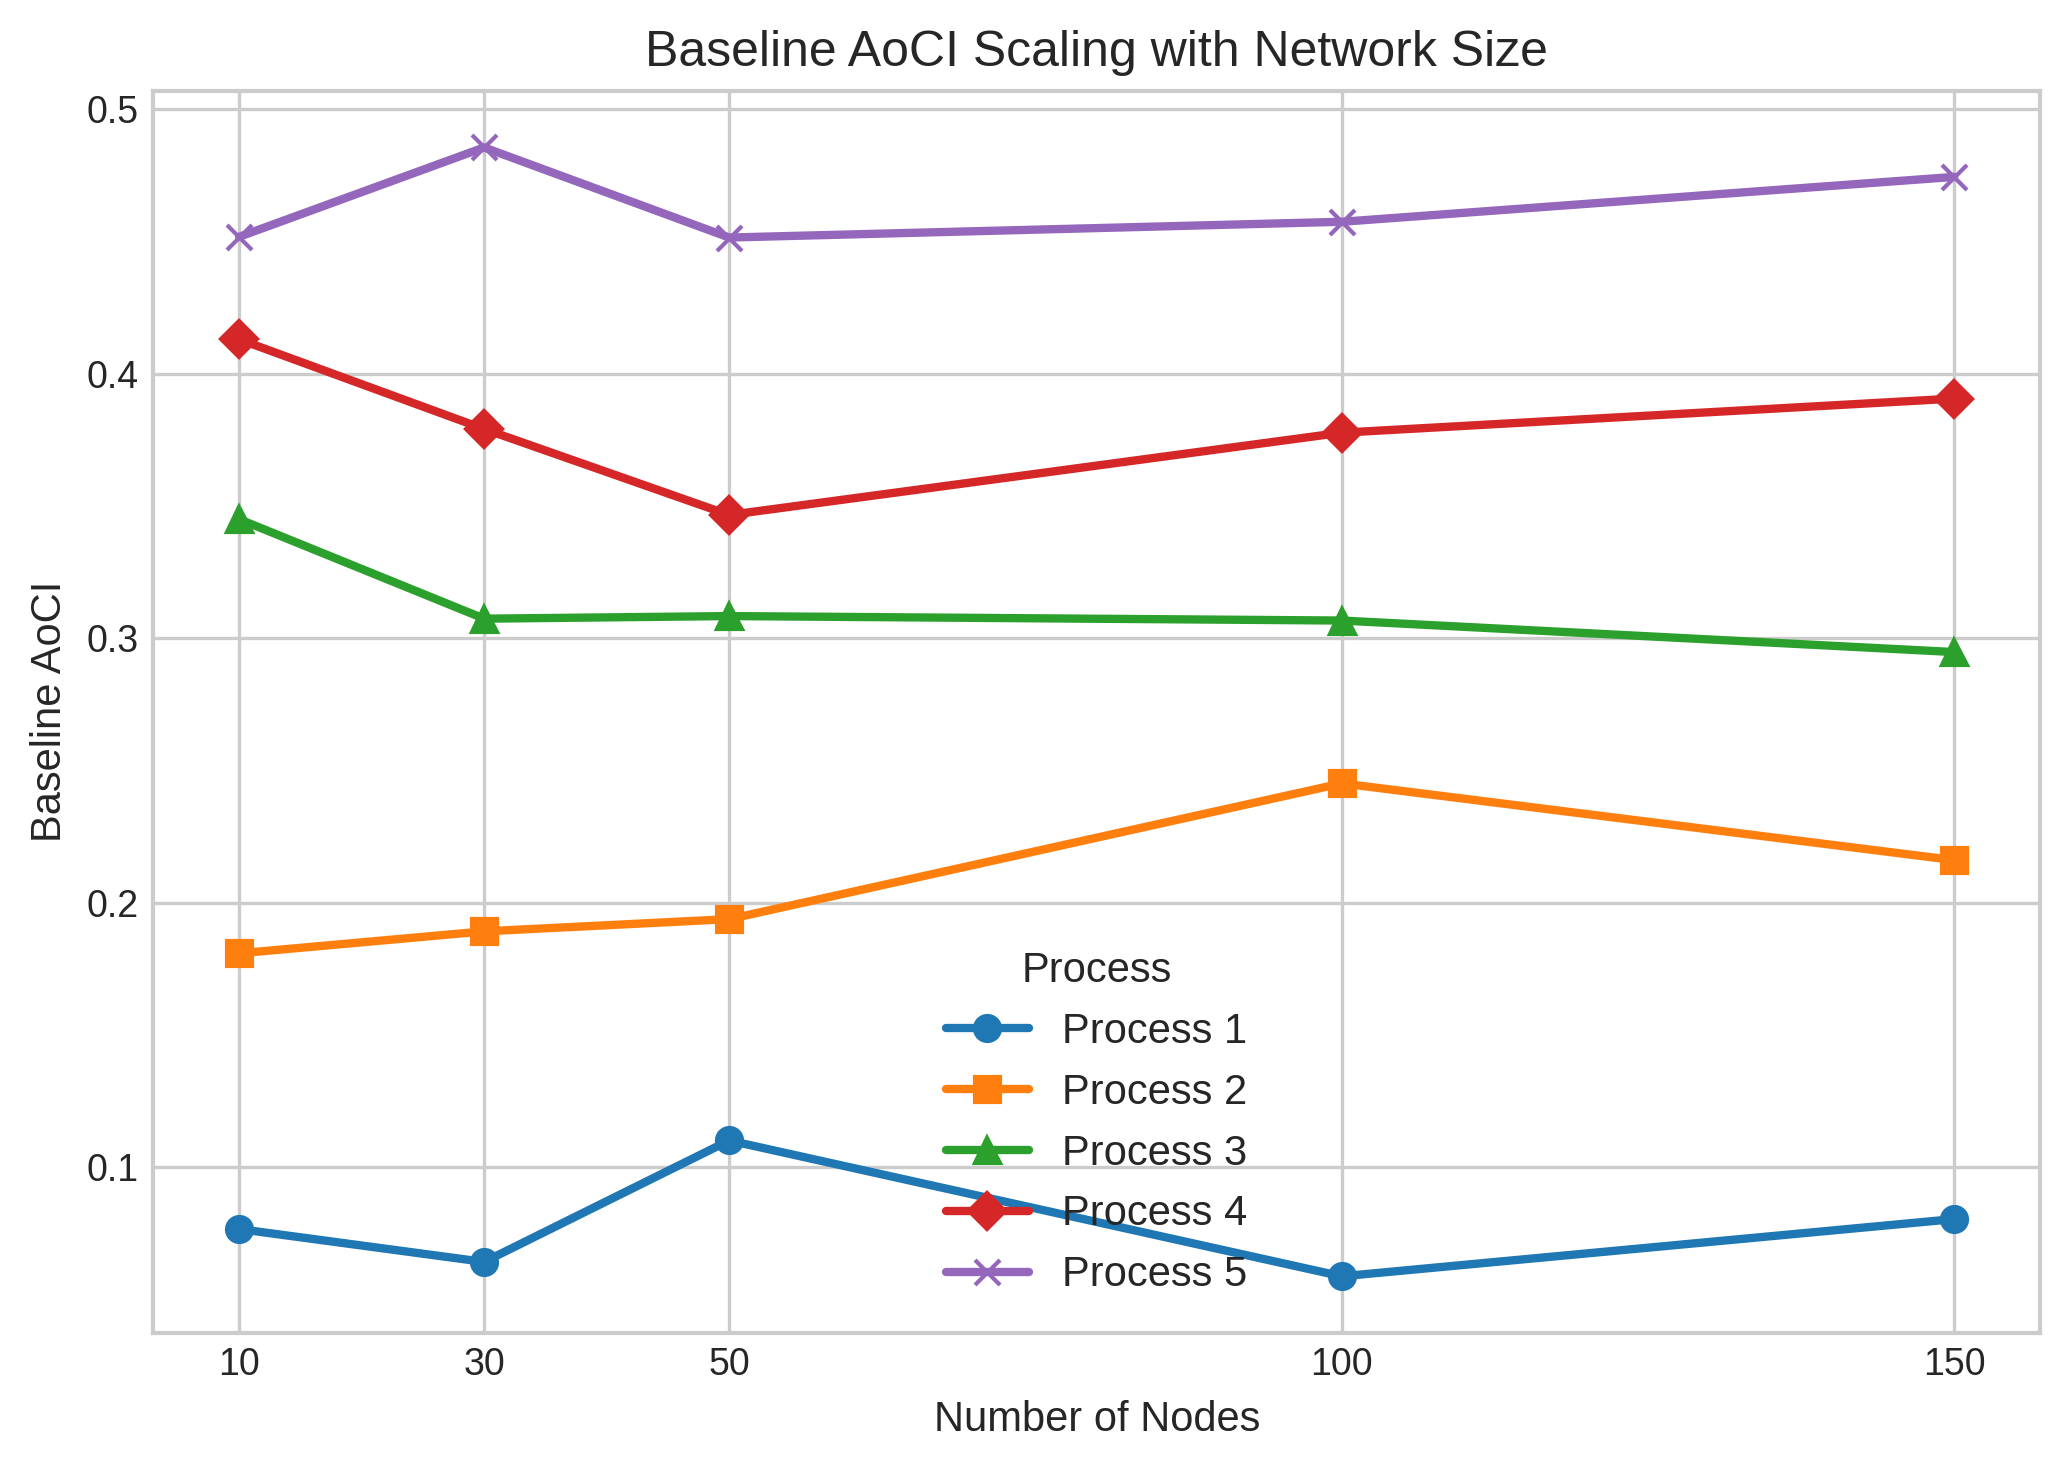

In [ ]:
plt.figure(figsize=(7,5))

for i, process_id in enumerate(sorted(df['process'].unique())):
    subset = df[df['process'] == process_id]
    plt.plot(subset['nodes'],
             subset['baselinecost'],
             marker=markers[i],
             linewidth=2,
             label=f'Process {process_id}')

plt.xlabel('Number of Nodes')
plt.ylabel('Baseline AoCI')
plt.title('Baseline AoCI Scaling with Network Size')
plt.legend(title="Process")
plt.xticks([10,30,50,100,150])
plt.tight_layout()

plt.savefig("Fig_Baseline_AoCI.png", dpi=300)
plt.show()


VERSION 6 : Pocess=1, Nodes=[30,50], Plotting Abs AOCI Degradation % Vs different Errors injection [1 to 10]

In [ ]:
!pip install ypstruct
!pip install xlwt
!pip install openpyxl
!pip install xlrd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
system_node=[30,60,90]
for i,node in enumerate(system_node):
  print(node)

30
60
90


In [ ]:
                     ########### VERSION 6   ###################


import matplotlib.pyplot as plt
import random
import math
import numpy as np
from ypstruct import structure
import collections
import os
import numpy as np
import matplotlib.pyplot as plt

# from xlwt import Workbook # Not used
# from  xlrd import open_workbook # No longer used
import openpyxl
from openpyxl import Workbook # Explicitly import Workbook
from random import *
import random
import sys
from datetime import datetime


from scipy.ndimage import gaussian_filter1d

import random
import numpy as np

# random.seed(42)
# np.random.seed(42)



############# Helping Functions ####################################
def writeToExcelFile(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    excel_path = '/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx'

    if not os.path.exists(excel_path):
        # Ensure the directory exists before attempting to save the file
        os.makedirs(os.path.dirname(excel_path), exist_ok=True)
        book = Workbook()
        # Remove default sheet if it exists (usually 'Sheet' or 'Sheet1')
        if 'Sheet' in book.sheetnames:
            book.remove(book['Sheet'])
        elif 'Sheet1' in book.sheetnames:
            book.remove(book['Sheet1'])

        book.create_sheet('GA')
        book.create_sheet('PSO')
        book.save(excel_path)
        print(f"Created new Excel file with 'GA' and 'PSO' sheets at: {excel_path}")

    # Load the workbook (guaranteed to exist now)
    book_loaded = openpyxl.load_workbook(excel_path)
    sheet_ga = book_loaded['GA']

    # Determine the row count for appending data
    # max_row returns the highest row number containing data. +1 for the next empty row.
    rowCount_to_write = sheet_ga.max_row + 1

    print("Total number of Rows written   ",rowCount_to_write)
    writedata(book_loaded, rowCount_to_write, 1, costofprocess, totalcost, EtaS, EtaT, RohS, RohT, TotalDataCollected, convergega, avgtimeelapedga)

#Data to specified cells.
def writedata(book, rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    sheet = book['GA'] # Access 'GA' sheet from the passed workbook object

    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime

    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1


    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1

    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergega
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedga



    book.save('/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx')
    print('saved')

############################################################################################################

def writeToExcelFile2(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    excel_path = '/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx'

    if not os.path.exists(excel_path):
        # Ensure the directory exists before attempting to save the file
        os.makedirs(os.path.dirname(excel_path), exist_ok=True)
        book = Workbook()
        if 'Sheet' in book.sheetnames:
            book.remove(book['Sheet'])
        elif 'Sheet1' in book.sheetnames:
            book.remove(book['Sheet1'])

        book.create_sheet('GA')
        book.create_sheet('PSO')
        book.save(excel_path)
        print(f"Created new Excel file with 'GA' and 'PSO' sheets at: {excel_path}")

    book_loaded = openpyxl.load_workbook(excel_path)
    sheet_pso = book_loaded['PSO']

    rowCount_to_write = sheet_pso.max_row + 1

    print("Total number of Rows written   ",rowCount_to_write)
    writedata2(book_loaded, rowCount_to_write, 1, costofprocess, totalcost, EtaS, EtaT, RohS, RohT, TotalDataCollected, convergepso, avgtimeelapedpso)

#Data to specified cells.
def writedata2(book, rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    sheet = book['PSO'] # Access 'PSO' sheet from the passed workbook object

    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime

    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1


    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1

    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergepso
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedpso


    book.save('/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx')
    print('saved')


def distribute(numbers, n):
    quotient, remainder = divmod(len(numbers), n)
    result = [numbers[i * quotient + min(i, remainder):(i + 1) * quotient + min(i + 1, remainder)] for i in range(n)]
    return result

def crossover(parent1, parent2, gamma=0.1):
    c1=parent1.deepcopy()
    c2=parent2.deepcopy()

    p1=c1.position.tolist()
    p2=c2.position.tolist()

    for i in range(1,random.randint(2,3)): #number of times you want to do crossover

        # select crossover point
        crossover_point = random.randint(1, len(parent1.position) - 1)

        # create offspring solution
        c1.position = np.array(p1[:crossover_point] + p2[crossover_point:])
        c2.position = np.array(p2[:crossover_point] + p1[crossover_point:])
        p1=c1.position.tolist()
        p2=c2.position.tolist()

    return c1, c2

def mutate2(x, mu):
    y=x.deepcopy()
    count=0
    for swaping_p in range(len(y.position)):
        if(random.random() < mu):
            swapedWith = np.random.randint(0,len(y.position))
            temp1=y.position[swaping_p]
            temp2=y.position[swapedWith]
            y.position[swapedWith]=temp1
            y.position[swaping_p]=temp2
            count=count+1

    return y


def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

def findmindistance(frame,v, allindex,distancematrix):
    L=len(allindex)
    devices=[]
    v1=int(frame[v].device[1:])-1

    for j in range(v-1, 0, -1) :
        v2=int(frame[j].device[1:])-1

        d=distancematrix[v1][v2]
#         print('v1=',v1,'v2=',v2,'dis ',d)
        devices.append(d)
    if len(devices)>0:
        m=min(devices)
    else:
        m=0
#     print('min=',m)
    return m


def distribute_random_numbers(n):
    # generate n random numbers
    nums = [random.random() for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums

def add_localization_noise(position, epsilon_q):
    noise = np.random.uniform(-epsilon_q, epsilon_q, size=position.shape)
    return position + noise

def calculate_noisy_distance(pos1, pos2, epsilon_q):
    noisy_pos1 = add_localization_noise(pos1, epsilon_q)
    noisy_pos2 = add_localization_noise(pos2, epsilon_q)
    return np.linalg.norm(noisy_pos2 - noisy_pos1)


def makedistancematrix(devloc):
    #devloc={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500),'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}
    #Structure of device location
    dismat=[]
    for i in range(1,no_devices+1):

        temp=[]
        device1="n"+str(i)
        node1=devloc[device1]

        for j in range(1,no_devices+1):

            if i !=j:
                device2="n"+str(j)
                node2=devloc[device2]
                distance=math.dist(node1,node2)

                #distance = calculate_noisy_distance(prev_position, next_position, epsilon_q)

            else:
                distance=0.0

            temp.append(distance)

        dismat.append(temp)


    return dismat

def count_consecutive_sequences(lst):
    count = 1
    num_sequences = 0
    current_elem = lst[0]

    for elem in lst[1:]:
        if elem == current_elem:
            count += 1
        else:
            current_elem = elem
            if count > 1:
                num_sequences += 1
            count = 1

    if count > 1:
        num_sequences += 1

    return num_sequences


def findtimedifference(v,frame,allindex):
    currentdevice=frame[v].device
    td=1
    if v-1 <0:
        return td
    for k in range(v-1, 0, -1) :
        loc=allindex[k]
        if frame[loc].device == currentdevice:
            td=frame[v].timestamp - frame[loc].timestamp
            break

    return td


def confirmnorepeat(L, avllist):
    #print("LLLLLL",L)

    for ind in range(len(L)-1):
        f=L[ind]
        s=L[ind+1]

        if f==s:
            while True:
                ch=random.choice(avllist)
                if ch!=f:
                    break


            L[ind+1]=ch

    return (L)


def CalculateMLambda(n):
    # generate n random numbers
    #nums = [random.random() for i in range(n)]
    nums = [random.uniform(0.28, 0.40) for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums


def generateDeviceLocation(no_devices):
    devlocation={}
    point_history=[]
    for i in range(1,no_devices+1):
        node=str("n"+str(i))
        #print(node)
        while True:
            pntX=randint(1, 1000)
            pntY=randint(1, 1000)
            if (pntX,pntY) not in point_history:
                point_history.append((pntX,pntY))
                devlocation[node]=(pntX,pntY)
                break
    return devlocation

def doDeviceProcessMapping(no_process,no_devices):
    numbers = [i for i in range(1,no_devices+1)]
    #random.shuffle(numbers)
    all_dist_p = distribute(numbers, no_process)
    i=1
    pdmap2={}
    for fr in all_dist_p:
        pr=str("p"+str(i))
        i=i+1
        for nd in fr:
            node=str("n"+str(nd))
            pdmap2[node]=pr

    return pdmap2



def findTotalDataGathered(frame,PlayTime):
    count=0
    for i in range(0,len(frame)):
        if frame[i].timestamp <= PlayTime:
            count=count+1

    return count

def findPositionLocation(position,devicelocation):

    PL=[]
    for p in position:
        val=devicelocation[p]
        PL.append(float(val[0]))
        PL.append(float(val[1]))
    return PL


def findNearestDevice(positionlocation, devicelocation,sets,hm_samevalue):
    dic={}
    pos=[]
    k=0

    l=len(positionlocation)
#     print(l)
    for i in range(0,l-1,2):
        x=positionlocation[i]
        y=positionlocation[i+1]
#         print(x,y)
        for nd in sets:
            dist = math.dist((x, y), devicelocation[nd])
            dic[nd]=dist
#             print(dist)

#         print(dic)
        sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
        first_key, first_value = next(iter(sorted_dic.items()))
        iterator = iter(sorted_dic.items())

        # Skip the first element
        next(iterator)

        # Retrieve the second element
        second_key, second_value = next(iterator)
#         print(sorted_dic)
#         print(first_key, first_value)
#         print(second_key, second_value)

        if k==0:
            pos.append(first_key)
        else:
            lpos=len(pos)
            if pos[lpos-1]==first_key:
                if hm_samevalue>=5:
                    third_key, third_value = next(iterator)
                    fourth_key, fourth_value = next(iterator)
                    randomly_selected_key=random.choice([first_key,second_key,third_key,fourth_key])
                    pos.append(randomly_selected_key)
                else:
                    pos.append(second_key)
            else:
                pos.append(first_key)
        k=k+1
#     print(pos)
    return pos


# Start measuring time elapsed
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

# End mesuring time elapsed
def toc():
    import time, math
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.
#         print('Elapsed time is {} second(s).'.format(dt))
        return dt
    else:
        print('Start time not set. You should call tic before toc.')


def count_same_values_from_right(lst):
    count = 0
    last_element = lst[-1]

    # Iterate through the list from right to left
    for i in range(len(lst) - 1, -1, -1):
        if lst[i] == last_element:
            count += 1
        else:
            break

    return count



#############################################################################
#             PSO Algorithm starts
###############################################################################

def PSOrun(problem, params,d,initialpop,ga_aoi):
    import time
    extra_time=0
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar               #particle's size
    nVar=nvar
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances
    devicelocation=problem.devicelocation

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 nodes is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.MaxIter
    npop = params.PopSize
    c1 = params.c1
    c2 = params.c2
    w = params.w
    wdamp = params.wdamp


    # Empty Individual Particle Template

    empty_individual = structure()
    empty_individual.position = None
    empty_individual.positionlocation = None
    empty_individual.velocity = None
    empty_individual.cost = None
    empty_individual.dataCollected=None
    empty_individual.best_position=None
    empty_individual.best_positionlocation=None
    empty_individual.best_cost=None

#     Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Best Solution Ever Found
    gbest = empty_individual.deepcopy()
    gbest.position = None
    gbest.positionlocation = None
    gbest.cost = np.inf

    # Create Initial Population
    pop = empty_individual.repeat(npop)
    hm_samevalue=0
    for i in range(npop):
#         pos=[]
#         for k in range(1,nvar+1):
#             pos.append(random.choice(allsets[d]))

#         pos=confirmnorepeat(pos,allsets[d])
#         pop[i].position = np.array(pos)
        pop[i].position=initialpop[i].position

        posloc=findPositionLocation(pop[i].position,devicelocation)

        pop[i].positionlocation=np.array(posloc)

        pop[i].velocity = np.zeros(nvar*2)

        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored


        pop[i].best_position = pop[i].position.copy()
        pop[i].best_positionlocation = pop[i].positionlocation.copy()
        pop[i].best_cost = pop[i].cost

        if pop[i].best_cost < gbest.cost:
            gbest.position = pop[i].best_position.copy()
            gbest.positionlocation = pop[i].best_positionlocation.copy()
            gbest.cost = pop[i].best_cost


    # To store Best Cost of all Iterations
    bestcost = np.empty(maxit*3)

    prev_gbest_cost    =gbest.cost

    # PSO Loop
    for it in range(0, maxit*3):
        for i in range(0, npop):

#             pop[i].velocity = w*pop[i].velocity \
#                 + c1*np.random.rand(nVar)*(pop[i].best_position - pop[i].position) \
#                 + c2*np.random.rand(nVar)*(gbest.position - pop[i].position)

            pop[i].velocity = w*pop[i].velocity \
                + c1*np.random.rand(nVar*2)*(pop[i].best_positionlocation - pop[i].positionlocation) \
                + c2*np.random.rand(nVar*2)*(gbest.positionlocation - pop[i].positionlocation)




            pop[i].positionlocation += pop[i].velocity
#             pop[i].positionlocation = np.maximum(pop[i].positionlocation, varmin)
#             pop[i].positionlocation = np.minimum(pop[i].positionlocation, varmax)


            start_time1 = time.time()
            pos=findNearestDevice(pop[i].positionlocation, devicelocation,allsets[d],hm_samevalue)
            pop[i].position=np.array(pos)

            #Added these lines to test { Starts
            posloc=findPositionLocation(pop[i].position,devicelocation)
            pop[i].positionlocation=np.array(posloc)
            #Added these lines to test } Ends
            end_time1 = time.time()
            time_difference1 = end_time1 - start_time1
            extra_time=extra_time+time_difference1



            RV = costfunc(pop[i].position)
            pop[i].cost = RV.costvalue
            pop[i].dataCollected=nvar-RV.dataignored



            if pop[i].cost < pop[i].best_cost:
                pop[i].best_position = pop[i].position.copy()
                pop[i].best_positionlocation = pop[i].best_positionlocation.copy()
                pop[i].best_cost = pop[i].cost

                if pop[i].best_cost < gbest.cost:
                    gbest.position = pop[i].best_position.copy()
                    gbest.positionlocation = pop[i].best_positionlocation.copy()
                    gbest.cost = pop[i].best_cost

        w *= wdamp
#         print('PSO :: Iteration {}: Best Cost = {}'.format(it, gbest.cost))
        # Store Best Cost
        bestcost[it] = gbest.cost
        if gbest.cost <= ga_aoi:
            break
        if prev_gbest_cost == gbest.cost:
            hm_samevalue=hm_samevalue+1
        else:
            prev_gbest_cost = gbest.cost
            hm_samevalue=0

    # Output
#     out = structure()
#     out.pop = pop
#     out.bestsol = bestsol
#     out.bestcost = bestcost


    out = structure()
    out.pop = pop
    out.bestsol = gbest
    out.bestcost = bestcost
    out.extra_time=extra_time
    #print(out.bestsol)
    return out


###############################################################################
#             GA Algorithm
###############################################################################

def run(problem, params,d):

    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar          #chromosome size
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 drone is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    empty_individual.dataCollected=None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    initialpop=empty_individual.repeat(npop)

    for i in range(npop):

        pos=[]
        for k in range(1,nvar+1):
            pos.append(random.choice(allsets[d]))

        pos=confirmnorepeat(pos,allsets[d])

        pop[i].position = np.array(pos)
        initialpop[i].position=np.array(pos)
        #pop[i].cost = costfunc(pop[i].position)
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored

        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)

    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
#         if avg_cost != 0:
#             costs = costs/avg_cost

        costs = costs/(avg_cost+1)
        probs = np.exp(-beta*costs)

        popc = []                            # child population
        for _ in range(nc//2):


#             # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]

            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
#             c1 = mutate(c1, mu, sigma)
#             c2 = mutate(c2, mu, sigma)
            # Perform Mutation
            c1 = mutate2(c1, mu)
            c2 = mutate2(c2, mu)
            c1.position=confirmnorepeat(c1.position,allsets[d])
            c2.position=confirmnorepeat(c2.position,allsets[d])


            # Evaluate First Offspring
            #c1.cost = costfunc(c1.position)
            RV = costfunc(c1.position)
            c1.cost = RV.costvalue
            c1.dataCollected=nvar-RV.dataignored

            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            #c2.cost = costfunc(c2.position)

            RV = costfunc(c2.position)
            c2.cost = RV.costvalue
            c2.dataCollected=nvar-RV.dataignored

            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)


        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
#         print("GA :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    out.initialpop=initialpop
    return out


########################### ACO version 2 ##########################

def ACOrun_problem(problem, paramsaco, d, initialpop=None):
    import numpy as np
    from ypstruct import structure

    # Problem and parameter unpacking
    costfunc = problem.costfunc
    nvar = problem.nvar              # Number of route/time slots/device visits
    allsets = problem.allsets
    devices = allsets[d]             # Allowed device labels for this drone (e.g., ['n1', 'n2', ...])
    nants = paramsaco.nants
    maxit = paramsaco.maxit
    alpha = paramsaco.alpha
    beta = paramsaco.beta
    rho = paramsaco.rho
    Q = paramsaco.Q

    n_devices = len(devices)
    pheromone = np.ones((n_devices, n_devices))
    eta = np.ones((n_devices, n_devices))
    for i in range(n_devices):
        for j in range(n_devices):
            idx_i = int(devices[i][1:]) - 1
            idx_j = int(devices[j][1:]) - 1
            dist = problem.distancematrix[idx_i][idx_j]
            eta[i][j] = 1.0 / (dist + 1e-6) if dist > 0 else 1e-6

    empty_ant = structure()
    empty_ant.position = None
    empty_ant.positionlocation = None
    empty_ant.cost = None
    empty_ant.dataCollected = None
    bestsol = empty_ant.deepcopy()
    bestsol.cost = np.inf
    bestcost = np.empty(maxit)
    ants = empty_ant.repeat(nants)

    for it in range(maxit):
        for k in range(nants):
            pos = []
            posloc = []
            available = set(devices)
            prev_idx = np.random.choice(n_devices)
            for gene in range(nvar):
                if not available:
                    break
                probs = []
                cand_idx_list = []
                for cand in available:
                    idx_next = devices.index(cand)
                    p = (pheromone[prev_idx][idx_next] ** alpha) * (eta[prev_idx][idx_next] ** beta)
                    probs.append(p)
                    cand_idx_list.append(idx_next)
                probs = np.array(probs)
                if probs.sum() == 0:
                    idx_chosen = np.random.choice(cand_idx_list)
                else:
                    idx_chosen = np.random.choice(cand_idx_list, p=probs/probs.sum())
                chosen_label = devices[idx_chosen]
                pos.append(chosen_label)
                val = problem.devicelocation[chosen_label]
                posloc.append(float(val[0]))
                posloc.append(float(val[1]))
                prev_idx = idx_chosen
                available -= {chosen_label}
            pos = list(dict.fromkeys(pos))
            ants[k].position = np.array(pos)
            ants[k].positionlocation = np.array(posloc)
            RV = costfunc(ants[k].position)
            ants[k].cost = RV.costvalue
            ants[k].dataCollected = len(set(pos))
            if ants[k].cost < bestsol.cost:
                bestsol = ants[k].deepcopy()
        pheromone *= (1 - rho)
        for ant in ants:
            for i in range(len(ant.position) - 1):
                idx_a = devices.index(ant.position[i])
                idx_b = devices.index(ant.position[i+1])
                pheromone[idx_a][idx_b] += Q / (ant.cost + 1e-12)
        bestcost[it] = bestsol.cost

    out = structure()
    out.pop = ants
    out.bestsol = bestsol
    out.bestcost = bestcost
    return out


# BOUNDED LOCALIZATION ERROR


def create_noisy_distance_matrix(base_matrix, epsilon_q):
    """
    Generates perturbed distance matrix using bounded localization error.
    Implements |d_hat - d| <= epsilon_q
    """
    if epsilon_q == 0:
        return base_matrix

    noisy_matrix = base_matrix.copy()

    size = len(base_matrix)

    for i in range(size):
        for j in range(size):
            if i != j:
                noise = np.random.uniform(-epsilon_q, epsilon_q)
                # noise = np.random.normal(0, epsilon_q/3)
                # noise = np.clip(noise, -epsilon_q, epsilon_q)


                noisy_matrix[i][j] = max(
                    0,
                    base_matrix[i][j] + noise
                )

    return noisy_matrix


######################### AoICostFunctionWithNoise ###################################

def AoICostFunctionWithNoise(x, distmatrix):
    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x))

    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1

        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        d=distmatrix[v1][v2]
        hoverdistance.append(d)


    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        key=f.device
        f.process=deviceprocessmap[key]
        no_of_unique_process.add(f.process)
        f.hovertime= hoverdistance[index] / dronespeed
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        index=index+1


    T=PlayTime

    allsum=0
    dataignored=0
    for k in range(1,no_process+1):

        process="p"+str(k)

        allindex=[]
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        if len(allindex)==0:
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :

            j=allindex[v]
            j2=allindex[v-1]

            if v==index-1:
                alpha=1
            else:
                v1=frame[j].device
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1

                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                djdot=distmatrix[v1][v2]


                tjdot=frame[j].timestamp-frame[j2].timestamp

                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT

                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp

            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
            if frame[j].timestamp > PlayTime:
                c1=0
            sum=sum+c1
        c2=T/2-sum/T
        c3=mlambda[k-1] * c2
        allsum=allsum+c3

    costvalue=allsum/(.5*T)

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1

    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue

    return returnValues



##############################################################


gcount=1

##################################################################
# Cost Function Equation 13 and 14
###############################################################


def AoICostFunction(x):

    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x))

    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1

        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        d=distancematrix[v1][v2]
        hoverdistance.append(d)


    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        key=f.device
        f.process=deviceprocessmap[key]
        no_of_unique_process.add(f.process)
        f.hovertime= hoverdistance[index] / dronespeed
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        index=index+1


    T=PlayTime

    allsum=0
    dataignored=0
    for k in range(1,no_process+1):

        process="p"+str(k)

        allindex=[]
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        if len(allindex)==0:
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :

            j=allindex[v]
            j2=allindex[v-1]

            if v==index-1:
                alpha=1
            else:
                v1=frame[j].device
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1

                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                djdot=distancematrix[v1][v2]

                tjdot=frame[j].timestamp-frame[j2].timestamp

                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT

                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp

            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
            if frame[j].timestamp > PlayTime:
                c1=0
            sum=sum+c1
        c2=T/2-sum/T
        c3=mlambda[k-1] * c2
        allsum=allsum+c3

    costvalue=allsum/(.5*T)

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1

    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue

    return returnValues



########### INITIALIZE ##########

extra_time=0
dronespeed=12

plocations = {'p1':(100,400),'p2':(200,630),'p3':(450,650)}


no_drones=1
no_process=1
no_devices=60

EtaS=1
EtaT=0
RohS=1000
RohT=1000

mlambda=[1,1,1]

PlayTime=600

problem = structure()
problem.costfunc = AoICostFunction
problem.T=40*(no_drones+1)+40
problem.no_process=no_process
problem.no_devices=no_devices
problem.nvar = problem.T

problem.devicelocation=generateDeviceLocation(no_devices)


problem.distancematrix=makedistancematrix(problem.devicelocation)
distancematrix=problem.distancematrix

problem.pdmap=doDeviceProcessMapping(no_process,no_devices)

deviceprocessmap=problem.pdmap

############################## ACO ################################

paramsaco = structure()
paramsaco.nants = 15
paramsaco.maxit = 20
paramsaco.alpha = 1.5
paramsaco.beta = 2.0
paramsaco.rho = 0.2
paramsaco.Q = 2.0


############################# GA #########################################

params = structure()
params.maxit = 20
params.npop = 15

params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.1
params.sigma = 0.1

################################## PSO  ###############################################

params2 = structure()
params2.MaxIter = 20
params2.PopSize = 15

params2.c1 = 1.5
params2.c2 = 2
params2.w = .75
params2.wdamp = 0.995


######################################################################################


numbers = [i for i in range(1,no_process+1)]
all_dist_process = distribute(numbers, no_drones)
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
print()


allsets=[]
for adp in all_dist_process:
    d=[]
    for p in adp:
        pr="p"+str(p)
        d2=[k for k,v in problem.pdmap.items() if v== pr]
        d=d+d2

    allsets.append(d)

problem.allsets=allsets

######################################################################################


khelasum=0
khelasum2=0
khelasum3=0
mlambda=[]

for i in range(0,len(all_dist_process)):

    mprocess=len(all_dist_process[i])
    l2=CalculateMLambda(mprocess)
    for j in range(0,len(l2)):
        mlambda.append(l2[j])


print(mlambda)

costofprocess=[]
costofprocess2=[]
costofprocess3=[]
TotalDataCollected=0
TotalDataCollected2=0
TotalDataCollected3=0

convergega=0
convergepso=0
convergeaco=0

avgtimeelapedga=0
avgtimeelapedpso=0
avgtimeelapedaco=0


all_drone_results = []

base_folder = "/content/drive/MyDrive/Age of Information/Plots/"
os.makedirs(base_folder, exist_ok=True)

# # Create experiment tag
# experiment_tag = ( f"D{no_drones}_P{no_process}_N{no_devices}" )

# experiment_folder = os.path.join(
#     base_folder,
#     f"Exp_D{no_drones}_P{no_process}_N{no_devices}"
# )

# os.makedirs(experiment_folder, exist_ok=True)






for i in range(0,no_drones):

      # Create experiment tag
    experiment_tag = ( f"D{no_drones}_P{no_process}_N{no_devices}" )

    experiment_folder = os.path.join(
        base_folder,
        f"Exp_D{no_drones}_P{no_process}_N{no_devices}"
    )

    os.makedirs(experiment_folder, exist_ok=True)


    ############# added for ACO  ##################

    tic()
    params_aco=paramsaco
    out_aco = ACOrun_problem(problem, params_aco, i)
    ttt = toc()
    avgtimeelapedaco=avgtimeelapedaco+ttt
#     print('ACO Drone ', i, ' Collected data= ', out_aco.pop[0].dataCollected)
#     plt.plot(out_aco.bestcost)

    khelasum3=khelasum3+min(out_aco.bestcost)
    costofprocess3.append(min(out_aco.bestcost))
#     print("khelasum= ",khelasum3)

    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the
    # needed iteration number to converge

    ccc=count_same_values_from_right(out_aco.bestcost)
    convergeaco=convergeaco+(params_aco.maxit-ccc)

    # Results
    #print('variables value',out.pop[0]['position'])
#     print('Number of consecutive same sequence = ',count_consecutive_sequences(out_aco.pop[0]['position']))
    dataCollected=out_aco.pop[0]['dataCollected']
    TotalDataCollected3=TotalDataCollected3+dataCollected
#     print('ACO Drone ',i,' Collected data= ',dataCollected)
#     plt.plot(out_aco.bestcost)

    print("ACO  drone ",i)


    #############################################

    # Run GA
    #startTime_for_tictoc = time.time()
    tic()
    out = run(problem, params,i)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedga=avgtimeelapedga+ttt
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum=khelasum+min(out.bestcost)
    costofprocess.append(min(out.bestcost))
#     print("khelasum= ",khelasum)

    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the
    # needed iteration number to converge

    ccc=count_same_values_from_right(out.bestcost)
    convergega=convergega+(params.maxit-ccc)

    ##Converge count end

    # Results
    #print('variables value',out.pop[0]['position'])
#     print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected=TotalDataCollected+dataCollected
#     print('GA Drone ',i,' Collected data= ',dataCollected)
#     plt.plot(out.bestcost)
    print("GA  drone ",i)

    # Run PSO
    initialpop=out.initialpop
    #startTime_for_tictoc = time.time()
    tic()
    ga_aoi=min(out.bestcost)

    out = PSOrun(problem, params2,i,initialpop,ga_aoi)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedpso=avgtimeelapedpso+ttt
    extra_time=extra_time+out.extra_time
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum2=khelasum2+min(out.bestcost)
    costofprocess2.append(min(out.bestcost))
#     print("khelasum= ",khelasum2)

    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the
    # needed iteration number to converge

    ccc=count_same_values_from_right(out.bestcost)
    convergepso=convergepso+(params2.MaxIter-ccc)

    ############################### Localization Error ######################
    best_position = out.bestsol.position
    baseline = AoICostFunctionWithNoise( best_position,  distancematrix )
    print("Baseline AoCI Cost:", baseline.costvalue)

    epsilon_values = [0, 1, 2, 4,5,6,7,8,9, 10]
    MonteCarlo_runs = 100

    robust_results = []
    mean_vals = []
    std_vals = []

    for eps in epsilon_values:

        samples = []

        for _ in range(MonteCarlo_runs):
            noisy_matrix = create_noisy_distance_matrix(distancematrix, eps )
            val = AoICostFunctionWithNoise(best_position,noisy_matrix )
            samples.append(val.costvalue)

        robust_results.append(np.mean(samples))
        mean_vals.append(np.mean(samples))
        std_vals.append(np.std(samples))


    print("\nRobustness Results:")
    for eps, val in zip(epsilon_values, robust_results):
        print(f"epsilon_q = {eps} → Avg Cost = {val:.6f}")

    baseline_value = robust_results[0]

    relative_change = [(val - baseline_value) / baseline_value    for val in robust_results ]

    # plt.figure(figsize=(8,5))
    # plt.plot(epsilon_values, relative_change, marker='o', linewidth=2)
    # plt.axhline(0, linestyle='--')
    # plt.xlabel("Localization Error Bound ε_q")
    # plt.ylabel("Relative Change in AoCI")
    # plt.title("Relative AoCI Degradation under Localization Error")
    # plt.grid(True)
    # plt.show()

    # plt.figure(figsize=(8,5))
    # plt.errorbar( epsilon_values, mean_vals, yerr=std_vals, marker='o', capsize=5 )
    # plt.xlabel("Localization Error Bound ε_q")
    # plt.ylabel("Normalized AoCI Cost")
    # plt.title("AoCI with Confidence Interval under Localization Error")
    # plt.grid(True)
    # plt.show()

    N = MonteCarlo_runs
    ci_vals = [  1.96 * (std_vals[i] / np.sqrt(N))
    for i in range(len(std_vals)) ]

    # plt.figure(figsize=(8,5))
    # plt.errorbar(epsilon_values,    mean_vals,    yerr=ci_vals,    marker='o',    capsize=5 )
    # plt.xlabel("Localization Error Bound ε_q")
    # plt.ylabel("Normalized AoCI Cost")
    # plt.title("AoCI with 95% Confidence Interval")
    # plt.grid(True)
    # plt.show()



    # plt.figure(figsize=(8,5))
    # plt.plot(epsilon_values, robust_results, marker='o', linewidth=2)
    # plt.xlabel("Localization Error Bound ε_q")
    # plt.ylabel("Normalized AoCI Cost")
    # plt.title("Impact of Bounded UAV Localization Error on AoCI")
    # plt.grid(True)
    # plt.show()

    all_drone_results.append(mean_vals)

    baseline_value = robust_results[0]
    # Absolute deviation from baseline (theoretical validation plot)
    abs_dev = [abs(val - baseline_value) for val in mean_vals]

    # plt.figure(figsize=(6,4))
    # plt.plot(epsilon_values, abs_dev, marker='o', linewidth=2)
    # plt.xlabel("Localization Error Bound $\\varepsilon_q$ (m)")
    # plt.ylabel("Absolute AoCI Deviation $|\\Delta \\overline{AoCI}|$")
    # plt.title("1. Empirical Validation of Bounded AoCI Degradation")
    # plt.grid(True)
    # plt.show()

    #---------------------------------------------------
    coeff = np.polyfit(epsilon_values, abs_dev, 1)
    fit_line = np.poly1d(coeff)

    # plt.figure(figsize=(6,4))
    # plt.plot(epsilon_values, abs_dev, 'o', label='Simulation')
    # plt.plot(epsilon_values, fit_line(epsilon_values), '--', label='Linear Fit')
    # plt.xlabel("Localization Error Bound $\\varepsilon_q$ (m)")
    # plt.ylabel("Absolute AoCI Deviation $|\\Delta \\overline{AoCI}|$")
    # plt.title("2. First-Order Sensitivity of AoCI to Localization Error")
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    # print("Empirical Sensitivity Constant C ≈", coeff[0])

    percent_dev = [100 * abs(val - baseline_value) / baseline_value
               for val in mean_vals]

    # plt.figure(figsize=(6,4))
    # plt.plot(epsilon_values, percent_dev, marker='o')
    # plt.xlabel(f"Localization Error Bound $\\varepsilon_q$ (m)_D{no_drones}_P{no_process}_N{no_devices}")
    # plt.ylabel("Absolute AoCI  $|\\Delta \\overline{AoCI} |$ Deviation (%)")
    # plt.title("3. Percentage AoCI Degradation under Localization Error")
    # plt.grid(True)
    # # 🔹 Save the figure
    # # Optional: add timestamp for uniqueness
    # timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Final filename
    # filename = f"Percentage_AoCI_Deviation_{experiment_tag}_{timestamp}.png"
    # save_path = os.path.join(base_folder, filename)

    # save_path = os.path.join( experiment_folder,f"Percentage_AoCI_Dev_D{no_drones}_P{no_process}_N{no_devices}_{timestamp}.png" )
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')
    # plt.show()


    C = np.polyfit(epsilon_values, abs_dev, 1)[0]
    # C = np.sum(epsilon_values * abs_dev) / np.sum(epsilon_values**2)


    theoretical_bound = [C * eps for eps in epsilon_values]

    # plt.figure(figsize=(6,4))
    # plt.plot(epsilon_values, abs_dev, 'o-', label='Simulation')
    # plt.plot(epsilon_values, theoretical_bound, '--', label='Linear Theoretical Bound')
    # plt.xlabel(f"Localization Error Bound $\\varepsilon_q$ (m)_D{no_drones}_P{no_process}_N{no_devices}")
    # plt.ylabel("Absolute AoCI Deviation")
    # plt.title("4. Validation of Linear Bounded Sensitivity of AoCI to Localization Error")
    # plt.legend()
    # plt.grid(True)
    # save_path = os.path.join( experiment_folder,f"Bounded_AoCI_Dev_D{no_drones}_P{no_process}_N{no_devices}_{timestamp}.png" )
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')
    # plt.show()



    smooth_dev = gaussian_filter1d(abs_dev, sigma=1)

    # Theoretical bound - > light blue dotted line
    plt.plot(epsilon_values,theoretical_bound,linestyle='--', linewidth=2, label='Theoretical Bound',color='#5DADE2')      # light blue

    # Simulation AoCI Deviation - > solid blue line
    plt.plot(epsilon_values,smooth_dev, marker='o',linestyle='-', color='#1f77b4',linewidth=2,label='AoCI Deviation ')

    plt.xlabel("Localization Error Bound $\\varepsilon_q$ (m)")
    plt.ylabel("Absolute AoCI Deviation")
    plt.ylim(0, max(abs_dev)*1.5)



    plt.title(r"AoCI Deviation under Localization Error $|\Delta \mathcal{T}_m(t,T)|$")

    plt.legend()
    plt.grid(True)
    plt.show()

    ################################ Localization Error ####################

    ##Converge count end


    # Results
    #print('variables value',out.pop[0]['position'])
#     print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected2=TotalDataCollected2+dataCollected
#     print('PSO Drone ',i,' Collected data= ',dataCollected)
#     plt.plot(out.bestcost)
    print("PSO drone ",i)

#     plt.xlim(0, params_aco.maxit)
#     plt.xlabel('Iterations')
#     plt.ylabel('Best Cost')
#     plt.title('GA & PSO & ACO')
#     plt.grid(True)
#     plt.show()

    #############################################


print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
avgAoI=khelasum/len(all_dist_process)
avgAoI2=khelasum2/len(all_dist_process)
avgAoI3=khelasum3/len(all_dist_process)

print("GA :: Average COAOI = ", avgAoI)
# print("GA :: Number of times Data Collected = ",TotalDataCollected)
# print("GA :: Total Data Collected = ",TotalDataCollected*2560/1024*2," KByte")
# print("GA :: Convergence Iteration number ",convergega)
# print("GA :: Elaped Time ",avgtimeelapedga)
writeToExcelFile(costofprocess,avgAoI,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)


print("PSO :: Average COAOI = ", avgAoI2)
# print("PSO :: Number of times Data Collected = ",TotalDataCollected2)
# print("PSO :: Total Data Collected = ",TotalDataCollected2*2560/1024*2," KByte")
# print("PSO :: Convergence Iteration number ",convergepso)
# print("PSO :: Elaped Time ",avgtimeelapedpso,"-",extra_time,"= ",avgtimeelapedpso-extra_time)
writeToExcelFile2(costofprocess2,avgAoI2,EtaS,EtaT,RohS,RohT,TotalDataCollected2,convergepso,avgtimeelapedpso-extra_time)

print("ACO :: Average COAOI = ", avgAoI3)
# print("ACO :: Number of times Data Collected = ",TotalDataCollected3)
# print("ACO :: Total Data Collected = ",TotalDataCollected3*2560/1024*2," KByte")
# print("ACO :: Convergence Iteration number ",convergeaco)
# print("ACO :: Elaped Time ",avgtimeelapedaco)
writeToExcelFile(costofprocess3,avgAoI3,EtaS,EtaT,RohS,RohT,TotalDataCollected3,convergeaco,avgtimeelapedaco)

aggregate = np.mean(np.array(all_drone_results), axis=0)

plt.figure(figsize=(8,5))
plt.plot(epsilon_values, aggregate, marker='o', linewidth=2)
plt.xlabel("Localization Error Bound ε_q")
plt.ylabel("Average AoCI (Across All Drones)")
plt.title("System-Level AoCI Robustness")
plt.grid(True)
plt.show()




No of process= 3 No of Devices= 30 No of Drones= 1 Process Group= [[1, 2, 3]]

[0.3077076704561545, 0.3150945672067868, 0.3771977623370587]
ACO  drone  0
GA  drone  0
Baseline AoCI Cost: 0.360308296395786

Robustness Results:
epsilon_q = 0 → Avg Cost = 0.360308
epsilon_q = 1 → Avg Cost = 0.360479
epsilon_q = 2 → Avg Cost = 0.359438
epsilon_q = 4 → Avg Cost = 0.352063
epsilon_q = 5 → Avg Cost = 0.354574
epsilon_q = 6 → Avg Cost = 0.340600
epsilon_q = 7 → Avg Cost = 0.330888
epsilon_q = 8 → Avg Cost = 0.347397
epsilon_q = 9 → Avg Cost = 0.342543
epsilon_q = 10 → Avg Cost = 0.358211


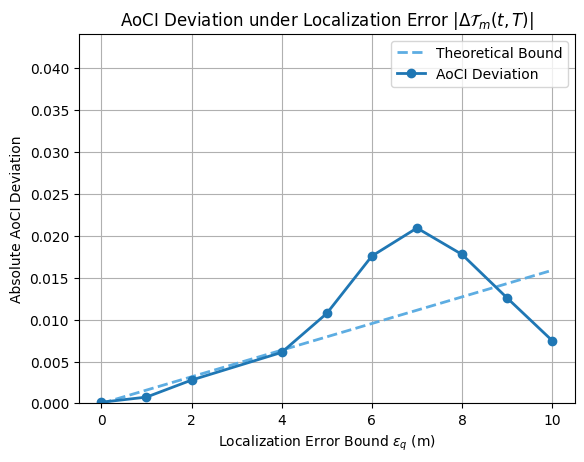

PSO drone  0
No of process= 3 No of Devices= 30 No of Drones= 1 Process Group= [[1, 2, 3]]
GA :: Average COAOI =  0.2643363064633673
Total number of Rows written    478
saved
PSO :: Average COAOI =  0.360308296395786
Total number of Rows written    240
saved
ACO :: Average COAOI =  0.36866471962451014
Total number of Rows written    479
saved


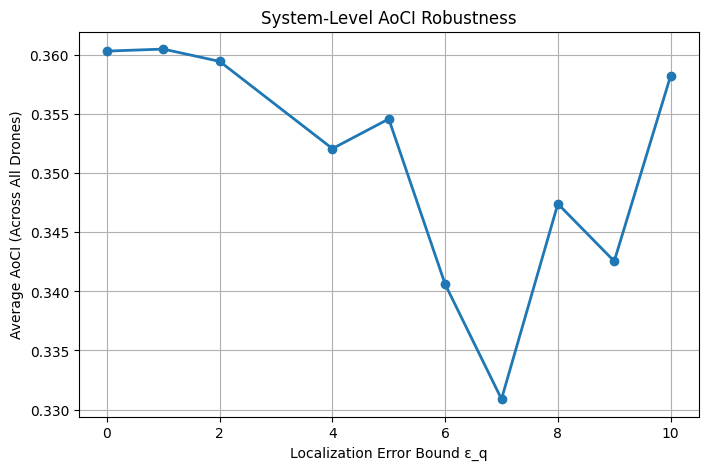

System Node= 30


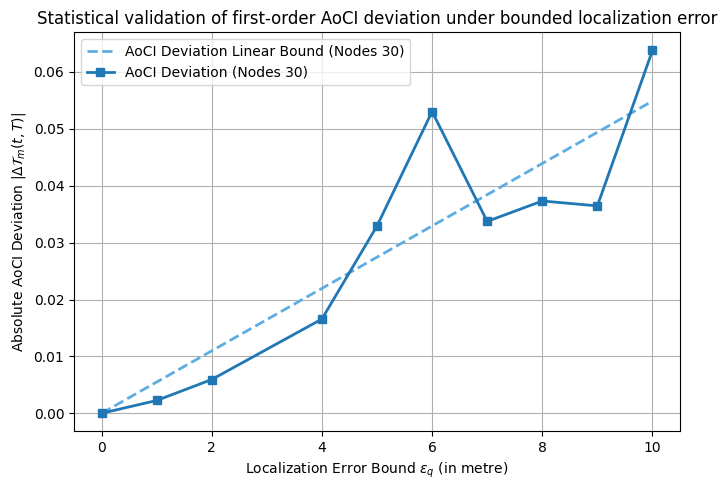

In [ ]:
                     ########### VERSION 6.5  New For Various Nodes Configuaration   ###################


import matplotlib.pyplot as plt
import random
import math
import numpy as np
from ypstruct import structure
import collections
import os
import numpy as np
import matplotlib.pyplot as plt

# from xlwt import Workbook # Not used
# from  xlrd import open_workbook # No longer used
import openpyxl
from openpyxl import Workbook # Explicitly import Workbook
from random import *
import random
import sys
from datetime import datetime


from scipy.ndimage import gaussian_filter1d

import random
import numpy as np

# random.seed(42)
# np.random.seed(42)



############# Helping Functions ####################################
def writeToExcelFile(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    excel_path = '/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx'

    if not os.path.exists(excel_path):
        # Ensure the directory exists before attempting to save the file
        os.makedirs(os.path.dirname(excel_path), exist_ok=True)
        book = Workbook()
        # Remove default sheet if it exists (usually 'Sheet' or 'Sheet1')
        if 'Sheet' in book.sheetnames:
            book.remove(book['Sheet'])
        elif 'Sheet1' in book.sheetnames:
            book.remove(book['Sheet1'])

        book.create_sheet('GA')
        book.create_sheet('PSO')
        book.save(excel_path)
        print(f"Created new Excel file with 'GA' and 'PSO' sheets at: {excel_path}")

    # Load the workbook (guaranteed to exist now)
    book_loaded = openpyxl.load_workbook(excel_path)
    sheet_ga = book_loaded['GA']

    # Determine the row count for appending data
    # max_row returns the highest row number containing data. +1 for the next empty row.
    rowCount_to_write = sheet_ga.max_row + 1

    print("Total number of Rows written   ",rowCount_to_write)
    writedata(book_loaded, rowCount_to_write, 1, costofprocess, totalcost, EtaS, EtaT, RohS, RohT, TotalDataCollected, convergega, avgtimeelapedga)

#Data to specified cells.
def writedata(book, rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    sheet = book['GA'] # Access 'GA' sheet from the passed workbook object

    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime

    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1


    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1

    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergega
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedga



    book.save('/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx')
    print('saved')

############################################################################################################

def writeToExcelFile2(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    excel_path = '/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx'

    if not os.path.exists(excel_path):
        # Ensure the directory exists before attempting to save the file
        os.makedirs(os.path.dirname(excel_path), exist_ok=True)
        book = Workbook()
        if 'Sheet' in book.sheetnames:
            book.remove(book['Sheet'])
        elif 'Sheet1' in book.sheetnames:
            book.remove(book['Sheet1'])

        book.create_sheet('GA')
        book.create_sheet('PSO')
        book.save(excel_path)
        print(f"Created new Excel file with 'GA' and 'PSO' sheets at: {excel_path}")

    book_loaded = openpyxl.load_workbook(excel_path)
    sheet_pso = book_loaded['PSO']

    rowCount_to_write = sheet_pso.max_row + 1

    print("Total number of Rows written   ",rowCount_to_write)
    writedata2(book_loaded, rowCount_to_write, 1, costofprocess, totalcost, EtaS, EtaT, RohS, RohT, TotalDataCollected, convergepso, avgtimeelapedpso)

#Data to specified cells.
def writedata2(book, rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    sheet = book['PSO'] # Access 'PSO' sheet from the passed workbook object

    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime

    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1


    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1

    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergepso
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedpso


    book.save('/content/drive/MyDrive/Age of Information/Runtimeinfo2.xlsx')
    print('saved')


def distribute(numbers, n):
    quotient, remainder = divmod(len(numbers), n)
    result = [numbers[i * quotient + min(i, remainder):(i + 1) * quotient + min(i + 1, remainder)] for i in range(n)]
    return result

def crossover(parent1, parent2, gamma=0.1):
    c1=parent1.deepcopy()
    c2=parent2.deepcopy()

    p1=c1.position.tolist()
    p2=c2.position.tolist()

    for i in range(1,random.randint(2,3)): #number of times you want to do crossover

        # select crossover point
        crossover_point = random.randint(1, len(parent1.position) - 1)

        # create offspring solution
        c1.position = np.array(p1[:crossover_point] + p2[crossover_point:])
        c2.position = np.array(p2[:crossover_point] + p1[crossover_point:])
        p1=c1.position.tolist()
        p2=c2.position.tolist()

    return c1, c2

def mutate2(x, mu):
    y=x.deepcopy()
    count=0
    for swaping_p in range(len(y.position)):
        if(random.random() < mu):
            swapedWith = np.random.randint(0,len(y.position))
            temp1=y.position[swaping_p]
            temp2=y.position[swapedWith]
            y.position[swapedWith]=temp1
            y.position[swaping_p]=temp2
            count=count+1

    return y


def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

def findmindistance(frame,v, allindex,distancematrix):
    L=len(allindex)
    devices=[]
    v1=int(frame[v].device[1:])-1

    for j in range(v-1, 0, -1) :
        v2=int(frame[j].device[1:])-1

        d=distancematrix[v1][v2]
#         print('v1=',v1,'v2=',v2,'dis ',d)
        devices.append(d)
    if len(devices)>0:
        m=min(devices)
    else:
        m=0
#     print('min=',m)
    return m


def distribute_random_numbers(n):
    # generate n random numbers
    nums = [random.random() for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums

def add_localization_noise(position, epsilon_q):
    noise = np.random.uniform(-epsilon_q, epsilon_q, size=position.shape)
    return position + noise

def calculate_noisy_distance(pos1, pos2, epsilon_q):
    noisy_pos1 = add_localization_noise(pos1, epsilon_q)
    noisy_pos2 = add_localization_noise(pos2, epsilon_q)
    return np.linalg.norm(noisy_pos2 - noisy_pos1)


def makedistancematrix(devloc):
    #devloc={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500),'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}
    #Structure of device location
    dismat=[]
    for i in range(1,no_devices+1):

        temp=[]
        device1="n"+str(i)
        node1=devloc[device1]

        for j in range(1,no_devices+1):

            if i !=j:
                device2="n"+str(j)
                node2=devloc[device2]
                distance=math.dist(node1,node2)

                #distance = calculate_noisy_distance(prev_position, next_position, epsilon_q)

            else:
                distance=0.0

            temp.append(distance)

        dismat.append(temp)


    return dismat

def count_consecutive_sequences(lst):
    count = 1
    num_sequences = 0
    current_elem = lst[0]

    for elem in lst[1:]:
        if elem == current_elem:
            count += 1
        else:
            current_elem = elem
            if count > 1:
                num_sequences += 1
            count = 1

    if count > 1:
        num_sequences += 1

    return num_sequences


def findtimedifference(v,frame,allindex):
    currentdevice=frame[v].device
    td=1
    if v-1 <0:
        return td
    for k in range(v-1, 0, -1) :
        loc=allindex[k]
        if frame[loc].device == currentdevice:
            td=frame[v].timestamp - frame[loc].timestamp
            break

    return td


def confirmnorepeat(L, avllist):
    #print("LLLLLL",L)

    for ind in range(len(L)-1):
        f=L[ind]
        s=L[ind+1]

        if f==s:
            while True:
                ch=random.choice(avllist)
                if ch!=f:
                    break


            L[ind+1]=ch

    return (L)


def CalculateMLambda(n):
    # generate n random numbers
    #nums = [random.random() for i in range(n)]
    nums = [random.uniform(0.28, 0.40) for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums


def generateDeviceLocation(no_devices):
    devlocation={}
    point_history=[]
    for i in range(1,no_devices+1):
        node=str("n"+str(i))
        #print(node)
        while True:
            pntX=randint(1, 1000)
            pntY=randint(1, 1000)
            if (pntX,pntY) not in point_history:
                point_history.append((pntX,pntY))
                devlocation[node]=(pntX,pntY)
                break
    return devlocation

def doDeviceProcessMapping(no_process,no_devices):
    numbers = [i for i in range(1,no_devices+1)]
    #random.shuffle(numbers)
    all_dist_p = distribute(numbers, no_process)
    i=1
    pdmap2={}
    for fr in all_dist_p:
        pr=str("p"+str(i))
        i=i+1
        for nd in fr:
            node=str("n"+str(nd))
            pdmap2[node]=pr

    return pdmap2



def findTotalDataGathered(frame,PlayTime):
    count=0
    for i in range(0,len(frame)):
        if frame[i].timestamp <= PlayTime:
            count=count+1

    return count

def findPositionLocation(position,devicelocation):

    PL=[]
    for p in position:
        val=devicelocation[p]
        PL.append(float(val[0]))
        PL.append(float(val[1]))
    return PL


def findNearestDevice(positionlocation, devicelocation,sets,hm_samevalue):
    dic={}
    pos=[]
    k=0

    l=len(positionlocation)
#     print(l)
    for i in range(0,l-1,2):
        x=positionlocation[i]
        y=positionlocation[i+1]
#         print(x,y)
        for nd in sets:
            dist = math.dist((x, y), devicelocation[nd])
            dic[nd]=dist
#             print(dist)

#         print(dic)
        sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
        first_key, first_value = next(iter(sorted_dic.items()))
        iterator = iter(sorted_dic.items())

        # Skip the first element
        next(iterator)

        # Retrieve the second element
        second_key, second_value = next(iterator)
#         print(sorted_dic)
#         print(first_key, first_value)
#         print(second_key, second_value)

        if k==0:
            pos.append(first_key)
        else:
            lpos=len(pos)
            if pos[lpos-1]==first_key:
                if hm_samevalue>=5:
                    third_key, third_value = next(iterator)
                    fourth_key, fourth_value = next(iterator)
                    randomly_selected_key=random.choice([first_key,second_key,third_key,fourth_key])
                    pos.append(randomly_selected_key)
                else:
                    pos.append(second_key)
            else:
                pos.append(first_key)
        k=k+1
#     print(pos)
    return pos


# Start measuring time elapsed
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

# End mesuring time elapsed
def toc():
    import time, math
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.
#         print('Elapsed time is {} second(s).'.format(dt))
        return dt
    else:
        print('Start time not set. You should call tic before toc.')


def count_same_values_from_right(lst):
    count = 0
    last_element = lst[-1]

    # Iterate through the list from right to left
    for i in range(len(lst) - 1, -1, -1):
        if lst[i] == last_element:
            count += 1
        else:
            break

    return count



#############################################################################
#             PSO Algorithm starts
###############################################################################

def PSOrun(problem, params,d,initialpop,ga_aoi):
    import time
    extra_time=0
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar               #particle's size
    nVar=nvar
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances
    devicelocation=problem.devicelocation

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 nodes is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.MaxIter
    npop = params.PopSize
    c1 = params.c1
    c2 = params.c2
    w = params.w
    wdamp = params.wdamp


    # Empty Individual Particle Template

    empty_individual = structure()
    empty_individual.position = None
    empty_individual.positionlocation = None
    empty_individual.velocity = None
    empty_individual.cost = None
    empty_individual.dataCollected=None
    empty_individual.best_position=None
    empty_individual.best_positionlocation=None
    empty_individual.best_cost=None

#     Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Best Solution Ever Found
    gbest = empty_individual.deepcopy()
    gbest.position = None
    gbest.positionlocation = None
    gbest.cost = np.inf

    # Create Initial Population
    pop = empty_individual.repeat(npop)
    hm_samevalue=0
    for i in range(npop):
#         pos=[]
#         for k in range(1,nvar+1):
#             pos.append(random.choice(allsets[d]))

#         pos=confirmnorepeat(pos,allsets[d])
#         pop[i].position = np.array(pos)
        pop[i].position=initialpop[i].position

        posloc=findPositionLocation(pop[i].position,devicelocation)

        pop[i].positionlocation=np.array(posloc)

        pop[i].velocity = np.zeros(nvar*2)

        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored


        pop[i].best_position = pop[i].position.copy()
        pop[i].best_positionlocation = pop[i].positionlocation.copy()
        pop[i].best_cost = pop[i].cost

        if pop[i].best_cost < gbest.cost:
            gbest.position = pop[i].best_position.copy()
            gbest.positionlocation = pop[i].best_positionlocation.copy()
            gbest.cost = pop[i].best_cost


    # To store Best Cost of all Iterations
    bestcost = np.empty(maxit*3)

    prev_gbest_cost    =gbest.cost

    # PSO Loop
    for it in range(0, maxit*3):
        for i in range(0, npop):

#             pop[i].velocity = w*pop[i].velocity \
#                 + c1*np.random.rand(nVar)*(pop[i].best_position - pop[i].position) \
#                 + c2*np.random.rand(nVar)*(gbest.position - pop[i].position)

            pop[i].velocity = w*pop[i].velocity \
                + c1*np.random.rand(nVar*2)*(pop[i].best_positionlocation - pop[i].positionlocation) \
                + c2*np.random.rand(nVar*2)*(gbest.positionlocation - pop[i].positionlocation)




            pop[i].positionlocation += pop[i].velocity
#             pop[i].positionlocation = np.maximum(pop[i].positionlocation, varmin)
#             pop[i].positionlocation = np.minimum(pop[i].positionlocation, varmax)


            start_time1 = time.time()
            pos=findNearestDevice(pop[i].positionlocation, devicelocation,allsets[d],hm_samevalue)
            pop[i].position=np.array(pos)

            #Added these lines to test { Starts
            posloc=findPositionLocation(pop[i].position,devicelocation)
            pop[i].positionlocation=np.array(posloc)
            #Added these lines to test } Ends
            end_time1 = time.time()
            time_difference1 = end_time1 - start_time1
            extra_time=extra_time+time_difference1



            RV = costfunc(pop[i].position)
            pop[i].cost = RV.costvalue
            pop[i].dataCollected=nvar-RV.dataignored



            if pop[i].cost < pop[i].best_cost:
                pop[i].best_position = pop[i].position.copy()
                pop[i].best_positionlocation = pop[i].best_positionlocation.copy()
                pop[i].best_cost = pop[i].cost

                if pop[i].best_cost < gbest.cost:
                    gbest.position = pop[i].best_position.copy()
                    gbest.positionlocation = pop[i].best_positionlocation.copy()
                    gbest.cost = pop[i].best_cost

        w *= wdamp
#         print('PSO :: Iteration {}: Best Cost = {}'.format(it, gbest.cost))
        # Store Best Cost
        bestcost[it] = gbest.cost
        if gbest.cost <= ga_aoi:
            break
        if prev_gbest_cost == gbest.cost:
            hm_samevalue=hm_samevalue+1
        else:
            prev_gbest_cost = gbest.cost
            hm_samevalue=0

    # Output
#     out = structure()
#     out.pop = pop
#     out.bestsol = bestsol
#     out.bestcost = bestcost


    out = structure()
    out.pop = pop
    out.bestsol = gbest
    out.bestcost = bestcost
    out.extra_time=extra_time
    #print(out.bestsol)
    return out


###############################################################################
#             GA Algorithm
###############################################################################

def run(problem, params,d):

    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar          #chromosome size
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 drone is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    empty_individual.dataCollected=None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    initialpop=empty_individual.repeat(npop)

    for i in range(npop):

        pos=[]
        for k in range(1,nvar+1):
            pos.append(random.choice(allsets[d]))

        pos=confirmnorepeat(pos,allsets[d])

        pop[i].position = np.array(pos)
        initialpop[i].position=np.array(pos)
        #pop[i].cost = costfunc(pop[i].position)
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored

        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)

    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
#         if avg_cost != 0:
#             costs = costs/avg_cost

        costs = costs/(avg_cost+1)
        probs = np.exp(-beta*costs)

        popc = []                            # child population
        for _ in range(nc//2):


#             # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]

            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
#             c1 = mutate(c1, mu, sigma)
#             c2 = mutate(c2, mu, sigma)
            # Perform Mutation
            c1 = mutate2(c1, mu)
            c2 = mutate2(c2, mu)
            c1.position=confirmnorepeat(c1.position,allsets[d])
            c2.position=confirmnorepeat(c2.position,allsets[d])


            # Evaluate First Offspring
            #c1.cost = costfunc(c1.position)
            RV = costfunc(c1.position)
            c1.cost = RV.costvalue
            c1.dataCollected=nvar-RV.dataignored

            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            #c2.cost = costfunc(c2.position)

            RV = costfunc(c2.position)
            c2.cost = RV.costvalue
            c2.dataCollected=nvar-RV.dataignored

            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)


        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
#         print("GA :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    out.initialpop=initialpop
    return out


########################### ACO version 2 ##########################

def ACOrun_problem(problem, paramsaco, d, initialpop=None):
    import numpy as np
    from ypstruct import structure

    # Problem and parameter unpacking
    costfunc = problem.costfunc
    nvar = problem.nvar              # Number of route/time slots/device visits
    allsets = problem.allsets
    devices = allsets[d]             # Allowed device labels for this drone (e.g., ['n1', 'n2', ...])
    nants = paramsaco.nants
    maxit = paramsaco.maxit
    alpha = paramsaco.alpha
    beta = paramsaco.beta
    rho = paramsaco.rho
    Q = paramsaco.Q

    n_devices = len(devices)
    pheromone = np.ones((n_devices, n_devices))
    eta = np.ones((n_devices, n_devices))
    for i in range(n_devices):
        for j in range(n_devices):
            idx_i = int(devices[i][1:]) - 1
            idx_j = int(devices[j][1:]) - 1
            dist = problem.distancematrix[idx_i][idx_j]
            eta[i][j] = 1.0 / (dist + 1e-6) if dist > 0 else 1e-6

    empty_ant = structure()
    empty_ant.position = None
    empty_ant.positionlocation = None
    empty_ant.cost = None
    empty_ant.dataCollected = None
    bestsol = empty_ant.deepcopy()
    bestsol.cost = np.inf
    bestcost = np.empty(maxit)
    ants = empty_ant.repeat(nants)

    for it in range(maxit):
        for k in range(nants):
            pos = []
            posloc = []
            available = set(devices)
            prev_idx = np.random.choice(n_devices)
            for gene in range(nvar):
                if not available:
                    break
                probs = []
                cand_idx_list = []
                for cand in available:
                    idx_next = devices.index(cand)
                    p = (pheromone[prev_idx][idx_next] ** alpha) * (eta[prev_idx][idx_next] ** beta)
                    probs.append(p)
                    cand_idx_list.append(idx_next)
                probs = np.array(probs)
                if probs.sum() == 0:
                    idx_chosen = np.random.choice(cand_idx_list)
                else:
                    idx_chosen = np.random.choice(cand_idx_list, p=probs/probs.sum())
                chosen_label = devices[idx_chosen]
                pos.append(chosen_label)
                val = problem.devicelocation[chosen_label]
                posloc.append(float(val[0]))
                posloc.append(float(val[1]))
                prev_idx = idx_chosen
                available -= {chosen_label}
            pos = list(dict.fromkeys(pos))
            ants[k].position = np.array(pos)
            ants[k].positionlocation = np.array(posloc)
            RV = costfunc(ants[k].position)
            ants[k].cost = RV.costvalue
            ants[k].dataCollected = len(set(pos))
            if ants[k].cost < bestsol.cost:
                bestsol = ants[k].deepcopy()
        pheromone *= (1 - rho)
        for ant in ants:
            for i in range(len(ant.position) - 1):
                idx_a = devices.index(ant.position[i])
                idx_b = devices.index(ant.position[i+1])
                pheromone[idx_a][idx_b] += Q / (ant.cost + 1e-12)
        bestcost[it] = bestsol.cost

    out = structure()
    out.pop = ants
    out.bestsol = bestsol
    out.bestcost = bestcost
    return out


# BOUNDED LOCALIZATION ERROR


def create_noisy_distance_matrix(base_matrix, epsilon_q):
    """
    Generates perturbed distance matrix using bounded localization error.
    Implements |d_hat - d| <= epsilon_q
    """
    if epsilon_q == 0:
        return base_matrix

    noisy_matrix = base_matrix.copy()

    size = len(base_matrix)

    for i in range(size):
        for j in range(size):
            if i != j:
                noise = np.random.uniform(-epsilon_q, epsilon_q)
                # noise = np.random.normal(0, epsilon_q/3)
                # noise = np.clip(noise, -epsilon_q, epsilon_q)


                noisy_matrix[i][j] = max(
                    0,
                    base_matrix[i][j] + noise
                )

    return noisy_matrix


######################### AoICostFunctionWithNoise ###################################

def AoICostFunctionWithNoise(x, distmatrix):
    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x))

    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1

        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        d=distmatrix[v1][v2]
        hoverdistance.append(d)


    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        key=f.device
        f.process=deviceprocessmap[key]
        no_of_unique_process.add(f.process)
        f.hovertime= hoverdistance[index] / dronespeed
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        index=index+1


    T=PlayTime

    allsum=0
    dataignored=0
    for k in range(1,no_process+1):

        process="p"+str(k)

        allindex=[]
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        if len(allindex)==0:
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :

            j=allindex[v]
            j2=allindex[v-1]

            if v==index-1:
                alpha=1
            else:
                v1=frame[j].device
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1

                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                djdot=distmatrix[v1][v2]


                tjdot=frame[j].timestamp-frame[j2].timestamp

                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT

                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp

            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
            if frame[j].timestamp > PlayTime:
                c1=0
            sum=sum+c1
        c2=T/2-sum/T
        c3=mlambda[k-1] * c2
        allsum=allsum+c3

    costvalue=allsum/(.5*T)

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1

    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue

    return returnValues



##############################################################


gcount=1

##################################################################
# Cost Function Equation 13 and 14
###############################################################


def AoICostFunction(x):

    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x))

    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1

        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        d=distancematrix[v1][v2]
        hoverdistance.append(d)


    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        key=f.device
        f.process=deviceprocessmap[key]
        no_of_unique_process.add(f.process)
        f.hovertime= hoverdistance[index] / dronespeed
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        index=index+1


    T=PlayTime

    allsum=0
    dataignored=0
    for k in range(1,no_process+1):

        process="p"+str(k)

        allindex=[]
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        if len(allindex)==0:
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :

            j=allindex[v]
            j2=allindex[v-1]

            if v==index-1:
                alpha=1
            else:
                v1=frame[j].device
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1

                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                djdot=distancematrix[v1][v2]

                tjdot=frame[j].timestamp-frame[j2].timestamp

                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT

                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp

            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
            if frame[j].timestamp > PlayTime:
                c1=0
            sum=sum+c1
        c2=T/2-sum/T
        c3=mlambda[k-1] * c2
        allsum=allsum+c3

    costvalue=allsum/(.5*T)

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1

    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue

    return returnValues



########### INITIALIZE ##########

extra_time=0
dronespeed=12

plocations = {'p1':(100,400),'p2':(200,630),'p3':(450,650)}


no_drones=1
no_process=3
no_devices=30

system_node=[30,60,90,120]   # [30,60,90]
allprocess_theoretical_bound=[]
allprocess_abs_dev=[]
allprocess_distancematrix=[]
allprocess_best_position=[]

for i,skdnode in enumerate(system_node):
    no_devices=skdnode

    EtaS=1
    EtaT=0
    RohS=1000
    RohT=1000

    mlambda=[1,1,1]

    PlayTime=600

    problem = structure()
    problem.costfunc = AoICostFunction
    problem.T=40*(no_drones+1)+40
    problem.no_process=no_process
    problem.no_devices=no_devices
    problem.nvar = problem.T

    problem.devicelocation=generateDeviceLocation(no_devices)
    problem.distancematrix=makedistancematrix(problem.devicelocation)
    distancematrix=problem.distancematrix
    problem.pdmap=doDeviceProcessMapping(no_process,no_devices)
    deviceprocessmap=problem.pdmap

    ############################## ACO ################################

    paramsaco = structure()
    paramsaco.nants = 15
    paramsaco.maxit = 20
    paramsaco.alpha = 1.5
    paramsaco.beta = 2.0
    paramsaco.rho = 0.2
    paramsaco.Q = 2.0


    ############################# GA #########################################

    params = structure()
    params.maxit = 20
    params.npop = 15

    params.beta = 1
    params.pc = 1
    params.gamma = 0.1
    params.mu = 0.1
    params.sigma = 0.1

    ################################## PSO  ###############################################

    params2 = structure()
    params2.MaxIter = 20
    params2.PopSize = 15
    params2.c1 = 1.5
    params2.c2 = 2
    params2.w = .75
    params2.wdamp = 0.995

    ######################################################################################

    numbers = [i for i in range(1,no_process+1)]
    all_dist_process = distribute(numbers, no_drones)
    print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
    print()
    allsets=[]
    for adp in all_dist_process:
        d=[]
        for p in adp:
            pr="p"+str(p)
            d2=[k for k,v in problem.pdmap.items() if v== pr]
            d=d+d2

        allsets.append(d)

    problem.allsets=allsets

    ######################################################################################


    khelasum=0
    khelasum2=0
    khelasum3=0
    mlambda=[]

    for i in range(0,len(all_dist_process)):

        mprocess=len(all_dist_process[i])
        l2=CalculateMLambda(mprocess)
        for j in range(0,len(l2)):
            mlambda.append(l2[j])


    print(mlambda)

    costofprocess=[]
    costofprocess2=[]
    costofprocess3=[]
    TotalDataCollected=0
    TotalDataCollected2=0
    TotalDataCollected3=0

    convergega=0
    convergepso=0
    convergeaco=0

    avgtimeelapedga=0
    avgtimeelapedpso=0
    avgtimeelapedaco=0


    all_drone_results = []

    base_folder = "/content/drive/MyDrive/Age of Information/Plots/"
    os.makedirs(base_folder, exist_ok=True)

    for i in range(0,no_drones):

          # Create experiment tag
        experiment_tag = ( f"D{no_drones}_P{no_process}_N{no_devices}" )

        experiment_folder = os.path.join(
            base_folder,
            f"Exp_D{no_drones}_P{no_process}_N{no_devices}"
        )

        os.makedirs(experiment_folder, exist_ok=True)


        ############# added for ACO  ##################

        tic()
        params_aco=paramsaco
        out_aco = ACOrun_problem(problem, params_aco, i)
        ttt = toc()
        avgtimeelapedaco=avgtimeelapedaco+ttt
        #     print('ACO Drone ', i, ' Collected data= ', out_aco.pop[0].dataCollected)
        #     plt.plot(out_aco.bestcost)

        khelasum3=khelasum3+min(out_aco.bestcost)
        costofprocess3.append(min(out_aco.bestcost))
        #     print("khelasum= ",khelasum3)

        ####To count how fast it is converged, I am trying count number of times same best values
        # are recorded. Then from total iteration I will deduct the count value an i will get the
        # needed iteration number to converge

        ccc=count_same_values_from_right(out_aco.bestcost)
        convergeaco=convergeaco+(params_aco.maxit-ccc)

        # Results
        #print('variables value',out.pop[0]['position'])
    #     print('Number of consecutive same sequence = ',count_consecutive_sequences(out_aco.pop[0]['position']))
        dataCollected=out_aco.pop[0]['dataCollected']
        TotalDataCollected3=TotalDataCollected3+dataCollected
    #     print('ACO Drone ',i,' Collected data= ',dataCollected)
    #     plt.plot(out_aco.bestcost)

        print("ACO  drone ",i)


        #############################################

        # Run GA
        #startTime_for_tictoc = time.time()
        tic()
        out = run(problem, params,i)
        #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
        ttt=toc()
        avgtimeelapedga=avgtimeelapedga+ttt
    #     khelasum=khelasum+out.bestcost[0]
    #     costofprocess.append(out.bestcost[0])
        khelasum=khelasum+min(out.bestcost)
        costofprocess.append(min(out.bestcost))
    #     print("khelasum= ",khelasum)

        ####To count how fast it is converged, I am trying count number of times same best values
        # are recorded. Then from total iteration I will deduct the count value an i will get the
        # needed iteration number to converge

        ccc=count_same_values_from_right(out.bestcost)
        convergega=convergega+(params.maxit-ccc)

        ##Converge count end

        # Results
        #print('variables value',out.pop[0]['position'])
    #     print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
        dataCollected=out.pop[0]['dataCollected']
        TotalDataCollected=TotalDataCollected+dataCollected
    #     print('GA Drone ',i,' Collected data= ',dataCollected)
    #     plt.plot(out.bestcost)
        print("GA  drone ",i)

        # Run PSO
        initialpop=out.initialpop
        #startTime_for_tictoc = time.time()
        tic()
        ga_aoi=min(out.bestcost)

        out = PSOrun(problem, params2,i,initialpop,ga_aoi)
        #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
        ttt=toc()
        avgtimeelapedpso=avgtimeelapedpso+ttt
        extra_time=extra_time+out.extra_time
    #     khelasum=khelasum+out.bestcost[0]
    #     costofprocess.append(out.bestcost[0])
        khelasum2=khelasum2+min(out.bestcost)
        costofprocess2.append(min(out.bestcost))
    #     print("khelasum= ",khelasum2)

        ####To count how fast it is converged, I am trying count number of times same best values
        # are recorded. Then from total iteration I will deduct the count value an i will get the
        # needed iteration number to converge

        ccc=count_same_values_from_right(out.bestcost)
        convergepso=convergepso+(params2.MaxIter-ccc)

        ############################### Localization Error ######################
        best_position = out.bestsol.position
        baseline = AoICostFunctionWithNoise( best_position,  distancematrix )
        print("Baseline AoCI Cost:", baseline.costvalue)

        epsilon_values = [0, 1, 2, 4,5,6,7,8,9, 10]
        MonteCarlo_runs = 100

        robust_results = []
        mean_vals = []
        std_vals = []

        for eps in epsilon_values:

            samples = []

            for _ in range(MonteCarlo_runs):
                noisy_matrix = create_noisy_distance_matrix(distancematrix, eps )
                val = AoICostFunctionWithNoise(best_position,noisy_matrix )
                samples.append(val.costvalue)

            robust_results.append(np.mean(samples))
            mean_vals.append(np.mean(samples))
            std_vals.append(np.std(samples))


        print("\nRobustness Results:")
        for eps, val in zip(epsilon_values, robust_results):
            print(f"epsilon_q = {eps} → Avg Cost = {val:.6f}")

        baseline_value = robust_results[0]

        relative_change = [(val - baseline_value) / baseline_value    for val in robust_results ]


        N = MonteCarlo_runs
        ci_vals = [  1.96 * (std_vals[i] / np.sqrt(N))   for i in range(len(std_vals)) ]

        all_drone_results.append(mean_vals)

        baseline_value = robust_results[0]
        # Absolute deviation from baseline (theoretical validation plot)
        abs_dev = [abs(val - baseline_value) for val in mean_vals]

        coeff = np.polyfit(epsilon_values, abs_dev, 1)
        fit_line = np.poly1d(coeff)

        percent_dev = [100 * abs(val - baseline_value) / baseline_value
                  for val in mean_vals]

        C = np.polyfit(epsilon_values, abs_dev, 1)[0]
        # C = np.sum(epsilon_values * abs_dev) / np.sum(epsilon_values**2)


        theoretical_bound = [C * eps for eps in epsilon_values]


        allprocess_theoretical_bound.append(theoretical_bound)
        allprocess_abs_dev.append(abs_dev)
        allprocess_distancematrix.append(distancematrix)
        allprocess_best_position.append(best_position)





        smooth_dev = gaussian_filter1d(abs_dev, sigma=1)

        # Theoretical bound - > light blue dotted line
        plt.plot(epsilon_values,theoretical_bound,linestyle='--', linewidth=2, label='Theoretical Bound',color='#5DADE2')      # light blue

        # Simulation AoCI Deviation - > solid blue line
        plt.plot(epsilon_values,smooth_dev, marker='o',linestyle='-', color='#1f77b4',linewidth=2,label='AoCI Deviation ')

        plt.xlabel("Localization Error Bound $\\varepsilon_q$ (m)")
        plt.ylabel("Absolute AoCI Deviation")
        plt.ylim(0, max(abs_dev)*1.5)



        plt.title(r"AoCI Deviation under Localization Error $|\Delta \mathcal{T}_m(t,T)|$")

        plt.legend()
        plt.grid(True)
        plt.show()

        ################################ Localization Error ####################

        ##Converge count end


        # Results
        #print('variables value',out.pop[0]['position'])
    #     print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
        dataCollected=out.pop[0]['dataCollected']
        TotalDataCollected2=TotalDataCollected2+dataCollected
    #     print('PSO Drone ',i,' Collected data= ',dataCollected)
    #     plt.plot(out.bestcost)
        print("PSO drone ",i)

    #     plt.xlim(0, params_aco.maxit)
    #     plt.xlabel('Iterations')
    #     plt.ylabel('Best Cost')
    #     plt.title('GA & PSO & ACO')
    #     plt.grid(True)
    #     plt.show()

        #############################################


    print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
    avgAoI=khelasum/len(all_dist_process)
    avgAoI2=khelasum2/len(all_dist_process)
    avgAoI3=khelasum3/len(all_dist_process)

    print("GA :: Average COAOI = ", avgAoI)
    # print("GA :: Number of times Data Collected = ",TotalDataCollected)
    # print("GA :: Total Data Collected = ",TotalDataCollected*2560/1024*2," KByte")
    # print("GA :: Convergence Iteration number ",convergega)
    # print("GA :: Elaped Time ",avgtimeelapedga)
    writeToExcelFile(costofprocess,avgAoI,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)


    print("PSO :: Average COAOI = ", avgAoI2)
    # print("PSO :: Number of times Data Collected = ",TotalDataCollected2)
    # print("PSO :: Total Data Collected = ",TotalDataCollected2*2560/1024*2," KByte")
    # print("PSO :: Convergence Iteration number ",convergepso)
    # print("PSO :: Elaped Time ",avgtimeelapedpso,"-",extra_time,"= ",avgtimeelapedpso-extra_time)
    writeToExcelFile2(costofprocess2,avgAoI2,EtaS,EtaT,RohS,RohT,TotalDataCollected2,convergepso,avgtimeelapedpso-extra_time)

    print("ACO :: Average COAOI = ", avgAoI3)
    # print("ACO :: Number of times Data Collected = ",TotalDataCollected3)
    # print("ACO :: Total Data Collected = ",TotalDataCollected3*2560/1024*2," KByte")
    # print("ACO :: Convergence Iteration number ",convergeaco)
    # print("ACO :: Elaped Time ",avgtimeelapedaco)
    writeToExcelFile(costofprocess3,avgAoI3,EtaS,EtaT,RohS,RohT,TotalDataCollected3,convergeaco,avgtimeelapedaco)

    aggregate = np.mean(np.array(all_drone_results), axis=0)

    plt.figure(figsize=(8,5))
    plt.plot(epsilon_values, aggregate, marker='o', linewidth=2)
    plt.xlabel("Localization Error Bound ε_q")
    plt.ylabel("Average AoCI (Across All Drones)")
    plt.title("System-Level AoCI Robustness")
    plt.grid(True)
    plt.show()

dcolors = ['#1f77b4', '#66CDAA']
lcolors = [ '#5DADE2', '#2E8B57']
plt.figure(figsize=(7,5))

for nos in range(0,len(system_node)):
    print("System Node=",system_node[nos])
    epsilon_values = np.array([0,1,2,4,5,6,7,8,9,10])

    MonteCarlo_runs = 300
    experiment_seeds = [10, 20, 30, 40, 50]   # multi-seed validation
    # experiment_seeds = [10]   # multi-seed validation
    distancematrix = allprocess_distancematrix[nos]
    best_position = allprocess_best_position[nos]

    all_abs_dev = []

    for seed in experiment_seeds:

        random.seed(seed)
        np.random.seed(seed)

        mean_vals = []

        for eps in epsilon_values:

            samples = []

            for _ in range(MonteCarlo_runs):
                noisy_matrix = create_noisy_distance_matrix(distancematrix, eps)
                val = AoICostFunctionWithNoise(best_position, noisy_matrix)
                samples.append(val.costvalue)

            mean_vals.append(np.mean(samples))

        baseline_value = mean_vals[0]
        abs_dev = np.abs(np.array(mean_vals) - baseline_value)
        all_abs_dev.append(abs_dev)

    # Convert to array
    all_abs_dev = np.array(all_abs_dev)

    # Statistical aggregation
    mean_abs_dev = np.mean(all_abs_dev, axis=0)
    std_abs_dev  = np.std(all_abs_dev, axis=0)

    # First-order sensitivity constant (regression through origin)
    C = np.sum(epsilon_values * mean_abs_dev) / np.sum(epsilon_values**2)

    theoretical_bound = C * epsilon_values

    # 95% confidence interval
    ci = 1.96 * std_abs_dev / np.sqrt(len(experiment_seeds))

    # plt.figure(figsize=(7,5))

    plt.plot(epsilon_values,
            theoretical_bound,
            '--',
            linewidth=2,
            color=lcolors[nos % len(lcolors)],
            label=f'AoCI Deviation Linear Bound (Nodes {system_node[nos]})')

    plt.errorbar(epsilon_values,
                mean_abs_dev,
                #  yerr=ci,
                marker='s',
                linewidth=2,
                color=dcolors[nos % len(dcolors)],
                capsize=4,
                #  label='AoCI Deviation with ± 95% CI Statistical Robustness (Nodes {system_node[nos]})')
                label=f'AoCI Deviation (Nodes {system_node[nos]})')





    plt.xlabel(r"Localization Error Bound $\varepsilon_q$ (in metre)")
    plt.ylabel(r"Absolute AoCI Deviation $|\Delta \mathcal{T}_m(t,T)|$")
    plt.title("Statistical validation of first-order AoCI deviation under bounded localization error")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# plt.show()








In [ ]:
dcolors = ['#1f77b4', '#66CDAA']
lcolors = [ '#5DADE2', '#2E8B57']
plt.figure(figsize=(7,5))

for nos in range(0,len(system_node)):
    print("System Node=",system_node[nos])
    epsilon_values = np.array([0,1,2,4,5,6,7,8,9,10])

    MonteCarlo_runs = 300
    # experiment_seeds = [10, 20, 30, 40, 50]   # multi-seed validation
    experiment_seeds = [10]   # multi-seed validation
    distancematrix = allprocess_distancematrix[nos]
    best_position = allprocess_best_position[nos]

    all_abs_dev = []

    for seed in experiment_seeds:

        random.seed(seed)
        np.random.seed(seed)

        mean_vals = []

        for eps in epsilon_values:

            samples = []

            for _ in range(MonteCarlo_runs):
                noisy_matrix = create_noisy_distance_matrix(distancematrix, eps)
                val = AoICostFunctionWithNoise(best_position, noisy_matrix)
                samples.append(val.costvalue)

            mean_vals.append(np.mean(samples))

        baseline_value = mean_vals[0]
        abs_dev = np.abs(np.array(mean_vals) - baseline_value)
        all_abs_dev.append(abs_dev)

    # Convert to array
    all_abs_dev = np.array(all_abs_dev)

    # Statistical aggregation
    mean_abs_dev = np.mean(all_abs_dev, axis=0)
    std_abs_dev  = np.std(all_abs_dev, axis=0)

    # First-order sensitivity constant (regression through origin)
    C = np.sum(epsilon_values * mean_abs_dev) / np.sum(epsilon_values**2)

    theoretical_bound = C * epsilon_values

    # 95% confidence interval
    ci = 1.96 * std_abs_dev / np.sqrt(len(experiment_seeds))



    plt.plot(epsilon_values,
            theoretical_bound,
            '--',
            linewidth=2,
            color=lcolors[nos % len(lcolors)],
            label='AoCI Deviation Linear Bound (Nodes 30)')

    plt.errorbar(epsilon_values,
                mean_abs_dev,
                #  yerr=ci,
                marker='s',
                linewidth=2,
                color=dcolors[nos % len(dcolors)],
                capsize=4,
                #  label='AoCI Deviation with ± 95% CI Statistical Robustness (Nodes {system_node[nos]})')
                label=f'AoCI Deviation (Nodes {system_node[nos]})')



    # plt.plot(epsilon_values,
    #         theoretical_bound,
    #         '--',
    #         linewidth=2,
    #         color='#2E8B57',
    #         label='AoCI Deviation Linear Bound (Nodes 60)')

    # plt.errorbar(epsilon_values,
    #             mean_abs_dev,
    #             #  yerr=ci2,
    #             marker='o',
    #             linewidth=2,
    #             color='#66CDAA',
    #             capsize=4,
    #             #  label='AoCI Deviation with ± 95% CI Statistical Robustness (Nodes 60)')
    #               label='AoCI Deviation (Nodes 30)')

plt.xlabel(r"Localization Error Bound $\varepsilon_q$ (in metre)")
plt.ylabel(r"Absolute AoCI Deviation $|\Delta \mathcal{T}_m(t,T)|$")
plt.title("Statistical validation of first-order AoCI deviation under bounded localization error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

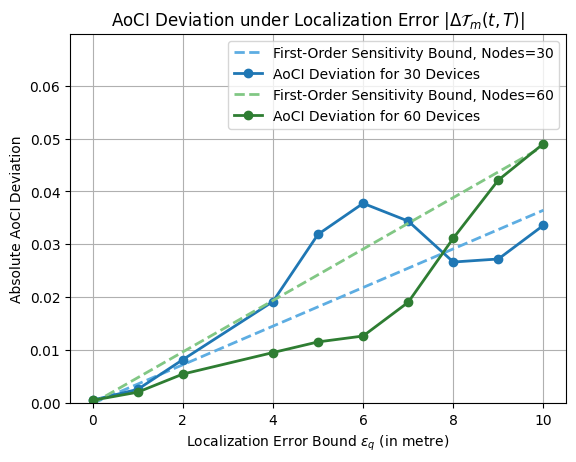

In [ ]:
################# 1st Plot  30 nodes, error(Epcelon)=3

abs_dev1=[np.float64(0.0), np.float64(0.0006579970273388885), np.float64(0.006095745766181937), np.float64(0.013265621869709351), np.float64(0.0422515709673449), np.float64(0.036948983190027054), np.float64(0.046506025864076025), np.float64(0.012819381746622137), np.float64(0.023982364439340223), np.float64(0.039881198120827785)]
epsilon_values=[0, 1, 2, 4,5,6,7,8,9, 10]
theoretical_bound1=[np.float64(0.0), np.float64(0.003646666699276902), np.float64(0.007293333398553804), np.float64(0.014586666797107607), np.float64(0.018233333496384507), np.float64(0.02188000019566141), np.float64(0.025526666894938314), np.float64(0.029173333594215214), np.float64(0.032820000293492115), np.float64(0.036466666992769015)]


smooth_dev1 = gaussian_filter1d(abs_dev1, sigma=1)

# Theoretical bound → light blue dotted line
plt.plot(epsilon_values,theoretical_bound1,linestyle='--', linewidth=2, label='First-Order Sensitivity Bound, Nodes=30',color='#5DADE2')      # light blue

# Simulation → solid blue line
plt.plot(epsilon_values,smooth_dev1, marker='o',linestyle='-', color='#1f77b4',linewidth=2,label='AoCI Deviation for 30 Devices')


################# 2nd Plot  60 nodes, error(Epcelon)=3

# abs_dev2=[np.float64(0.0), np.float64(0.0016114916225403453), np.float64(0.0022755788836038016), np.float64(0.00017368213112310682), np.float64(0.00012767720791501125), np.float64(0.006296807716895572), np.float64(0.006272027411927061), np.float64(0.0054642816262744365), np.float64(0.02644271442698999), np.float64(0.03551281215723208)]
abs_dev2=[np.float64(0.0), np.float64(0.0009374246726648744), np.float64(0.0043776560735483), np.float64(0.011432723079451923), np.float64(0.013924494779876576), np.float64(0.009290471797685898), np.float64(0.011719423958154979), np.float64(0.036786960890893644), np.float64(0.04112080315157143), np.float64(0.054056274242638924)]

epsilon_values=[0, 1, 2, 4,5,6,7,8,9, 10]
# theoretical_bound2=[np.float64(0.0), np.float64(0.0027299888826202378), np.float64(0.0054599777652404756), np.float64(0.010919955530480951), np.float64(0.01364994441310119), np.float64(0.016379933295721426), np.float64(0.019109922178341666), np.float64(0.021839911060961902), np.float64(0.02456989994358214), np.float64(0.02729988882620238)]
theoretical_bound2=[np.float64(0.0), np.float64(0.004856156720512343), np.float64(0.009712313441024686), np.float64(0.01942462688204937), np.float64(0.024280783602561716), np.float64(0.029136940323074057), np.float64(0.0339930970435864), np.float64(0.03884925376409874), np.float64(0.04370541048461109), np.float64(0.04856156720512343)]


smooth_dev2 = gaussian_filter1d(abs_dev2, sigma=1)

# Theoretical bound → light blue dotted line
plt.plot(epsilon_values,theoretical_bound2,linestyle='--', linewidth=2, label='First-Order Sensitivity Bound, Nodes=60',color='#81C784')      # light blue

# Simulation → solid blue line
plt.plot(epsilon_values,smooth_dev2, marker='o',linestyle='-', color='#2E7D32' ,linewidth=2,label='AoCI Deviation for 60 Devices')
# plt.plot(epsilon_values,abs_dev2, marker='o',linestyle='-', color='pink' ,linewidth=2,label='AoCI Deviation ')






plt.xlabel("Localization Error Bound $\\varepsilon_q$ (in metre)")
plt.ylabel("Absolute AoCI Deviation")
plt.ylim(0, max(abs_dev1)*1.5)

# y_min = min(abs_dev) * 0.3   # slightly below smallest value
# y_max = max(abs_dev) * 1.2   # little headroom on top
# plt.ylim(y_min, y_max)

plt.title(r"AoCI Deviation under Localization Error $|\Delta \mathcal{T}_m(t,T)|$")

plt.legend()
plt.grid(True)









plt.show()

In [ ]:
print(theoretical_bound)

[np.float64(0.0), np.float64(0.004856156720512343), np.float64(0.009712313441024686), np.float64(0.01942462688204937), np.float64(0.024280783602561716), np.float64(0.029136940323074057), np.float64(0.0339930970435864), np.float64(0.03884925376409874), np.float64(0.04370541048461109), np.float64(0.04856156720512343)]


In [ ]:
print(abs_dev)


[np.float64(0.0), np.float64(0.0009374246726648744), np.float64(0.0043776560735483), np.float64(0.011432723079451923), np.float64(0.013924494779876576), np.float64(0.009290471797685898), np.float64(0.011719423958154979), np.float64(0.036786960890893644), np.float64(0.04112080315157143), np.float64(0.054056274242638924)]


In [ ]:
print(distancematrix)

[[0.0, 510.1985685323874, 58.02518931914244, 241.02906068928755, 4.102193151433189, 872.2158887149114, 553.4669575444927, 771.2986922850458, 285.3407535579477, 383.0045425658067, 662.2110701856144, 786.3981611591827, 774.0004749515977, 737.6857437819706, 578.8241743282124, 818.4686766849524, 212.2512912709676, 442.8840983680954, 893.9901968491284, 404.78204763504453, 815.2978421837729, 353.3884912755524, 571.5350237550001, 64.10701299423086, 295.0121839808126, 883.489281300899, 790.4021232667462, 270.92256829951236, 612.601156125671, 684.309720038227], [643.2891020146877, 0.0, 780.085999046968, 487.39243219110926, 464.4142523697159, 720.1014579789926, 399.3123924116581, 96.33546770313154, 506.1003302516824, 586.1371863753283, 106.20903271034243, 697.2292233155063, 175.0727107396781, 133.55889394430858, 745.9974936441168, 413.8787400527623, 749.016620219028, 300.0648083535304, 502.70967104531354, 943.1140952776635, 785.4769743703903, 512.8988428735448, 436.76051795330125, 405.2736605813

In [ ]:
print(best_position)

['n31' 'n9' 'n41' 'n29' 'n18' 'n11' 'n16' 'n23' 'n52' 'n11' 'n9' 'n12'
 'n58' 'n33' 'n40' 'n3' 'n5' 'n7' 'n52' 'n10' 'n29' 'n13' 'n36' 'n26'
 'n41' 'n9' 'n17' 'n23' 'n44' 'n22' 'n30' 'n28' 'n16' 'n42' 'n55' 'n3'
 'n45' 'n13' 'n24' 'n56' 'n5' 'n20' 'n28' 'n24' 'n49' 'n44' 'n26' 'n22'
 'n50' 'n34' 'n6' 'n51' 'n34' 'n52' 'n59' 'n1' 'n5' 'n38' 'n44' 'n38'
 'n32' 'n27' 'n38' 'n56' 'n24' 'n7' 'n45' 'n29' 'n58' 'n34' 'n37' 'n51'
 'n44' 'n8' 'n49' 'n25' 'n44' 'n35' 'n17' 'n31' 'n52' 'n16' 'n52' 'n12'
 'n36' 'n2' 'n36' 'n8' 'n5' 'n12' 'n40' 'n28' 'n50' 'n25' 'n18' 'n26'
 'n58' 'n16' 'n27' 'n25' 'n27' 'n56' 'n9' 'n44' 'n31' 'n9' 'n31' 'n44'
 'n56' 'n58' 'n59' 'n56' 'n34' 'n40' 'n58' 'n50' 'n52' 'n8' 'n44' 'n12']


In [ ]:
#############################################
# JOURNAL-READY ROBUSTNESS EVALUATION
#############################################
# distancematrix once randomly produces for the Process=1, Devices=60, Drone =1 ,
distancematrix1 =[[0.0, 389.42469010399213, 952.8705930103241, 1095.2494045315984, 324.95424970716596, 883.2718182967337, 45.558347139606255, 302.9814343241342, 1158.3246964468483, 9.040435680724041, 618.9663990242705, 204.31164911329208, 662.1817836417092, 0, 416.2871471758891, 139.64308003986616, 1549.6239654226233, 1213.4574028632367, 406.08107285102517, 470.86816031479236, 1629.0406999420782, 295.99755978510717, 929.4567434578063, 209.62366026499544, 815.5229146566724, 72.80404269817177, 1031.7193839133272, 1147.1989077759406, 730.416832730054, 244.02475614346457, 591.1557981342667, 935.2622520978838, 588.3371273056221, 317.6962234850629, 615.0003745268604, 911.9888557077055, 232.84883605234583, 1446.9330958564396, 826.5971520999715, 1409.0205390997864, 717.749430957687, 153.81442761675754, 559.1574621845948, 1010.3709548587217, 607.5517479204439, 271.6751947519969, 383.9414190208308, 581.5321491368644, 666.7747523882683, 74.43958813795095, 715.8344857759708, 1236.8724217040449, 612.2780335921202, 935.309975543003, 677.6258916344922, 43.36338030479147, 1227.675259453865, 8.79630880704432, 908.3060296521902, 906.5920882939728], [760.9527244748517, 0.0, 860.6135912491422, 324.48873520673834, 799.334943392069, 396.8095641492157, 707.5777020533127, 966.1770709386834, 312.5983707658992, 1486.4546523083266, 593.2460749583947, 715.3499780235061, 72.23002609951064, 181.99285036633884, 283.7896448645434, 126.87628065687612, 559.2470926741104, 19.221237629081163, 1748.8344392620986, 1411.6453989234326, 661.1803271923304, 588.4801363066973, 526.9114378364753, 10.226505594634059, 626.870889801882, 87.66241103986322, 69.47142552135807, 394.84259772543425, 452.67186621356586, 281.8083381597297, 291.67751071451477, 406.6320097622718, 709.4397908527949, 279.8832931631764, 124.62803665565787, 433.27706601434886, 480.37200276110934, 381.80311726300755, 1052.2209304473495, 238.13187474101164, 534.686608035806, 462.98685307118757, 320.50169859006536, 900.7121272499854, 622.7659885851414, 424.0610443397659, 62.68699811982068, 2.0441972621792743, 910.0849534492426, 306.4264861370545, 596.1412894425015, 12.827459613313339, 779.9718222185388, 423.9942377823694, 666.4644375397537, 771.7761777602985, 95.3287422365351, 888.5804677008533, 274.1617415680861, 348.47021040692965], [1118.1817386182795, 564.0709061268278, 0.0, 343.80646529161584, 1502.1837996196164, 170.4662500007775, 1025.8563322310738, 340.2483464491875, 489.1817232550585, 205.2140756067102, 1108.9308010297414, 401.29675194596723, 265.09246219654597, 311.4570135310402, 413.0253533168862, 349.04519310891595, 18.724953842742654, 89.518744899535, 958.1291039458976, 1172.7341360281691, 250.15556391636252, 593.137906794745, 733.1632301397481, 1034.7811391945363, 455.8772626887567, 822.7988270707325, 1475.3906044372563, 618.5659059918725, 388.84307586846757, 1280.0761414789788, 584.2953523854156, 1068.598028363652, 223.37329293679096, 529.1233213508121, 1418.0664476329962, 1018.8751642683129, 1354.4763924165513, 1031.7735488297367, 18.726646096058296, 521.1439324228664, 1626.1615366538538, 248.2606275984155, 498.2097271388917, 707.6616192580392, 1076.3948646491158, 311.07823870494786, 147.66129051242973, 80.0737041204082, 371.4216238132759, 540.5146859529432, 1247.8140561195562, 857.7287280327038, 1878.7746785711074, 1228.4459869018349, 672.4574166438141, 952.7313173506496, 293.73169755008877, 701.1998257357175, 509.28149799209007, 226.07958777787704], [561.6507666443579, 1055.3878297408723, 95.29442711758543, 0.0, 541.3002853858163, 934.1711065209269, 893.9214051605048, 1657.8240455296168, 14.482774366525591, 160.48364443097694, 827.4283318226034, 1040.3821083424814, 784.2077452613375, 488.26271804503085, 1031.188349701948, 54.884419695227486, 891.1300418358926, 484.651936208047, 776.5110803927754, 140.5699825128277, 1021.2398482591202, 203.7719013846741, 1072.1305299117907, 1017.2305307812121, 605.4694322493048, 403.1098852085552, 279.31583159790335, 785.3411474761598, 239.02319008626316, 984.9489638092432, 748.6227087529163, 572.3822813963545, 1241.678657530462, 507.83167915529043, 628.9495703713675, 1038.2392180920015, 718.0533471216387, 196.41453059789177, 988.3102514747765, 434.4298935374299, 1405.5434492142417, 858.316177595867, 539.6910945306755, 1759.507795996693, 1473.4372023011308, 129.0958476541549, 374.4884347465104, 601.4522223909594, 526.6996863087177, 558.4540357613465, 881.9973614394985, 770.9382051521214, 843.86647429484, 1398.947382942481, 38.708081957294816, 728.6000445550268, 76.83514334433634, 324.42492882631393, 57.88638408048768, 997.5677226853076], [121.39221936339723, 413.0412333578097, 622.7358737809313, 164.66583696372876, 0.0, 941.8804917833294, 15.992601542737562, 224.33573179289286, 1004.6860125824311, 496.3839027889357, 29.85647636744534, 1203.7198298817311, 382.21501360986815, 1129.2591172159362, 165.10695964139623, 119.86634593985262, 482.1057726476577, 1305.5462958485145, 21.90982107828482, 1195.3719603277643, 777.0875950793928, 435.38741114361426, 632.3492294939118, 1545.8883673483383, 1277.287631774487, 1494.9722143668848, 661.0399477936514, 1144.4057864520805, 1705.831210223925, 270.3892580574953, 784.7682200132851, 871.5324991615905, 968.9665072890092, 765.5686232602836, 659.1988873637011, 542.7402997383188, 457.4159806462204, 1431.7891937992324, 399.9617354019033, 1369.822393624389, 485.58085083891217, 970.374445537409, 549.4261754665514, 271.05289697744485, 816.7908874206953, 57.28067138195325, 721.4276299896857, 935.3943576844008, 533.1793372051326, 29.276566908192063, 205.60901832825346, 346.65146713466174, 161.72466843842042, 204.6007273534335, 771.4968747078503, 522.5598424985516, 1407.5876710852028, 1062.023396525575, 953.0271118286265, 776.867296513674], [1222.503235175983, 669.8474266137086, 203.78484034703158, 1135.7638653859824, 253.06477172205928, 0.0, 1753.328590465813, 721.491273655729, 331.32697001779974, 615.3309941976213, 408.4977056986356, 1132.718595726489, 231.06052072379765, 257.5934475974441, 178.12843717593316, 118.40512434971043, 201.16825901516117, 791.7196458139083, 1006.6974907898166, 44.507197209873574, 531.781543674966, 1046.8082301089405, 43.61771759423218, 466.40486282574824, 415.16633937031764, 264.90270739939933, 431.7554659890441, 215.6515545118103, 459.91942928258896, 751.1700508753706, 515.5690200160732, 84.60164266366657, 1150.5620837714346, 799.2796194041226, 947.4093784248379, 260.48992501862443, 269.3042620382073, 284.7993866546467, 21.354380069465932, 143.54927206211426, 270.9738855599054, 1109.47679465834, 564.2201345412997, 676.5438187483405, 414.2555809168161, 452.3101192857308, 397.7647385938045, 148.2018458357881, 722.6171249168843, 1155.0887082294894, 722.2241306162134, 1513.1170167028704, 968.7852280516514, 172.63114106268935, 1113.168283987113, 47.122973442345305, 216.20979218136117, 737.7577085452137, 532.7194363136962, 134.9613272083842], [9.21658281454742, 807.7191305993124, 443.7126490827883, 1574.6954355516239, 701.4877992868705, 8.654055842740334, 0.0, 131.88001627918396, 1280.4726129552876, 676.671834539703, 613.5132908613471, 246.7340297014221, 975.0399860245211, 1048.8164053690562, 240.64864401581855, 354.18738943924916, 1174.7356848032043, 1420.4966257623012, 73.23397834188461, 316.80920680066885, 1112.3391053126616, 1186.2311413690995, 1179.6156936381587, 815.5182299169429, 891.608381578447, 1103.8915969529419, 1385.3800295734127, 599.350887057576, 89.16608250497738, 1136.430474301202, 613.7388852882815, 298.0669488116674, 701.3670740991536, 715.324999639864, 266.3805842340974, 413.9489384871196, 377.12855954560496, 684.0658224274846, 169.17099582214541, 1186.0794755373536, 236.53905348615544, 824.4126287328465, 766.826229892426, 502.83623666677755, 402.04434099158794, 1716.1726185342247, 279.08986259410807, 479.48955557743994, 876.6971093337088, 923.1278442030053, 1381.3414391784963, 145.25919835790225, 616.4177041318025, 930.7590482719753, 1115.7349926745533, 10.841533904276677, 710.1976616977705, 884.0554596821949, 1192.9175390825121, 634.1758454686769], [467.822935838215, 117.28463954944236, 625.2379825226692, 64.42856278694607, 958.5239305578439, 10.999459343900323, 1355.2400006179205, 0.0, 1048.6632467666557, 576.9265366674326, 286.94452352758117, 537.2677503000027, 634.9401021581666, 383.58899577866185, 133.47193338321634, 507.70523770769165, 249.33962780024194, 774.8003991908091, 157.38415412511029, 406.7374237532578, 353.4598800652792, 103.77693056532223, 305.7331998304031, 397.01344508837377, 272.42920572881735, 961.3230598834754, 372.2604253076203, 608.879374438885, 190.52948768389555, 277.98720235728354, 353.8455336234925, 597.4623820375971, 438.07644718730444, 9.054424811363008, 380.90944716084334, 761.6957469959, 1044.534312843111, 12.440132632151204, 229.72057841654936, 542.4120467500383, 801.3153430907172, 465.2346018773674, 423.37467176796804, 702.1511076305658, 691.645127936245, 268.3742527870374, 143.9005578192383, 414.36086131140974, 359.44306922535793, 528.9311285073906, 953.4222203383839, 902.287289702368, 236.86499475791572, 71.17479594694278, 760.122002061275, 263.84379277957436, 580.2028714464604, 543.0154799782918, 451.8552095186456, 755.2625220187856], [323.23579154946316, 404.6714937736607, 191.13505405593145, 395.7099636077381, 461.7756622850554, 768.5109898454656, 332.92201185316674, 326.9260960506395, 0.0, 726.591746961384, 945.8724099220083, 371.71631627749116, 418.4265829841037, 555.3624798081313, 961.3282064678612, 1135.8328678429239, 136.4343650875491, 383.6850855390887, 725.8970971226016, 1565.8462476124926, 1469.2554163334937, 157.81015719316457, 19.656090359278057, 487.139666289348, 910.555879952807, 367.3508892411197, 110.54584306774971, 436.98552119066983, 11.486915924761274, 44.74724565426414, 242.187832674101, 323.9202895990346, 653.3206870832777, 117.62224950875417, 41.413471886762196, 964.9987155478092, 1124.0657575019015, 992.6108856625139, 1477.5096423209905, 3.684656266830304, 1559.8246012466932, 530.7798318263932, 900.7476670381993, 209.84544435667132, 836.2374069580451, 110.55211571308567, 168.29729121848197, 163.85824258183467, 713.7790065536193, 639.7293547332833, 604.0208285516172, 1182.0599864187761, 650.662682518716, 129.84690166040377, 191.32501365529177, 12.192440546993314, 201.0413032492122, 675.2605678641396, 534.5820973000989, 8.911669252975614], [279.2630367098728, 1709.2686629906568, 1451.2769168772234, 449.8622900771044, 876.0618214536051, 453.88516387401967, 720.3292278388358, 414.8839188610763, 1063.6970605207928, 0.0, 623.1492363004664, 1179.1743046023303, 1075.7392709781527, 11.548533221454361, 240.6718154423704, 297.53892562703993, 2585.041707051996, 1584.0826876486308, 227.49887483087863, 537.2929891898077, 1102.9036170888962, 473.7044910665019, 1108.6669835455837, 54.191295720546194, 815.0234457322474, 39.50577150472547, 1348.3011638260402, 1927.765060582873, 1608.8232742737282, 1983.2144117289515, 508.651364215565, 16.712349735278607, 1065.377849538359, 680.0315344219964, 218.80845721392038, 1551.9387333238983, 624.9301683759147, 378.9845770796836, 451.9018651114964, 557.7658864289484, 786.0626235132835, 532.3806616010252, 385.7230329775309, 605.9115936977505, 82.17493017415572, 152.74526547982381, 640.6901435451306, 884.5155420885983, 277.2474007725655, 279.7668109050814, 7.526071297280993, 393.4249962737403, 1169.600324346422, 838.9133899750228, 544.3448842187133, 368.17682703998, 786.8795057569542, 847.3626936046148, 955.9438087976026, 650.7214111495343], [229.86091955153597, 642.8256220660965, 1098.273758814525, 1463.9656415952184, 103.1095324066503, 513.8402297962267, 132.61478467360624, 569.6192731676498, 1018.4699873196596, 833.0587844108276, 0.0, 1137.1779702290448, 558.1511574607889, 63.20590891316613, 476.3595983842686, 550.0930632464793, 716.7879809514756, 1146.01283187857, 195.10872737283225, 916.9102126664366, 138.67415203765435, 1191.1018025630515, 1049.158862518809, 754.7749112071714, 1100.4108193026782, 32.192011436325544, 481.0689211017822, 251.3034253369719, 327.2668093869734, 479.2321882466375, 576.8688204193098, 1338.7671650868908, 1114.2149907201901, 309.15577135146617, 798.5422021669509, 612.5814058189369, 420.7294923198305, 206.56111066310802, 201.83386264666038, 2146.6960979375717, 66.56062506432843, 965.4291939888769, 498.3090265266284, 516.8734714997388, 198.04616301452697, 483.0225251114743, 236.56231081982762, 740.125719747627, 1369.5477371953712, 1245.1816417625441, 1021.5414108429248, 985.9623039668348, 550.8414920458964, 864.213844319372, 873.6099746524443, 311.66491685672554, 30.224457176505872, 628.2076949940353, 1171.1668351224134, 165.74265718517066], [108.09613358407586, 564.817601812193, 220.8239449149514, 544.9971402582162, 342.56282497599386, 829.2995452113066, 774.3393544727076, 430.1944320728893, 572.6477015717103, 331.2802241402725, 337.9709083883923, 0.0, 35.919449752689104, 231.86108893883346, 15.08342678771911, 382.4995474618181, 896.7413174473173, 743.7323204738327, 318.82765456709166, 120.81145693280865, 674.1814345720237, 21.62541294116198, 1017.1624191341815, 494.65525202681556, 435.2707756168961, 137.72962770401006, 932.2050536418313, 673.2107489704891, 758.1186137268058, 865.6613834921932, 176.02497991579506, 161.80743969124188, 1621.875955875781, 702.1133286438858, 553.8563548903136, 1790.6930324413643, 885.2508136579137, 927.631913276576, 965.3862273842465, 249.4024424550044, 311.14521610868826, 343.91381636585277, 290.22080886760256, 768.116534199936, 277.53996398095813, 237.07181185127484, 962.0099477868674, 342.3742563178241, 897.4363966415302, 448.52818776665595, 383.04011772012643, 153.3887810572583, 1222.6089094667418, 723.6501427038157, 386.47143438313594, 768.818532353525, 436.261154670674, 471.6030209429579, 278.38196098623376, 357.8248551664487], [1491.4634480323487, 1491.7527776973682, 925.2187735756878, 1192.5996047298026, 262.8048145346612, 617.8502391660045, 879.2747539488936, 711.1689944977106, 993.5562355812252, 196.56187201042107, 440.55155722896774, 696.8153631637244, 0.0, 706.4528031879578, 420.12551792405134, 632.4709517970676, 1804.0480657955084, 352.9738330147909, 8.458042768339713, 207.42198020398277, 1236.6347699127864, 358.351616869983, 1283.31322244097, 346.306802191354, 463.3823074217282, 424.66886288063307, 1517.7485550316503, 950.2161175655366, 1031.009666289241, 347.4950226708145, 318.2765118109712, 317.79149154687843, 442.74423779403855, 305.27794978021905, 274.2808748444717, 1568.585517625344, 1011.8353882905725, 711.8453119203618, 1114.8470135870496, 813.0362332753085, 323.0741883834329, 105.15874724072074, 1177.113636451214, 399.6874070103521, 444.28304723625206, 353.7684394676077, 357.9272095973299, 172.02070946615112, 28.782382198941285, 411.24576440640436, 88.4804880293777, 25.191969445866594, 677.8665689252776, 1216.9830024928503, 952.2895854619982, 1025.8151357462568, 916.0407011404375, 311.02444848402286, 486.7601067185956, 1079.6928713266277], [238.56873002577504, 172.42207459326124, 284.1766731474177, 101.7531023971156, 831.7679837244364, 56.45929413267474, 545.2687829178251, 460.9762502994286, 613.6712253030245, 926.8947844742008, 988.8770502864196, 1064.8831700918774, 105.71145396635364, 0.0, 590.7564898144801, 26.04431999396025, 38.38378461937626, 1131.2316535059035, 513.9262772464814, 837.6355767197056, 982.6347670147684, 257.12531033090386, 338.90562910584805, 242.9579770035717, 370.46159898777705, 370.1287528447986, 754.6673055398225, 597.2886498533427, 350.29459414705417, 167.49738742884887, 638.6857682889105, 1124.5036081252929, 957.1033430320318, 712.4761299137195, 666.742467005949, 1271.3329456353424, 1717.3708096619187, 693.8060418420984, 542.064691748558, 285.4223139509527, 500.053993660111, 162.33818361572023, 557.2245516291487, 926.2826175071739, 79.40485154186851, 359.34464590265713, 250.41336384798856, 1.294384036173902, 319.94972849518325, 356.0545798641109, 59.14248382870645, 285.2940142176736, 855.5503137759644, 322.08078239285766, 625.1761793488422, 127.53392213093326, 1202.377253300367, 399.8608349752872, 673.6484412771007, 435.1247346451771], [363.28947727143145, 37.84368827825997, 340.50663253384334, 89.01905908992674, 184.39801620021655, 228.51035632283603, 403.98370035924916, 142.33609319450537, 221.73274778543197, 318.1187214863146, 601.550187660275, 1059.488175224208, 1137.3645882264834, 428.0052959165788, 0.0, 448.9485152360817, 61.458852571476484, 904.6298532129863, 223.2610451659393, 81.80354588094067, 0, 790.7374418781009, 818.4470660511053, 324.6938607740315, 1345.0145037484713, 1238.415386706048, 1556.2554086338484, 842.3398309026759, 184.94918968937756, 260.63611384051427, 832.8650791341182, 1540.4351630105295, 505.9365143976688, 140.3234868499302, 328.0109289679469, 504.693715910372, 1180.6615461122246, 181.79985040461864, 366.9941875160645, 865.5543485047145, 71.6444089158723, 957.1202997550009, 335.10330941687414, 285.62614688224005, 102.17650983266392, 859.987134765477, 78.56026704885414, 332.22428079040117, 433.46170908733404, 49.872638222449766, 908.5034315061415, 400.05502440900176, 377.2910800476631, 1026.0305883555568, 300.4652057932962, 177.9235495550692, 370.0753690634281, 893.3032532612867, 917.0439891023505, 383.436745567687], [440.64868269316264, 1356.50222858856, 249.7156411161399, 181.68763448905295, 322.823521345401, 437.8296335817177, 343.5983173647233, 243.69593845208178, 536.5740940232777, 180.399127026051, 492.36040739332617, 1107.4066286080706, 943.2069193945164, 515.8861304515938, 334.3888753643385, 0.0, 655.8954409000545, 669.4088090360198, 74.74426323253817, 133.66426655284542, 1399.4191969926278, 104.60791103490311, 418.9302132568969, 64.56097185848468, 782.7219101764988, 295.30567684350143, 936.1804228028333, 736.9536265778571, 26.824407125710866, 674.2757033370832, 527.2730588383118, 201.5655230934546, 509.775917520316, 116.14106569365447, 357.1359391213749, 523.0687915411459, 1855.0492105459732, 53.95616907546661, 147.51781802003768, 1927.1930616318484, 224.58250595711993, 219.5174573480101, 475.7632358423327, 112.18729219235114, 1214.433738468498, 410.8339968770345, 152.16165130251795, 57.889866817745, 622.0959676531902, 242.68635736061617, 198.76543673364338, 435.9237968788261, 895.8363496215715, 984.2594509097847, 902.5264787925244, 446.8922093020815, 809.844481392315, 30.3435969142863, 972.9536700969471, 1423.6011322803763], [1107.92299822532, 795.6368289104364, 210.76631581018526, 874.9854210205006, 777.5594765929179, 319.439370429722, 1325.803706528237, 429.3186224826915, 616.9385008842091, 1744.9905431293805, 549.0643316948963, 1675.076274717079, 877.9549953725578, 1252.7420554985924, 864.9427442060014, 692.5084745448512, 0.0, 1245.8746575614084, 532.3628918634105, 504.94570757315097, 1384.9231414273959, 2058.2201842974973, 180.8990770006553, 727.2567256657236, 1773.778715161118, 1199.3191653341123, 806.6129640556644, 651.7077129262841, 95.22851456098704, 400.11203115365703, 852.9043876312757, 700.9506943609625, 816.2253454742145, 666.5940870834835, 792.375303511597, 944.9567366256159, 830.0549299424686, 0, 814.3772883372181, 1018.7699076736412, 1451.688834210979, 717.5253025776498, 473.51127221206855, 832.026044500452, 894.0642382641377, 1256.6513572829845, 476.0645225709971, 335.3255399126781, 2069.1230551047806, 297.18116103987114, 813.6554398185887, 1634.7173983968457, 349.0369003333195, 636.3583615683926, 397.7124712938218, 662.6043953851485, 137.25027212720133, 576.3273079692342, 46.304692248211325, 1170.5534553248085], [1311.4778045666026, 714.1104653828669, 594.0360528029213, 319.6268555725311, 556.4141591234066, 942.5895740422286, 773.9478323996403, 145.5087266439646, 496.48278036488176, 543.4369534230947, 689.8670155137116, 749.4278064028778, 89.82691036922489, 241.77932633814711, 1191.0107601246084, 843.0040421180962, 83.1751317489049, 0.0, 1043.8734251114456, 1249.6490679617743, 604.4168457582057, 434.27500785346695, 553.2571112315363, 589.0238535887061, 449.6052564381732, 572.0430598157317, 1733.7657581393948, 761.4366044907417, 478.89283213526556, 631.9454221153496, 104.42229044209677, 679.6614035315863, 607.6849798744355, 710.4069225743658, 828.0609542567535, 529.3780257074555, 841.7392678672969, 1032.0286352271255, 1841.2005383053079, 397.9459525052103, 815.6896381491475, 647.761221600521, 1093.7939475828528, 395.94021072352297, 897.0812732246733, 569.4708647080697, 763.8392909440222, 467.24302549900904, 322.76598165035136, 1125.7738370556046, 1482.6307478162953, 1025.0590892439388, 670.6668501160449, 64.15176242769942, 296.18275554763574, 519.0947015503197, 621.8840165415825, 60.37606838134082, 325.3392602898467, 188.0459610619401], [567.5166313346365, 372.5830845385069, 1713.0089479891103, 1010.971388439242, 255.68910860281196, 141.64169871035108, 458.46776601687054, 408.87782945667846, 799.5848573835075, 563.0674361286199, 1008.743322784469, 101.15031445255754, 186.39845480753735, 635.5549081784807, 202.58165984072485, 137.22684270875257, 1055.6434268844719, 279.92675600128763, 0.0, 1081.3789134509318, 393.058139025251, 1341.1541495950405, 111.24426088872218, 387.8796135697979, 366.1594770484319, 45.13357316016374, 1169.7183080945804, 390.0286765232945, 36.01753981023249, 685.9594957015994, 596.4116509030273, 200.25459057470013, 1395.3508725989943, 599.5224434835427, 804.1287892368903, 40.80133423486374, 169.8520003996305, 623.9130982276455, 158.30100209678884, 928.6637706537882, 680.2878135561034, 785.8713257884648, 412.3556999384251, 224.80868145164231, 332.61909383836746, 20.569564568839166, 507.1663459730787, 268.1763303583856, 577.797176702483, 518.5930917796059, 1403.9407413968415, 716.9484357523877, 213.400491931871, 1277.2540400849307, 951.9781618679275, 1.7210732028533844, 598.1373225742643, 124.8388196021352, 863.1269982899736, 1009.1490190134466], [718.022663915121, 1200.3370419136168, 2073.789940380872, 853.852997630779, 875.1402721375584, 1324.9680116890377, 164.1699689579718, 18.271496737742766, 1037.9041211530089, 893.2415432245804, 1222.954580190737, 643.6049788815707, 578.6054967615923, 429.27652242476853, 125.11825139016936, 938.4525513284183, 1064.6204113079061, 212.6938153776307, 754.8692601228294, 0.0, 889.8172250713079, 1069.2455685963273, 431.8994647839359, 897.3863688171278, 912.650147052727, 564.8561410516845, 1479.406032215991, 1204.4207735500434, 536.9189725032868, 410.88115602525335, 121.67141501313266, 898.8096471403586, 864.4960051982106, 283.87637394870455, 104.10928030964664, 1012.920603085848, 979.3124130838285, 691.5415901203278, 306.15751342852957, 374.0185243377913, 9.360229829486272, 315.7139793167894, 762.9612266402802, 891.0237497530995, 456.3559044279666, 157.83997840364566, 1256.7508054246273, 725.6267061900534, 425.9598059099632, 68.15277979991825, 70.14429878298463, 110.10105353538181, 444.0289748580285, 690.181561152938, 1002.964689284648, 954.8992633136994, 945.7357296466683, 663.0444466023528, 272.22521298885295, 478.5991479674373], [1103.043859820655, 853.5253024303098, 512.5837098059598, 1126.7736027511341, 507.9419792950992, 390.6557599297642, 1409.3261745109228, 91.93856245862017, 673.6635627374329, 1307.1066453415096, 412.9064592353714, 1186.0218873619747, 720.9456379610903, 1141.7940184393497, 118.30197994842021, 168.56743243974896, 693.6290572997533, 604.8931226724416, 259.50307912176527, 1427.1732305903167, 0.0, 370.8092550645064, 680.2372321467408, 1273.136600526252, 824.4267272710564, 508.7576145606919, 674.0604314070707, 21.832811016018397, 839.6896516111135, 1194.1142417918813, 786.8903270435496, 752.4678994443226, 1059.1899301767987, 819.3595470950615, 527.6601669508198, 407.4478580357772, 1211.0467272900996, 70.21131181991393, 411.3942238971397, 1517.8245743009338, 623.726341295887, 840.9732761095588, 263.4437872116988, 858.9687931124522, 1061.8521663039724, 1256.1152526664448, 988.545714816488, 203.99028879494085, 1426.4832321363042, 61.72053033512604, 626.3211417013266, 935.7202431982143, 258.628609659114, 433.34694654766935, 936.1161312412074, 868.098502075281, 163.60014520446353, 1187.6338294907662, 510.05828091721617, 298.6851549768284], [329.4727287077682, 66.57001895668277, 0, 100.86206751831064, 420.2618547374904, 667.2504255771499, 1029.7384950007986, 900.2500030877056, 408.69547163622906, 919.1183234955398, 216.24614389242777, 504.9165188806371, 142.98709474905166, 522.8856339578331, 947.4749240696003, 485.8030926564315, 549.8854764369189, 582.8775007310084, 857.9199498415404, 124.91088150097147, 833.6361210153691, 0.0, 191.25382416126445, 214.62352093234782, 346.0845396912655, 769.6092253420527, 389.5266733256066, 1230.5621440118637, 40.08066969461284, 178.52474172688056, 116.79086309389783, 411.4638131951498, 87.08161230877536, 0.8354583306855918, 210.62813811558237, 292.84826652336864, 466.23648284893807, 477.3102344301868, 339.1381883989052, 40.874480775463056, 45.18251399055338, 425.87521028197136, 319.39557408633846, 520.3220618756907, 817.7249783465224, 801.9772659402126, 600.6574250850688, 1887.102472957773, 9.563244439317934, 12.715730250609338, 218.8298584855591, 585.5430426619673, 1325.5903633593368, 648.1228778060403, 522.5583289237533, 681.7902317738428, 224.30024822582305, 2014.2868980454466, 79.42591108083153, 694.1242669299467], [626.8004813893366, 145.3527245478946, 367.68511950094035, 81.52059370813832, 1221.084267965693, 90.68678568746303, 1149.397400249032, 261.1509743431974, 4.224378755835547, 470.79830744892337, 1086.090803950222, 1044.2263872107537, 1282.3106603265473, 1137.5588016487009, 429.94904061731626, 645.5940380260189, 618.3253878366567, 966.6777282664086, 561.2514106348757, 1066.647954002778, 729.3149039385377, 444.2087395228282, 0.0, 674.6163692196694, 279.67485653637675, 757.3618521781326, 7.871295124330686, 891.9757971329157, 547.4062118518694, 582.9619634257313, 559.0092734445203, 431.8721614888462, 552.8728177008389, 365.72118360402817, 913.1273690599761, 409.4237669248715, 1353.2164161635221, 360.0633856367409, 690.8318659927188, 667.8762997777723, 207.5966330841789, 677.4920391445963, 864.5931400217681, 735.0267431134346, 656.4378097655845, 20.104673002934316, 643.6014308197853, 451.467863494781, 896.1118096866162, 439.9354554969314, 1221.075931418294, 1253.9988973202796, 27.035688100571903, 410.78556312681616, 1372.5126592861743, 123.15259172208721, 438.1766405035024, 1317.8010176575626, 357.87607362777226, 716.7288993304948], [84.64666774815112, 467.12555865749994, 806.9647996126706, 956.393815161016, 1011.3476482079402, 764.4867462119237, 1485.1112007685215, 329.2871882681, 1025.8347048218498, 296.3032388551264, 1002.9789219697901, 192.8486943932726, 114.42505289628974, 558.4206729926406, 716.4905649337577, 213.84040413463848, 588.7249645251688, 607.6524519266776, 41.0113012985082, 133.4559388419758, 879.2985664285491, 325.5800447796692, 62.33125990165247, 0.0, 277.6634432105601, 95.93081091355309, 530.3201271247812, 182.36524566503616, 414.34912177132344, 742.1588290812618, 97.94365420771986, 491.84255502197, 565.7666696178604, 581.4494667724699, 786.0749301405555, 445.5921285532558, 258.9894852173865, 833.8875476626807, 414.0951381681677, 538.2732353032083, 377.19102475186077, 230.5154438130479, 545.7736565691966, 129.44419283821208, 105.10782535133865, 676.0574040723791, 1125.9031161336363, 895.0222264355345, 866.5939742416955, 558.7119013305016, 518.811149653843, 207.49431687761827, 1296.6069210416094, 1006.7767996057108, 487.4619664014453, 841.736590411702, 1418.981163396716, 702.5359909541396, 555.2391707819755, 823.0407550285531], [1245.0072399033097, 661.0228114568629, 84.41865482534372, 6.119131909080535, 763.0547856811106, 826.045096115578, 1202.967836823063, 419.5090500553053, 631.1606036810357, 626.2962066048152, 341.17151084745603, 858.8383734278251, 146.4218288467986, 814.7163538682544, 1278.4615565422616, 744.2529383350677, 184.21769843872224, 189.1201447548866, 843.1488273789038, 686.0450681258468, 1126.0122676195656, 124.4049284006651, 854.623948780085, 383.2330714752966, 0.0, 649.6815778358064, 948.0189787223431, 546.516070055805, 727.4992507804775, 209.72834471677896, 289.0464023560305, 1214.2441766315021, 0, 881.6044064872642, 53.268666380204536, 1394.5446655803273, 739.1861870186917, 559.9754589297305, 761.9065969607367, 1188.303103044607, 865.3288998599561, 717.5021339045419, 752.3355104146202, 803.6207008923928, 1037.4865271101723, 124.51528402911967, 503.381470149935, 221.14599230417437, 357.68846692080206, 1143.6662515140163, 1499.8200572640922, 1233.7649153088182, 1038.494442594942, 930.7350445524711, 368.86816751314234, 1070.651003667879, 1627.3102805657431, 61.066172443544986, 215.58311293398717, 1713.3538271004822], [792.812908032869, 353.7392292581104, 469.02530152387715, 606.4803047857196, 293.6501212013223, 287.1190155931072, 386.55647096708924, 483.86037131667297, 591.3090041203204, 108.45620513356388, 1414.5346415834335, 74.2124270537917, 697.8897221637988, 270.5132197367705, 699.0087509703665, 374.47486673959065, 416.95260092833126, 707.0020994398899, 532.1486671597318, 499.69541243875324, 333.40040342789763, 469.35815614411644, 367.1174165919558, 213.91264296550017, 184.65142701071093, 0.0, 686.2857652463659, 995.8335524602197, 447.31786893417944, 195.02870358164645, 81.7527034751017, 362.86279727956526, 978.5056174640199, 51.83383186005588, 150.97429827880723, 688.7184440256673, 361.9070918059206, 132.36628840270248, 538.2703233831139, 515.4325459813296, 722.1200730132218, 299.41044647913156, 525.0592862820475, 25.42589247798873, 602.8061172441385, 1049.276412462118, 1109.6703489879737, 666.7612760746848, 134.6437617443008, 527.696560617239, 74.30179805162255, 454.98352710453025, 118.91930021439528, 311.8346807434016, 388.34471619171984, 325.7927692860086, 1384.4805615593266, 368.5519698693377, 594.1256783071059, 1169.8798477267333], [1132.672084096305, 610.0103952826689, 189.3661903124171, 991.5538396896407, 423.25290770098206, 1429.2895516912515, 369.92597312275177, 826.6523429541917, 662.1158451703224, 1302.3916106114466, 282.3760912172162, 1229.6628805795506, 1502.6726713806122, 486.0158058121932, 504.80678525954386, 854.194767736702, 62.77352606496395, 762.7574375882498, 1047.0880697169105, 554.0463091625718, 62.80824766197651, 1100.6673498240953, 907.7830657891752, 1817.4529665904327, 1717.2565447246677, 846.8924699004602, 0.0, 331.9971018878761, 154.01547901120676, 160.2949488332111, 1414.1652236627854, 1644.7340241937493, 732.2219360505869, 240.15819702227992, 983.3031228038137, 383.47124029985815, 610.9488633788565, 14.34767481748926, 486.1339815874711, 1424.0860556676628, 1008.7498091666188, 847.5254423451388, 441.49835190542285, 967.9692796104233, 603.7923329333705, 507.31594607723025, 755.6097986084509, 757.709900577253, 1827.654211388422, 930.3548410818798, 404.06302509383283, 1371.4198232274794, 309.6067467713174, 372.5152699227304, 963.5577303790196, 371.98156092850957, 261.10104293719286, 1594.3170338145756, 331.11547967401776, 1262.0285323168735], [372.3226341226676, 720.5607639490661, 1342.4626081641427, 824.4516637486722, 974.5673676954179, 40.81317302563116, 1049.5690356466655, 451.969324895001, 591.9379461241855, 1862.34733351014, 418.9611202159267, 968.6714455686499, 1687.8902018245155, 1189.9620378625862, 1164.994562407605, 1249.421215846881, 31.471065385923914, 874.1639350765902, 602.7388303949793, 1219.5423937141984, 962.0917030329758, 90.93769574364485, 487.5811804818725, 1557.9053076007776, 296.2959485143459, 1155.1012124058634, 9.95932741663735, 0.0, 805.8634065708644, 917.591409545773, 146.0037873887575, 1482.3285161947083, 865.8421659379165, 3.098355510186698, 1098.6042538990262, 31.588251151934713, 685.8838396097532, 746.0184104350917, 552.1938349698214, 677.6592632480523, 767.656588216616, 912.8230302790216, 244.04993286428584, 95.91573353812876, 1154.581901818796, 1612.3657848943462, 966.6009486571, 723.4285048593241, 1205.1067790067493, 867.6284195366562, 1086.9034975334623, 1389.1710231833554, 358.6461708644535, 359.9784412801796, 265.4704007267135, 149.6980027974248, 1013.7576621848063, 604.8214198397592, 1257.3574742771905, 534.4882653446359], [587.475888150926, 122.76055831768501, 295.13982979619686, 449.6163723528926, 1045.4114628192972, 378.5310699924104, 1006.8441545363524, 443.30448855555846, 403.05119547974954, 656.7530805388369, 81.03452852364869, 146.71749698113655, 784.1036235737096, 110.40570975310109, 487.2201956605189, 849.7858994401263, 443.3209455053834, 678.090018910858, 369.99388923279025, 1067.462526801325, 615.5134718395237, 653.4814649378006, 904.9144381489431, 574.629659127514, 23.643350863992687, 405.6429384132803, 1108.008244141574, 489.46094608549913, 0.0, 862.9296358485352, 124.79033500280374, 648.6924205329923, 59.28635093577929, 201.15665218581722, 183.96105561568075, 576.2627498773448, 203.76941370379626, 201.68266507138785, 372.1747333699115, 1414.4789205422053, 222.00988348742885, 531.197388121123, 100.5126021231662, 77.38799476944908, 589.9963961798705, 274.625280631177, 364.5000569528122, 511.99437979670097, 698.5781853975243, 711.7592701282978, 951.1453899293231, 577.9055637637094, 369.83506552177823, 95.0211235509886, 438.15088464535, 771.8625408151091, 647.6411442502539, 837.4757337466536, 208.33908712782986, 159.0663104507805], [251.85966236210257, 332.68923833533086, 443.2250344571692, 719.1885270081245, 457.92040652829354, 261.8100028029309, 253.2065856875729, 1072.3972041069474, 726.439505433574, 155.66266888693139, 784.6839223808972, 115.8351729785647, 6.205110077220846, 631.8764915757505, 66.76880406092161, 286.1453429905091, 344.6274525572909, 538.3660053446077, 435.8564398913338, 130.168464617401, 904.3665474801217, 629.5756340191248, 396.44496836696663, 40.40555402147629, 286.44692263950054, 340.1560284351255, 217.39403705014016, 649.579580091441, 0, 0.0, 513.0011139386673, 18.639258327630664, 355.6623342937493, 186.96056902273122, 495.5516630268216, 363.7242916052929, 59.11205114364556, 258.0579506966639, 158.09401963581738, 1687.0320733439685, 866.0291992560386, 35.13192454648179, 266.30358247925045, 173.8846868389518, 903.3902851714273, 796.0023170842298, 584.505367720709, 426.9731872258586, 96.76398357253399, 207.0400942646173, 728.1137421214264, 1176.5013208102728, 743.7067294753446, 133.6105268384034, 1396.0464609114617, 676.2939685905656, 987.7592461604348, 130.69584992171366, 80.4456492402034, 1309.7578740127303], [678.6710224706777, 262.04621947744465, 462.4457506016486, 249.41067388862962, 449.6781610471841, 364.0525223654092, 727.1884426233947, 590.5948137448698, 443.095754718662, 511.8697774122852, 1237.8423362062736, 256.69950138307473, 135.49585847722165, 934.0031968797061, 516.6350788721728, 263.4901455544987, 520.795853250292, 206.44941163045016, 75.4579094941343, 101.61232351566866, 622.3340402103701, 316.1987977749827, 505.77004260154985, 100.73486442967896, 559.78669005353, 362.890398474493, 1234.2057935617331, 1776.724844151455, 7.5582501189473845, 1494.775461107489, 0.0, 602.3036584185868, 469.37516517524085, 0, 6.986269012121964, 801.7184761739014, 696.7718753657349, 170.13237678975176, 950.9313220622993, 830.6525254061262, 246.6458581125808, 453.91321596438934, 1048.59710439114, 99.93890989826747, 624.873231237502, 630.6081048309202, 585.4393738946633, 200.61930909908585, 437.44302956740773, 1189.1129388317545, 983.4690212566495, 668.3180978366129, 1220.5304791783692, 1029.8152880787763, 23.855614062906547, 549.7507574529391, 309.70979623638067, 290.57486801312996, 58.381850860586454, 310.57471959514936], [636.4224467734115, 98.83579246783077, 891.443802558896, 535.0815473843679, 1199.4970730928862, 449.63554941246247, 836.0853931998598, 342.1927433004363, 287.6464704781325, 44.48314855722354, 1206.258840489725, 553.2559792830548, 771.8478859769455, 1065.836685548178, 1396.3293044275, 638.1844142668715, 2102.5327113496137, 71.87365195734888, 1050.983369955289, 41.077758437254516, 1090.9794377976104, 504.1176828077552, 572.9672770561947, 426.6810428647287, 375.79696341660366, 641.2461813042477, 1514.4636158871647, 253.29413628864148, 773.8328937234912, 436.64573813868105, 486.0662366619668, 0.0, 519.7887831199535, 459.6435633923228, 966.7360689312046, 24.581852677400747, 770.6727292509333, 348.7653482578616, 476.8367044538196, 222.0079790685491, 1016.9352247451022, 420.97252050824454, 726.5812645568666, 491.1884054250035, 444.6099885585878, 265.1937910138228, 341.96533206775536, 961.5529567733079, 14.157520165026128, 917.1595955600862, 1021.8155459440643, 144.0277696210656, 885.4759699828301, 1736.0325740772196, 86.26226566453954, 382.1436864749539, 812.845416994611, 763.7555294987723, 594.7555432507218, 350.46305057586073], [628.7625493315804, 485.36479381332055, 201.1248838822736, 616.7939390068663, 1636.2586940611432, 463.02105337313697, 846.7441742969451, 511.42804558020583, 577.9478383994829, 851.2740673221543, 1135.9191501381933, 274.0856850575687, 1148.774464432949, 426.9427744434257, 560.4775144645827, 32.258313537221724, 369.96828758511833, 11.092678755974612, 350.7232116941828, 367.98889077892767, 1086.34444987955, 535.8688552017724, 591.1091413152319, 172.45379851844936, 405.4903350863166, 364.6510286896471, 1068.8420100987296, 832.459355507393, 685.6971944138191, 880.0375282312509, 371.56523304065615, 156.33604973385403, 0.0, 474.86250537787294, 473.0496524375823, 411.16763060047265, 1185.7381604560678, 357.5587122215838, 930.3282312234303, 982.2258469182315, 364.8954189646617, 437.9193782810685, 265.35473698483685, 80.95598680917438, 1332.6605752440946, 158.36686100571148, 380.82656681059245, 988.5852066273638, 370.35077105252236, 923.2148784706474, 723.5887003590801, 377.7414539543523, 1221.055041912511, 228.43918064641693, 122.66612035794074, 828.5039214006706, 484.8286476296859, 281.84118140338654, 83.45823830666528, 228.20151472466182], [471.80987834473257, 729.813638615632, 221.8150161722421, 320.36648692850395, 575.7719072760393, 274.5491233530268, 242.60536135104724, 1670.1108444057286, 1024.6497226088293, 680.9749196055577, 519.5266637299019, 173.85309915324314, 995.4731838099797, 561.1037270472514, 94.0390111254705, 249.17775329050474, 16.042927169824537, 528.1293146575707, 255.16644470483863, 180.67318939694985, 66.60099223347702, 614.8616897479745, 2.619725416634342, 979.237099111445, 144.33849096955146, 218.12629497315993, 787.1674945567261, 716.5008553290982, 109.37299713669903, 327.634346630686, 528.0322068411764, 1090.451537199826, 26.22525490309757, 0.0, 677.7720177940143, 246.70231384246875, 563.2074918643742, 666.0549753407673, 1155.6487874782033, 17.982779656225595, 855.0548064327991, 452.56695172711255, 456.8435934746198, 860.100309468819, 282.2539315510469, 684.7228820025314, 403.08302835719724, 216.94452804505525, 51.166434151206126, 342.1329684215259, 383.9162558762325, 622.1254540152464, 824.0628890307862, 481.44721168293285, 49.24614765466304, 291.67785201682966, 68.98921348382873, 991.8455781915665, 562.7692690892299, 397.25456304806215], [500.78579531102326, 550.3640638153411, 1219.0358965959151, 1035.960635158362, 752.2277990855196, 82.79087356317439, 180.92566154750162, 520.0555668810115, 197.7715222017818, 964.4544152035355, 240.19508739334486, 474.63902363515444, 360.8893482088217, 68.17826443558899, 347.3297010042602, 707.2299518976378, 759.4588821117818, 837.6894704161335, 473.55163861827407, 247.56980622188595, 395.9979370173401, 213.87213918635817, 449.98406861513473, 876.210974641706, 174.42220327255913, 221.20041659170482, 606.7051333813431, 1455.953599550227, 522.9152343419254, 253.48989098904502, 325.732382832157, 488.5915141538976, 1178.2326216901574, 192.34403088683004, 0.0, 180.68688486446462, 77.6971076210405, 234.64877318578894, 522.1185148492945, 705.7305565303133, 731.3190376462214, 113.74260529302545, 389.17197337653863, 151.545307825742, 254.63764061815982, 312.6689531791446, 207.10964974021843, 733.8515210711199, 480.10427078565164, 314.5236862289846, 12.393213409535925, 376.41405406383967, 323.8605839689265, 421.66654923835176, 1294.9026267419576, 160.59781752686484, 85.912322593582, 665.5612591723416, 758.8211521184414, 71.87714818428606], [776.3831093104011, 56.9988538474582, 1081.306929477718, 1552.9319990706722, 836.2655406853008, 318.83774934433853, 834.2651079547385, 9.15719454983779, 856.6845734130582, 92.4687579881141, 260.1634004384051, 1286.688370188186, 1092.6226962709438, 465.0334444686053, 579.1875096857144, 792.8088248746617, 713.2392128656539, 1464.0953948088484, 70.66527659014669, 873.1147406075853, 66.07062991264937, 418.6879054383193, 284.4567224710381, 2038.1399141737336, 648.1651753293984, 773.5254191891859, 176.9366054839526, 206.94459766403216, 18.6252125012187, 594.2079949374267, 490.14499469545024, 560.1738955587156, 173.29943966624876, 29.91939990919448, 905.6067434221237, 0.0, 364.44198800076316, 483.4352791448033, 708.7533258781089, 245.05824321231688, 682.9737458232584, 205.33777757197436, 167.96407628089628, 608.5667768736179, 819.3775794025935, 859.9656974856632, 190.70890482159254, 243.5357337416044, 827.6343924383026, 354.3387547721336, 506.67415338753125, 91.59848336700102, 232.47256512364794, 1237.7920425694617, 407.23067923920894, 843.8121819755037, 1316.1580643587006, 360.6170330757759, 711.5319245622973, 35.9157578110166], [1013.9468602846669, 949.0429064527725, 700.7948038594169, 1588.6750221928412, 499.725530929864, 958.3342216027137, 255.43646052511164, 1262.5535970964768, 690.0686328662288, 648.5562775740507, 104.02662584890234, 1059.2211627638742, 1487.608570225479, 1243.4923808569833, 34.565385737423355, 692.2383733166197, 959.6601316490915, 1846.7148140545498, 712.6198643478591, 600.4010644292631, 773.7504248329943, 352.5260795943324, 776.9910984172878, 1119.3046309228625, 1376.7339773859867, 971.5865128247841, 901.455975520457, 424.9923552193508, 165.19627471815903, 586.01375734115, 824.075562271743, 898.6697906264116, 1290.1065603077022, 823.8780729203587, 251.66476124165058, 1443.9685022783146, 0.0, 32.6139681617454, 38.96695476380856, 1665.7914338938724, 205.3140737682111, 779.8139777588531, 917.2375693105804, 675.8839346835595, 1218.1544653245326, 1371.462179378498, 42.0346422687255, 957.3764724452495, 1202.439087678769, 473.88999808549, 795.7176663671065, 1292.588156961443, 464.07043243651515, 796.3690847479518, 997.838557438648, 844.1749866095516, 387.08963111553993, 320.96190413886137, 1332.4702279270482, 374.39091258710204], [1352.327884519982, 209.4522067463354, 141.73303010663656, 835.677701809416, 544.5848025773277, 190.26903604494208, 638.3795655811217, 815.0111366772725, 632.3939586136223, 171.57713682743062, 285.5203186850861, 816.5165192496622, 1424.3812009792957, 824.153061939908, 103.91744307276899, 400.7858402307039, 1339.5854520985397, 252.2775891235761, 934.9579420869424, 1644.5373772139915, 121.59519161084158, 184.8103105624539, 611.5934536700153, 372.2487132189246, 490.5281802776942, 791.3470859307639, 1269.3773370922902, 667.0890928047769, 406.08026246190246, 95.43670923202542, 828.4302895064397, 460.1884706797956, 566.2451151868579, 595.8103404014755, 592.4531669462702, 174.93392584022382, 210.51142505137454, 0.0, 210.47874478301267, 935.5706675925171, 430.94408328520393, 888.4337801420427, 56.647499515841545, 611.156695376195, 1103.133318576627, 35.940291220215805, 173.0882505271602, 919.4402068939647, 356.6668072391756, 239.5008676590336, 811.5926913596757, 499.3475610890818, 602.5392762851886, 195.17543413489867, 534.0962863154656, 856.795622805438, 946.4965247020698, 536.0294691499548, 423.5733638826452, 122.76758208872394], [504.83636663534026, 120.32392254815686, 474.6951714246889, 1304.685025804593, 168.41598639265243, 1441.1475677085498, 164.261889658692, 442.4880826164378, 1019.6213016448548, 649.8835759928232, 318.84105515995304, 904.6590272125131, 948.9770662723624, 980.3101848836685, 612.3273352784554, 856.6586602781888, 350.4946133786706, 87.4503751304741, 226.2747972336647, 354.5548919193533, 219.36524311892325, 858.8593028852162, 127.92941003707863, 395.01216686036014, 1577.96869980706, 689.3792477110911, 474.4206979074706, 1180.760330632983, 541.4348359485211, 408.73942864269907, 72.03610202064283, 580.0841068775296, 280.93237003224453, 137.93266320458775, 184.15648536468456, 59.642585347674256, 712.3815697315364, 190.1616830895435, 0.0, 778.599785900922, 312.79653854820157, 814.9472380077365, 238.55308672430536, 1071.6702522519656, 1056.0872914024144, 789.9902015958453, 198.81018805141304, 1376.215867980045, 1396.1705171567057, 964.3383189071006, 571.396168407751, 857.9427111443482, 892.6031243458078, 822.7040721705201, 498.82898041761854, 795.0513155822175, 560.4230747472413, 94.37725270099799, 1246.0111258373734, 136.957059202519], [884.0073034337667, 790.2927117433244, 542.4714231313183, 279.48312274826964, 662.2023434324149, 23.672873804601547, 995.060845925388, 647.3388330350566, 394.239820460993, 914.9708356987237, 477.5781804132822, 247.70491025445475, 907.2506588328786, 1106.3290679728452, 864.9688565224997, 1386.010549886411, 861.7104255407208, 311.0041007250738, 985.007402329577, 593.9775400520678, 881.3241106895287, 771.81445150608, 450.618252101731, 1823.9640462493921, 65.61062325655517, 889.942106958428, 518.1743856706205, 1431.973327016379, 319.50328122106754, 975.3839823139255, 168.38586513698476, 539.8236648210973, 491.96728340440524, 1108.802715094485, 384.04213041110046, 859.4287520470352, 1167.881048651028, 1135.8132126180221, 1515.2678978188494, 0.0, 731.9215167041627, 1014.7591156129916, 1171.1361521651056, 817.9274899218925, 1351.195677208359, 386.2684654751609, 1029.5360682891944, 377.28406230525553, 635.5650474732539, 791.9830610931747, 1062.5249093253487, 1174.9306713197998, 542.4022495051918, 799.6305685095368, 808.6687470818763, 58.06341533317219, 537.631456803286, 923.5479247952317, 23.55694187947728, 614.1757110268687], [702.797662870067, 687.6601586182794, 645.9730405558346, 777.4750713001525, 414.5573850839215, 98.9088390248342, 269.8504883758621, 1445.3331381976864, 870.0619611787761, 699.111881860531, 136.77376448991726, 1234.3604464270766, 624.2759775006579, 323.9056825282855, 57.31803331790556, 181.70296203004742, 748.3306315948809, 518.7631111694063, 595.3880634650019, 203.5647023535464, 447.34435313224134, 232.66227007528695, 1121.7718924402081, 19.699828711880706, 814.323305427223, 220.73550027786288, 1586.6186538044103, 868.3112875214068, 443.53540382082343, 90.18037096408028, 192.83961870397508, 166.46083388953187, 1133.251694696362, 637.7693561691846, 57.12648310539116, 58.116241449175135, 163.25678140379213, 5.604081870459691, 744.5862714961008, 1205.9762752921436, 0.0, 446.4004989246078, 1364.839126003721, 846.0289843649929, 354.9981095791848, 887.7617250138267, 181.2400233515359, 1844.2359579207452, 747.2298955255492, 275.03987872339206, 824.8439139580134, 648.3785836885861, 1020.3503597842376, 923.5120695654864, 932.5901820014521, 222.20890609952906, 1383.815861508634, 924.2017842367561, 289.6862866540889, 1272.029650080618], [268.8753301996131, 1009.2494639841193, 638.4277160917575, 353.6971401402128, 122.69035838459533, 1238.6806653245558, 662.1574201306078, 1180.8554897718186, 380.67107111426475, 39.52274145585487, 579.015919269677, 362.02332145025804, 653.6733515142389, 223.40269859668368, 410.0727052330732, 873.5501959874597, 1086.8974659494165, 751.6310200562543, 632.448599947951, 532.7630299624168, 524.591640357148, 344.88040523444323, 1151.742968396266, 420.4403402499266, 796.0641311089511, 233.23455531543274, 726.1431253158776, 1270.1507654972916, 622.3495384197973, 73.70649825036197, 1460.4518435830935, 89.12131511123877, 31.962434949860953, 1025.1797819428753, 663.7670826486556, 551.3118237512792, 614.6460147354381, 469.0962747050966, 1253.6835768401354, 596.9756448737726, 19.11118511604463, 0.0, 755.7960941938003, 497.3798211781747, 660.6703299270492, 38.285650933423305, 731.462409245484, 568.2506970492537, 186.63466624130936, 32.616126050701865, 144.7614675227707, 80.31682587867633, 773.3066315993678, 212.5079952373784, 778.0705093619076, 768.8776213269632, 1040.3921038756685, 378.57239542419455, 779.165321050106, 1353.3842503080725], [928.9656006354232, 64.56279127469115, 574.5527263977992, 1670.114551310642, 110.63254694951725, 172.33272091266085, 395.1131087360643, 710.1325789519498, 413.49311071729437, 970.787773838657, 110.5688624413747, 1616.0761981185815, 1111.2432138163383, 59.079731891470956, 47.8867905684913, 331.29122530120367, 865.9361143221851, 82.55887116630866, 273.6253359588801, 916.8212987783749, 763.2205092664669, 164.8065616457114, 44.45803725579433, 875.4394866836973, 218.32186059247618, 398.77784317297926, 1172.8057897706053, 186.85445106504412, 268.0396681464113, 604.7119312434777, 358.63739980466994, 319.42558452492995, 300.373078995351, 886.4612038411641, 417.4262106951746, 374.27156441674026, 653.6727805283575, 97.33293985920248, 1145.2074265309018, 938.3454456863864, 134.89415219894985, 1187.6421285503855, 0.0, 946.9272527275865, 322.6252879342789, 61.9419099456002, 63.7840891368767, 634.2786759951952, 883.9328765903698, 213.6480851041697, 678.2312345901987, 814.8449380111318, 698.3013369145085, 245.03245564081857, 784.8443824709859, 189.14258825750903, 249.62579027215887, 18.408038767460404, 271.178739731478, 747.0499644981263], [302.5911064135607, 188.39986986411367, 662.3933080818608, 794.7005687027175, 369.6632796817435, 691.2469045008409, 349.31444424990286, 422.26652707229874, 540.4753458565182, 377.8855555814541, 505.560258147676, 530.1556245743918, 695.1806857686689, 70.48222323435157, 380.7843003982217, 666.0884446192592, 1065.8498457469868, 625.487812626197, 147.9699903198429, 736.6647538497429, 703.332685475858, 282.99180786492786, 533.5781999694275, 1085.6241000753953, 110.05784826443274, 212.33824361217737, 1491.8427959291125, 667.2015478149875, 174.211359388161, 141.81281276844283, 285.71833683217386, 163.69174698303462, 570.4796418714171, 872.6184418327766, 440.9321625804004, 531.9962498466847, 907.294242045706, 515.1941006206026, 177.20249440875875, 485.86622316642536, 408.952814653719, 36.7139444073178, 191.37746023488754, 0.0, 409.0292882165162, 98.62536347105288, 830.3116753639397, 735.5121901135985, 916.147954504801, 358.0157600050263, 177.3845972417857, 714.687698332561, 286.89305490305514, 1294.3363115347095, 1275.6007353328202, 47.453352295636776, 1122.204997014576, 522.5672510713719, 795.8633173100783, 257.17193033025575], [208.26282736395058, 183.11768813089466, 74.50287243570794, 589.495286218301, 387.8560618594672, 505.1881316059402, 862.1090312241276, 126.81742052078431, 941.3690260970882, 30.756111785086865, 687.2083234167578, 744.6104150128316, 33.09236095496072, 304.3169549874144, 413.1762169692365, 936.535529860762, 1274.3873650981525, 1095.0538266150838, 395.55915649689877, 39.948036166656294, 397.6283016967825, 262.1492489667499, 1018.7177242210078, 196.238917414297, 680.1299741781152, 84.48403800664059, 1019.441865812162, 893.6672074751093, 790.9727875603575, 680.9575651859479, 278.2132258431051, 308.2151422662959, 347.4771155938683, 73.79112942662636, 127.03210372109632, 762.6921238185656, 318.06094212450233, 488.5102183916918, 1610.9563484696253, 998.3829958355291, 243.0772261416081, 514.0995337614316, 157.71484481026138, 311.7566543457486, 0.0, 902.5561804608863, 673.2385986827652, 318.1425757622425, 81.56733715404418, 665.3955762247186, 343.80504673810674, 385.5823073738526, 583.4824568265209, 287.9951861250511, 1209.330920793789, 670.9957354567216, 682.3380485814971, 743.7558426362027, 1016.2424632474966, 509.2620992465923], [569.5562563584859, 228.4778768363485, 269.7219732213831, 234.3260541366751, 945.1052179070612, 824.0607491778252, 596.6424840706948, 742.6312477180616, 412.22734788218423, 633.8815621961405, 618.652116663979, 696.6391120566299, 51.084214233754466, 232.12483552176045, 180.53507523660966, 722.7794573760243, 540.5117408283929, 507.3799879630617, 822.2738966584951, 1393.2223749664224, 212.39756140007307, 287.05226989202833, 893.4855784259018, 780.4606849982749, 57.486670327930455, 827.8842840571758, 1584.239112857716, 520.5999223473012, 606.2656100812038, 489.58430742486263, 379.4503606631643, 233.63618178653405, 120.49501998657047, 205.5099050296577, 246.9509240150838, 435.50638074232967, 1217.7602365037665, 1076.3097856663528, 286.4671197616206, 301.29352245388554, 593.1414877171679, 295.8793951237416, 831.8818345821354, 284.79142318688116, 83.6041337809812, 0.0, 1316.5165511559392, 1442.515783081182, 344.6626764499416, 375.1151101848702, 1512.3634694125667, 858.3474647117079, 505.7004500012323, 365.11247222444524, 57.371289402829724, 289.26639577913284, 761.8838784716743, 15.920367634677023, 267.98259819493467, 768.4386746963231], [812.6218322525003, 24.22348561398299, 657.3487298081587, 638.2506148348562, 631.0603772036504, 469.18004202953705, 548.8828050239936, 205.8093984459986, 502.58091746144356, 375.6416563637492, 213.99111236703865, 149.56321041087017, 635.2940383198357, 21.182807283822463, 1109.5780279756218, 512.1996845200238, 910.600504423126, 220.63161169104256, 15.142542467076378, 473.072034736911, 110.47219732205252, 241.3901359072908, 384.0435734237115, 1003.515688989593, 96.48642399769446, 301.72672550222876, 208.7121154428785, 233.44298365722224, 100.0848415024152, 1190.9369955798304, 287.11918207687773, 292.33714245347375, 78.71785404593903, 10.243684803010657, 638.8315569850665, 96.35271280018706, 706.6236102796928, 861.0963493195999, 335.62785963534174, 1377.2455740895923, 842.027758413375, 995.433730221669, 390.680269793567, 1304.0431993715586, 822.5518934843767, 725.0955407612191, 0.0, 704.9905111874598, 1349.3560428227163, 152.63922626311125, 409.11056521699373, 932.9388798488517, 206.84993187771752, 721.3990810336993, 106.60090189181795, 410.31034521083535, 351.15990036085134, 595.0407720683557, 1188.1577499043292, 182.88038677360515], [713.3567684466594, 95.2751112369573, 24.908855215975354, 315.9018292654303, 1051.1423719786478, 302.240897416565, 321.9447496501819, 360.62568417931953, 16.388782767158173, 761.4076900742632, 244.57002405248969, 1427.4552647900555, 603.9740134237375, 1073.511586043453, 532.7471909757305, 839.0790402470313, 131.79989089661538, 800.1117324627475, 770.7332064247446, 1273.8479387344937, 179.41884262944103, 140.72930971738535, 214.41497648975817, 726.1485511874843, 46.32768018868708, 447.6925325460058, 624.7612287893622, 882.4929021254641, 112.74457099259895, 861.9450728860089, 770.6232644138348, 650.1859634270663, 539.4533242898733, 483.88270952972357, 641.0952508501355, 494.13999206014887, 1219.3325333056068, 384.02385435576207, 1295.9910964390153, 791.604005830635, 471.66692099399177, 968.1019334567327, 1223.0763400537467, 213.99123031101593, 805.3505036761494, 280.9372862132431, 822.1471496831032, 0.0, 486.46986452483526, 669.0466259164657, 1430.3523431931935, 1177.8902994715363, 423.32384633348624, 29.641130065824456, 759.4207777243504, 893.1013639864691, 907.4456508619055, 708.828791653175, 358.0644570297655, 209.44301771592276], [222.11469585896435, 243.7297237417112, 227.26949208336978, 520.292082461559, 1235.1922420320611, 39.93979180587942, 1782.6530512383722, 141.40334161132418, 17.319248594915727, 912.6683761742871, 1306.4635796691737, 1268.1443287594725, 9.220774917037136, 104.35643218524436, 737.23616086169, 945.5484429926722, 119.16329277630625, 485.5982425246325, 151.755417635093, 791.7666706873347, 450.40412715443847, 329.2674601564585, 704.5627144594688, 171.75655876277312, 940.5576586164852, 585.4759685212416, 274.96350307031196, 632.3821240762062, 477.7772588383486, 387.69530931707044, 843.5969570510933, 272.81182059203235, 189.915007656633, 944.0315106503451, 312.27294318921054, 640.991280231471, 1288.2079334999496, 976.5836913670076, 1994.3847091884227, 469.24094861354496, 1370.1970051905123, 1720.0178709388795, 609.0178254247451, 300.47313284119934, 374.80826499239214, 38.04093475968881, 916.6965799604133, 112.112147267348, 0.0, 527.2419655429238, 1103.0568707584418, 281.0549546856521, 564.8835608022008, 1060.2017939922866, 457.3437082126997, 752.7195985530249, 456.0735126839495, 379.8567756705543, 125.55140567134941, 1008.7239299564426], [508.4582123300693, 345.5280502931825, 254.13912976121676, 851.7088376673447, 226.71819366936057, 1285.7704105527573, 550.4106738640085, 869.1809072682578, 101.77385144967927, 913.8134650166969, 177.44615920949155, 124.78191245805154, 87.15807172761639, 121.3872233913458, 5.355705318717705, 483.8826379634534, 130.83539986811115, 1075.6947455647285, 295.1074236659664, 378.71534038197586, 129.05956144858857, 275.2690970506906, 24.984865646712944, 376.32039961009326, 421.9986651858861, 533.258832806728, 1199.1714600977243, 283.7039572308574, 88.11153988854056, 171.99019433559826, 733.8814536507921, 52.77232988195251, 1198.0802037291548, 630.2970675836852, 0, 860.4364078364666, 879.6673122408056, 543.6242225155213, 271.63517530791944, 331.5109313509225, 971.5685782501835, 1.3977765543390506, 171.62628081307653, 6.243246739403993, 337.1094519089396, 678.2428296716206, 225.4787289645142, 667.2887441711352, 1074.3182991523101, 0.0, 197.95067642290155, 656.4513136939763, 281.3647567837211, 769.6941596332683, 674.3108162855758, 561.1486714377149, 347.40987213698065, 439.3324999744543, 25.788305805549996, 832.2906887539036], [456.4335642290186, 27.483639043137405, 531.4757735297343, 915.5909965167009, 233.261033072159, 564.6524582046607, 1169.0094216849054, 679.8481774249702, 1321.5200731545888, 164.7628199490328, 962.419985596549, 178.79819028421778, 555.3000843523134, 345.9921273587622, 296.50497664428633, 1096.9586392588544, 1502.463352449021, 754.5977993512747, 217.18692734003656, 333.16798448285095, 1653.8001726334617, 706.5732134486071, 750.7368034301766, 1.7924865644854027, 706.8839367916001, 324.62703965600775, 1565.4048579776154, 1547.9570292222518, 1030.0739648816814, 498.20249297272227, 192.5402214226581, 182.85517348436017, 284.62024131574503, 448.4294406625349, 1003.2322965865644, 827.4404620396132, 857.048415310744, 1174.0500637613516, 278.05243557077705, 947.7577763725276, 1355.0587009929163, 164.388421904943, 90.94317026279742, 525.6064448432824, 510.9869345271266, 601.1101745532997, 1014.5060704316888, 788.8635715572173, 645.3780504455659, 128.72027055218857, 0.0, 811.279868334385, 1347.1384366326831, 1325.3348529413768, 1418.6865697708256, 930.2952914839539, 1877.316787310318, 224.19799101647223, 853.2582434423929, 408.66704133017055], [527.8393929087346, 611.9466976043453, 479.0494299674578, 247.50709357985264, 963.259012859841, 1198.7672940114016, 1197.3515917552252, 340.15388381021387, 1235.5243772837368, 747.8682612958664, 1191.6060078269254, 106.80285105360943, 88.60370227144335, 618.4595641363136, 387.09179651615665, 946.2185278933568, 1875.1165223348023, 867.8525293123412, 513.1653079738659, 424.6101117874624, 1604.9913632411997, 830.5290439732564, 1157.8900572501393, 263.06430961891255, 66.22501369991261, 590.6814766210111, 1437.1867290007622, 1060.2073923419862, 812.3679772696302, 1168.613390496184, 192.38250270687, 420.8999634964493, 2066.9833054675746, 76.52738608631293, 489.3254613980222, 1026.3391935030393, 856.6955570844729, 782.5544882583426, 796.9262607767097, 1728.8969406594103, 326.9023497980312, 455.8808832429364, 877.0643683480265, 687.0729557757567, 612.3601370968286, 650.8152727924696, 809.9080352744469, 776.983743710178, 464.616569110151, 1233.552510574325, 87.83123205079164, 0.0, 1319.6083964407997, 944.120582985325, 630.4435604422026, 233.18414263085657, 538.3024807630115, 71.40668881997998, 158.90792861025076, 17.451819041655703], [321.0698718273103, 290.8276827258903, 1274.1832412770361, 884.5794479744446, 898.9476503375112, 266.7966414507992, 111.07387629488593, 247.33828166304605, 560.9185836777414, 940.7170030914881, 508.34148792788585, 566.3460597107846, 1150.7413732138587, 267.5676822125938, 212.190464273527, 264.51577868624923, 471.70154541126345, 61.897466797978865, 709.464392651431, 1010.5066347544189, 736.5558482430538, 906.1030996555439, 1352.7458589972402, 144.78285178595152, 689.020975796489, 1029.119326607449, 674.2923297333016, 760.449901575733, 417.3310070362966, 334.13103835347863, 970.8650603087011, 262.5629942785367, 822.2642287470334, 479.72241308597467, 292.06996649486064, 230.14789198043388, 553.1231915700674, 672.6425756110685, 774.3682089413765, 824.2523950032364, 465.91805953122054, 1200.7174699428488, 527.722756554897, 252.32253160713, 177.57321066936524, 1120.8711772871507, 85.84185174426636, 614.3668829273576, 1055.496060243345, 56.09596556008796, 494.84137368309547, 1542.8712299544848, 0.0, 696.2992790612483, 0, 112.0888594059306, 517.1692780455023, 130.5030986199358, 51.44947898755916, 38.41163814837347], [951.065556460292, 175.61438254433128, 845.8877999449736, 1602.5073834141485, 1270.1711779584482, 837.4922611924003, 1084.821400885978, 124.8346055172823, 567.0216197136534, 816.3547337537439, 936.1170903202611, 840.2068334460986, 463.3587118770011, 1243.4971156819865, 370.10447238954595, 362.10844612708746, 170.4366959025448, 455.19814162928606, 554.6779661637287, 1635.799694397832, 1168.576138087635, 932.0640159011277, 408.6619681964748, 1077.4564140063028, 773.0073218842907, 551.27439549154, 311.67212244061545, 223.40423073373984, 429.57899927006184, 468.73861960831897, 23.8665319160437, 236.05751749389594, 126.73959416507667, 952.4980818747775, 913.9535835610019, 656.5030644247013, 446.74408151812145, 383.21408213100233, 690.1920019127497, 574.0079117258341, 890.672395348632, 595.1144133983751, 424.28730110556984, 1599.940986056899, 642.3570065028492, 665.37740544306, 540.7911121144316, 650.9643743269966, 1004.0085381564077, 45.740909389007086, 1098.409834874168, 822.3696226731261, 419.45676718915433, 0.0, 930.989631573306, 397.44894304597085, 427.01135142785114, 1309.9514668227869, 518.9335278559495, 174.36038563483123], [606.8824878199005, 227.10126117794522, 15.272927083458077, 499.1608529832904, 1647.468274860643, 502.6926559972819, 992.257185000818, 423.0186480086475, 266.8696278224221, 1330.910275280058, 1156.5856238793172, 849.9127541715382, 917.6875698463575, 633.9837860808361, 946.1574548639699, 441.3567226888069, 516.1828857420969, 437.1701269506779, 348.8053710038699, 604.1803176339566, 1080.8324233184544, 1290.6988735207588, 491.85479342970336, 197.83114317100606, 950.2620160566788, 137.21521965442304, 504.5226727422417, 1101.5623203084033, 170.61216806550928, 934.0137571234452, 185.9610914557711, 1041.0327018091175, 418.4774344859103, 1307.8083738984467, 405.32918743223087, 48.354266622118644, 1421.4305218982838, 403.9938340612446, 721.0965047728984, 62.80152698066546, 2265.837612573971, 1107.8156593874144, 273.2617185005274, 746.8158355191152, 738.3573999735155, 183.23359540474118, 230.69808577617118, 371.8311833202982, 139.18355777288366, 480.8117014133999, 621.6625048312736, 1172.3794075245423, 737.7720646501047, 609.3445337207365, 0.0, 541.7363849874874, 727.1305820921239, 882.0141879213255, 133.6355141532262, 153.0396702952663], [238.02801556711898, 483.2157527495805, 1036.6649668919265, 366.5398024385201, 140.61326120822167, 1179.414964020742, 1099.1258094493653, 273.60048039696136, 826.1686472352603, 1072.2312351268795, 721.1472985102727, 385.0866403167068, 431.7322141713168, 465.4252437995115, 511.43708127385133, 40.92311219556545, 46.75143269235535, 1023.1577591927163, 783.7593489826738, 1037.4968873690755, 398.1142193856937, 797.9079126440024, 172.01906352367325, 207.6447482756683, 182.8477445405025, 350.22456567111317, 530.1969593948627, 705.286237946268, 815.4460996253065, 402.8017064914464, 74.09054271575553, 1128.7091623718884, 1059.0532562275416, 416.4279874209867, 564.811709161374, 78.44246234795675, 501.2081149625127, 73.68776592793667, 927.8598767709702, 486.3461768364629, 315.6109111291093, 428.8017123870683, 724.6340468189201, 188.29127495098047, 1207.2407014701246, 354.9352214477077, 59.84483258850952, 325.5574989700998, 644.6117003440709, 151.46004987330537, 1103.4979361087246, 49.865753616852594, 1042.2986896749346, 1155.8379867722858, 155.17860470239611, 0.0, 355.8878044801642, 888.0324755366179, 442.5084225420966, 157.89933679037298], [833.2283888307865, 277.5805801639655, 435.3272961204662, 288.54954985349116, 1356.624936538492, 5.110636275276754, 944.6632656513887, 461.7844745874551, 519.3194507808313, 1033.5785250761096, 1136.5524439425672, 379.8555144302378, 1181.0928238595757, 490.9727159224356, 182.35396833583934, 273.78085753162776, 107.04054810670092, 805.7592626928065, 1343.4954273696378, 676.0007185666647, 517.9527876869129, 364.9929195366331, 587.4767544094074, 427.2049786679969, 350.76975078945776, 677.90785942306, 525.2983694975551, 221.33701025720714, 647.7168982899999, 1198.0305565864362, 18.627683131708892, 733.4493259651921, 1055.7916940403074, 808.9708701709104, 448.49716974914145, 324.0426323934873, 1133.2903511142385, 859.5330307184782, 177.34076174907557, 1527.821100915515, 316.82847347945176, 355.6641676159057, 496.44497636749145, 1085.9907610043704, 949.9009564901958, 696.5064028164962, 204.88897140326134, 1106.9689781004745, 345.21430068637574, 699.4183378187184, 786.4820848200014, 121.57018765265855, 349.7429118341992, 10.202160932401542, 162.69385610557143, 777.9710934094725, 0.0, 0.4641956279306161, 16.862991962929165, 257.3401843579732], [112.23736125966687, 504.0522493786606, 716.4368099705066, 728.2563835330617, 1064.6404360022232, 70.05464859266999, 503.75968841559416, 852.467131564508, 151.16705618686726, 736.7258016592185, 594.5283301868495, 428.6872611316412, 366.6967665696542, 332.7348815905231, 601.0290001211813, 33.01811361819051, 639.1481855310227, 425.1369555780614, 288.11242112883315, 49.42053087330282, 714.1875000348622, 965.8259004590693, 673.3219253414755, 315.8222818208893, 443.626494609244, 60.15196540783387, 941.9978318957116, 649.8964848694869, 1330.8224012778896, 62.6445675003351, 543.1637253173516, 1105.4563895686422, 612.6550941285496, 36.37093789224827, 137.27718254880563, 138.95213714817965, 839.574402892908, 452.909022607815, 210.02456301472446, 1665.1125865552851, 818.4656604161481, 1137.5952328608869, 1463.5536524065933, 621.7853608160731, 452.16657471113973, 484.5142361630402, 201.6160962369991, 361.87034841050695, 384.1211903667869, 1543.7410745506304, 119.32511403013328, 529.8252501172661, 776.2080177271104, 1267.680048001436, 417.86825715280446, 692.3194380133589, 136.55949061156795, 0.0, 674.9661708138867, 639.4639688166536], [1151.9749105840633, 69.24544952625465, 440.4279513725872, 262.2024000951243, 1315.1978537760385, 570.3367608881307, 1190.1370639679155, 339.3922556461029, 180.99039760459266, 259.22401728128494, 1136.1951760328266, 14.266345973569837, 224.0000202282482, 728.3176449288376, 305.90589917034004, 664.7428861178369, 373.20209202843756, 917.6823676297081, 425.4480257793134, 333.1170291879415, 909.7517177631345, 1193.6070585595946, 18.15232936568114, 975.4150316484295, 16.6427548451547, 377.14852725350204, 814.9260167832759, 584.8621075780223, 507.3754978948894, 970.9496272306994, 809.2499278989316, 142.600746831159, 291.22991613044667, 1104.839205928298, 202.83757279009853, 1893.598133625192, 1277.510024012101, 351.22335803598287, 654.1474377515576, 634.9106079734911, 885.4184760082956, 1004.5657793300355, 544.1553777724182, 1166.5974345362836, 595.1318998169448, 49.74274133306685, 707.7229351286167, 256.3048550567625, 61.07405331130768, 829.0747898798022, 780.5911594439546, 772.6213428899847, 76.14222383176153, 354.58043977873695, 232.1123606051587, 866.370661499642, 889.3879845746188, 176.29153847281256, 0.0, 425.44477170080586], [623.9199023903348, 899.0990563063956, 230.669783411376, 446.137886511946, 712.5588939373465, 561.0458788330682, 1005.0456526755504, 308.2603308679676, 665.3235285061838, 907.0750985411418, 625.0926420542222, 341.0262222042494, 487.3369308889996, 41.83878806936157, 734.9961071502267, 630.362061429563, 1340.1899114682076, 249.65877196257244, 95.195712145313, 1209.7825344620192, 29.790955107254874, 859.3942055223491, 703.8114581868545, 550.636240087612, 161.76636539728162, 455.73280266140614, 1086.6337473826472, 660.6357685118008, 119.45323553101767, 650.0782508238572, 771.6964204091569, 535.060193517015, 1361.0241548215918, 62.35849472647011, 228.2308001033035, 728.4315085463949, 932.1846063471353, 978.9463125786435, 286.9137075632401, 986.9562883340132, 258.93873240873506, 230.0100004457579, 306.86580769212, 823.004722524035, 601.3940234683321, 489.8028237851685, 365.44622807179553, 404.57025752734774, 22.289624295126224, 401.0514158598237, 689.4752096941756, 222.97261205535568, 622.7938316621978, 833.0760765650242, 411.7690513519638, 284.34817350972895, 715.164032894642, 141.4113257101258, 521.9983285625543, 0.0]]
# best_position1="'n31' 'n9' 'n41' 'n29' 'n18' 'n11' 'n16' 'n23' 'n52' 'n11' 'n9' 'n12' 'n58' 'n33' 'n40' 'n3' 'n5' 'n7' 'n52' 'n10' 'n29' 'n13' 'n36' 'n26' 'n41' 'n9' 'n17' 'n23' 'n44' 'n22' 'n30' 'n28' 'n16' 'n42' 'n55' 'n3' 'n45' 'n13' 'n24' 'n56' 'n5' 'n20' 'n28' 'n24' 'n49' 'n44' 'n26' 'n22' 'n50' 'n34' 'n6' 'n51' 'n34' 'n52' 'n59' 'n1' 'n5' 'n38' 'n44' 'n38' 'n32' 'n27' 'n38' 'n56' 'n24' 'n7' 'n45' 'n29' 'n58' 'n34' 'n37' 'n51' 'n44' 'n8' 'n49' 'n25' 'n44' 'n35' 'n17' 'n31' 'n52' 'n16' 'n52' 'n12' 'n36' 'n2' 'n36' 'n8' 'n5' 'n12' 'n40' 'n28' 'n50' 'n25' 'n18' 'n26' 'n58' 'n16' 'n27' 'n25' 'n27' 'n56' 'n9' 'n44' 'n31' 'n9' 'n31' 'n44' 'n56' 'n58' 'n59' 'n56' 'n34' 'n40' 'n58' 'n50' 'n52' 'n8' 'n44' 'n12'"

best_position1=['n31' 'n9' 'n41' 'n29' 'n18' 'n11' 'n16' 'n23' 'n52' 'n11' 'n9' 'n12'
 'n58' 'n33' 'n40' 'n3' 'n5' 'n7' 'n52' 'n10' 'n29' 'n13' 'n36' 'n26'
 'n41' 'n9' 'n17' 'n23' 'n44' 'n22' 'n30' 'n28' 'n16' 'n42' 'n55' 'n3'
 'n45' 'n13' 'n24' 'n56' 'n5' 'n20' 'n28' 'n24' 'n49' 'n44' 'n26' 'n22'
 'n50' 'n34' 'n6' 'n51' 'n34' 'n52' 'n59' 'n1' 'n5' 'n38' 'n44' 'n38'
 'n32' 'n27' 'n38' 'n56' 'n24' 'n7' 'n45' 'n29' 'n58' 'n34' 'n37' 'n51'
 'n44' 'n8' 'n49' 'n25' 'n44' 'n35' 'n17' 'n31' 'n52' 'n16' 'n52' 'n12'
 'n36' 'n2' 'n36' 'n8' 'n5' 'n12' 'n40' 'n28' 'n50' 'n25' 'n18' 'n26'
 'n58' 'n16' 'n27' 'n25' 'n27' 'n56' 'n9' 'n44' 'n31' 'n9' 'n31' 'n44'
 'n56' 'n58' 'n59' 'n56' 'n34' 'n40' 'n58' 'n50' 'n52' 'n8' 'n44' 'n12']



import numpy as np

def convert_to_npfloat64(data):
    """
    Accepts space-separated numeric string
    Returns list of np.float64 values
    """
    arr = [float(x) for x in data.split()]
    return [np.float64(x) for x in arr]



best_position1 = best_position1.tolist()

epsilon_values = np.array([0,1,2,4,5,6,7,8,9,10])
MonteCarlo_runs = 300
experiment_seeds = [10, 20, 30, 40, 50]   # multi-seed validation

all_abs_dev = []

for seed in experiment_seeds:

    random.seed(seed)
    np.random.seed(seed)

    mean_vals = []

    for eps in epsilon_values:

        samples = []

        for _ in range(MonteCarlo_runs):
            noisy_matrix = create_noisy_distance_matrix(distancematrix1, eps)
            val = AoICostFunctionWithNoise(best_position1, noisy_matrix)
            samples.append(val.costvalue)

        mean_vals.append(np.mean(samples))

    baseline_value = mean_vals[0]

    abs_dev = np.abs(np.array(mean_vals) - baseline_value)
    all_abs_dev.append(abs_dev)

# Convert to array
all_abs_dev = np.array(all_abs_dev)

# Statistical aggregation
mean_abs_dev = np.mean(all_abs_dev, axis=0)
std_abs_dev  = np.std(all_abs_dev, axis=0)

# First-order sensitivity constant (regression through origin)
C = np.sum(epsilon_values * mean_abs_dev) / np.sum(epsilon_values**2)

theoretical_bound = C * epsilon_values

# 95% confidence interval
ci = 1.96 * std_abs_dev / np.sqrt(len(experiment_seeds))

#############################################
# Plot
#############################################

plt.figure(figsize=(7,5))

plt.plot(epsilon_values,
         theoretical_bound,
         '--',
         linewidth=2,
         color='#5DADE2',
         label='First-Order Sensitivity Envelope')

plt.errorbar(epsilon_values,
             mean_abs_dev,
             yerr=ci,
             marker='o',
             linewidth=2,
             color='#1f77b4',
             capsize=4,
             label='Monte Carlo Mean ±95% CI')

plt.xlabel(r"Localization Error Bound $\varepsilon_q$ (m)")
plt.ylabel(r"Absolute AoCI Deviation $|\Delta \mathcal{T}_m(t,T)|$")
plt.title("Statistical Validation of First-Order AoCI Sensitivity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Estimated First-Order Sensitivity Constant C =", C)


AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
#############################################
# JOURNAL-READY ROBUSTNESS EVALUATION
#############################################
# distancematrix once randomly produces for the Process=1, Devices=60, Drone =1 ,
distancematrix1 =[[0.0, 389.42469010399213, 952.8705930103241, 1095.2494045315984, 324.95424970716596, 883.2718182967337, 45.558347139606255, 302.9814343241342, 1158.3246964468483, 9.040435680724041, 618.9663990242705, 204.31164911329208, 662.1817836417092, 0, 416.2871471758891, 139.64308003986616, 1549.6239654226233, 1213.4574028632367, 406.08107285102517, 470.86816031479236, 1629.0406999420782, 295.99755978510717, 929.4567434578063, 209.62366026499544, 815.5229146566724, 72.80404269817177, 1031.7193839133272, 1147.1989077759406, 730.416832730054, 244.02475614346457, 591.1557981342667, 935.2622520978838, 588.3371273056221, 317.6962234850629, 615.0003745268604, 911.9888557077055, 232.84883605234583, 1446.9330958564396, 826.5971520999715, 1409.0205390997864, 717.749430957687, 153.81442761675754, 559.1574621845948, 1010.3709548587217, 607.5517479204439, 271.6751947519969, 383.9414190208308, 581.5321491368644, 666.7747523882683, 74.43958813795095, 715.8344857759708, 1236.8724217040449, 612.2780335921202, 935.309975543003, 677.6258916344922, 43.36338030479147, 1227.675259453865, 8.79630880704432, 908.3060296521902, 906.5920882939728], [760.9527244748517, 0.0, 860.6135912491422, 324.48873520673834, 799.334943392069, 396.8095641492157, 707.5777020533127, 966.1770709386834, 312.5983707658992, 1486.4546523083266, 593.2460749583947, 715.3499780235061, 72.23002609951064, 181.99285036633884, 283.7896448645434, 126.87628065687612, 559.2470926741104, 19.221237629081163, 1748.8344392620986, 1411.6453989234326, 661.1803271923304, 588.4801363066973, 526.9114378364753, 10.226505594634059, 626.870889801882, 87.66241103986322, 69.47142552135807, 394.84259772543425, 452.67186621356586, 281.8083381597297, 291.67751071451477, 406.6320097622718, 709.4397908527949, 279.8832931631764, 124.62803665565787, 433.27706601434886, 480.37200276110934, 381.80311726300755, 1052.2209304473495, 238.13187474101164, 534.686608035806, 462.98685307118757, 320.50169859006536, 900.7121272499854, 622.7659885851414, 424.0610443397659, 62.68699811982068, 2.0441972621792743, 910.0849534492426, 306.4264861370545, 596.1412894425015, 12.827459613313339, 779.9718222185388, 423.9942377823694, 666.4644375397537, 771.7761777602985, 95.3287422365351, 888.5804677008533, 274.1617415680861, 348.47021040692965], [1118.1817386182795, 564.0709061268278, 0.0, 343.80646529161584, 1502.1837996196164, 170.4662500007775, 1025.8563322310738, 340.2483464491875, 489.1817232550585, 205.2140756067102, 1108.9308010297414, 401.29675194596723, 265.09246219654597, 311.4570135310402, 413.0253533168862, 349.04519310891595, 18.724953842742654, 89.518744899535, 958.1291039458976, 1172.7341360281691, 250.15556391636252, 593.137906794745, 733.1632301397481, 1034.7811391945363, 455.8772626887567, 822.7988270707325, 1475.3906044372563, 618.5659059918725, 388.84307586846757, 1280.0761414789788, 584.2953523854156, 1068.598028363652, 223.37329293679096, 529.1233213508121, 1418.0664476329962, 1018.8751642683129, 1354.4763924165513, 1031.7735488297367, 18.726646096058296, 521.1439324228664, 1626.1615366538538, 248.2606275984155, 498.2097271388917, 707.6616192580392, 1076.3948646491158, 311.07823870494786, 147.66129051242973, 80.0737041204082, 371.4216238132759, 540.5146859529432, 1247.8140561195562, 857.7287280327038, 1878.7746785711074, 1228.4459869018349, 672.4574166438141, 952.7313173506496, 293.73169755008877, 701.1998257357175, 509.28149799209007, 226.07958777787704], [561.6507666443579, 1055.3878297408723, 95.29442711758543, 0.0, 541.3002853858163, 934.1711065209269, 893.9214051605048, 1657.8240455296168, 14.482774366525591, 160.48364443097694, 827.4283318226034, 1040.3821083424814, 784.2077452613375, 488.26271804503085, 1031.188349701948, 54.884419695227486, 891.1300418358926, 484.651936208047, 776.5110803927754, 140.5699825128277, 1021.2398482591202, 203.7719013846741, 1072.1305299117907, 1017.2305307812121, 605.4694322493048, 403.1098852085552, 279.31583159790335, 785.3411474761598, 239.02319008626316, 984.9489638092432, 748.6227087529163, 572.3822813963545, 1241.678657530462, 507.83167915529043, 628.9495703713675, 1038.2392180920015, 718.0533471216387, 196.41453059789177, 988.3102514747765, 434.4298935374299, 1405.5434492142417, 858.316177595867, 539.6910945306755, 1759.507795996693, 1473.4372023011308, 129.0958476541549, 374.4884347465104, 601.4522223909594, 526.6996863087177, 558.4540357613465, 881.9973614394985, 770.9382051521214, 843.86647429484, 1398.947382942481, 38.708081957294816, 728.6000445550268, 76.83514334433634, 324.42492882631393, 57.88638408048768, 997.5677226853076], [121.39221936339723, 413.0412333578097, 622.7358737809313, 164.66583696372876, 0.0, 941.8804917833294, 15.992601542737562, 224.33573179289286, 1004.6860125824311, 496.3839027889357, 29.85647636744534, 1203.7198298817311, 382.21501360986815, 1129.2591172159362, 165.10695964139623, 119.86634593985262, 482.1057726476577, 1305.5462958485145, 21.90982107828482, 1195.3719603277643, 777.0875950793928, 435.38741114361426, 632.3492294939118, 1545.8883673483383, 1277.287631774487, 1494.9722143668848, 661.0399477936514, 1144.4057864520805, 1705.831210223925, 270.3892580574953, 784.7682200132851, 871.5324991615905, 968.9665072890092, 765.5686232602836, 659.1988873637011, 542.7402997383188, 457.4159806462204, 1431.7891937992324, 399.9617354019033, 1369.822393624389, 485.58085083891217, 970.374445537409, 549.4261754665514, 271.05289697744485, 816.7908874206953, 57.28067138195325, 721.4276299896857, 935.3943576844008, 533.1793372051326, 29.276566908192063, 205.60901832825346, 346.65146713466174, 161.72466843842042, 204.6007273534335, 771.4968747078503, 522.5598424985516, 1407.5876710852028, 1062.023396525575, 953.0271118286265, 776.867296513674], [1222.503235175983, 669.8474266137086, 203.78484034703158, 1135.7638653859824, 253.06477172205928, 0.0, 1753.328590465813, 721.491273655729, 331.32697001779974, 615.3309941976213, 408.4977056986356, 1132.718595726489, 231.06052072379765, 257.5934475974441, 178.12843717593316, 118.40512434971043, 201.16825901516117, 791.7196458139083, 1006.6974907898166, 44.507197209873574, 531.781543674966, 1046.8082301089405, 43.61771759423218, 466.40486282574824, 415.16633937031764, 264.90270739939933, 431.7554659890441, 215.6515545118103, 459.91942928258896, 751.1700508753706, 515.5690200160732, 84.60164266366657, 1150.5620837714346, 799.2796194041226, 947.4093784248379, 260.48992501862443, 269.3042620382073, 284.7993866546467, 21.354380069465932, 143.54927206211426, 270.9738855599054, 1109.47679465834, 564.2201345412997, 676.5438187483405, 414.2555809168161, 452.3101192857308, 397.7647385938045, 148.2018458357881, 722.6171249168843, 1155.0887082294894, 722.2241306162134, 1513.1170167028704, 968.7852280516514, 172.63114106268935, 1113.168283987113, 47.122973442345305, 216.20979218136117, 737.7577085452137, 532.7194363136962, 134.9613272083842], [9.21658281454742, 807.7191305993124, 443.7126490827883, 1574.6954355516239, 701.4877992868705, 8.654055842740334, 0.0, 131.88001627918396, 1280.4726129552876, 676.671834539703, 613.5132908613471, 246.7340297014221, 975.0399860245211, 1048.8164053690562, 240.64864401581855, 354.18738943924916, 1174.7356848032043, 1420.4966257623012, 73.23397834188461, 316.80920680066885, 1112.3391053126616, 1186.2311413690995, 1179.6156936381587, 815.5182299169429, 891.608381578447, 1103.8915969529419, 1385.3800295734127, 599.350887057576, 89.16608250497738, 1136.430474301202, 613.7388852882815, 298.0669488116674, 701.3670740991536, 715.324999639864, 266.3805842340974, 413.9489384871196, 377.12855954560496, 684.0658224274846, 169.17099582214541, 1186.0794755373536, 236.53905348615544, 824.4126287328465, 766.826229892426, 502.83623666677755, 402.04434099158794, 1716.1726185342247, 279.08986259410807, 479.48955557743994, 876.6971093337088, 923.1278442030053, 1381.3414391784963, 145.25919835790225, 616.4177041318025, 930.7590482719753, 1115.7349926745533, 10.841533904276677, 710.1976616977705, 884.0554596821949, 1192.9175390825121, 634.1758454686769], [467.822935838215, 117.28463954944236, 625.2379825226692, 64.42856278694607, 958.5239305578439, 10.999459343900323, 1355.2400006179205, 0.0, 1048.6632467666557, 576.9265366674326, 286.94452352758117, 537.2677503000027, 634.9401021581666, 383.58899577866185, 133.47193338321634, 507.70523770769165, 249.33962780024194, 774.8003991908091, 157.38415412511029, 406.7374237532578, 353.4598800652792, 103.77693056532223, 305.7331998304031, 397.01344508837377, 272.42920572881735, 961.3230598834754, 372.2604253076203, 608.879374438885, 190.52948768389555, 277.98720235728354, 353.8455336234925, 597.4623820375971, 438.07644718730444, 9.054424811363008, 380.90944716084334, 761.6957469959, 1044.534312843111, 12.440132632151204, 229.72057841654936, 542.4120467500383, 801.3153430907172, 465.2346018773674, 423.37467176796804, 702.1511076305658, 691.645127936245, 268.3742527870374, 143.9005578192383, 414.36086131140974, 359.44306922535793, 528.9311285073906, 953.4222203383839, 902.287289702368, 236.86499475791572, 71.17479594694278, 760.122002061275, 263.84379277957436, 580.2028714464604, 543.0154799782918, 451.8552095186456, 755.2625220187856], [323.23579154946316, 404.6714937736607, 191.13505405593145, 395.7099636077381, 461.7756622850554, 768.5109898454656, 332.92201185316674, 326.9260960506395, 0.0, 726.591746961384, 945.8724099220083, 371.71631627749116, 418.4265829841037, 555.3624798081313, 961.3282064678612, 1135.8328678429239, 136.4343650875491, 383.6850855390887, 725.8970971226016, 1565.8462476124926, 1469.2554163334937, 157.81015719316457, 19.656090359278057, 487.139666289348, 910.555879952807, 367.3508892411197, 110.54584306774971, 436.98552119066983, 11.486915924761274, 44.74724565426414, 242.187832674101, 323.9202895990346, 653.3206870832777, 117.62224950875417, 41.413471886762196, 964.9987155478092, 1124.0657575019015, 992.6108856625139, 1477.5096423209905, 3.684656266830304, 1559.8246012466932, 530.7798318263932, 900.7476670381993, 209.84544435667132, 836.2374069580451, 110.55211571308567, 168.29729121848197, 163.85824258183467, 713.7790065536193, 639.7293547332833, 604.0208285516172, 1182.0599864187761, 650.662682518716, 129.84690166040377, 191.32501365529177, 12.192440546993314, 201.0413032492122, 675.2605678641396, 534.5820973000989, 8.911669252975614], [279.2630367098728, 1709.2686629906568, 1451.2769168772234, 449.8622900771044, 876.0618214536051, 453.88516387401967, 720.3292278388358, 414.8839188610763, 1063.6970605207928, 0.0, 623.1492363004664, 1179.1743046023303, 1075.7392709781527, 11.548533221454361, 240.6718154423704, 297.53892562703993, 2585.041707051996, 1584.0826876486308, 227.49887483087863, 537.2929891898077, 1102.9036170888962, 473.7044910665019, 1108.6669835455837, 54.191295720546194, 815.0234457322474, 39.50577150472547, 1348.3011638260402, 1927.765060582873, 1608.8232742737282, 1983.2144117289515, 508.651364215565, 16.712349735278607, 1065.377849538359, 680.0315344219964, 218.80845721392038, 1551.9387333238983, 624.9301683759147, 378.9845770796836, 451.9018651114964, 557.7658864289484, 786.0626235132835, 532.3806616010252, 385.7230329775309, 605.9115936977505, 82.17493017415572, 152.74526547982381, 640.6901435451306, 884.5155420885983, 277.2474007725655, 279.7668109050814, 7.526071297280993, 393.4249962737403, 1169.600324346422, 838.9133899750228, 544.3448842187133, 368.17682703998, 786.8795057569542, 847.3626936046148, 955.9438087976026, 650.7214111495343], [229.86091955153597, 642.8256220660965, 1098.273758814525, 1463.9656415952184, 103.1095324066503, 513.8402297962267, 132.61478467360624, 569.6192731676498, 1018.4699873196596, 833.0587844108276, 0.0, 1137.1779702290448, 558.1511574607889, 63.20590891316613, 476.3595983842686, 550.0930632464793, 716.7879809514756, 1146.01283187857, 195.10872737283225, 916.9102126664366, 138.67415203765435, 1191.1018025630515, 1049.158862518809, 754.7749112071714, 1100.4108193026782, 32.192011436325544, 481.0689211017822, 251.3034253369719, 327.2668093869734, 479.2321882466375, 576.8688204193098, 1338.7671650868908, 1114.2149907201901, 309.15577135146617, 798.5422021669509, 612.5814058189369, 420.7294923198305, 206.56111066310802, 201.83386264666038, 2146.6960979375717, 66.56062506432843, 965.4291939888769, 498.3090265266284, 516.8734714997388, 198.04616301452697, 483.0225251114743, 236.56231081982762, 740.125719747627, 1369.5477371953712, 1245.1816417625441, 1021.5414108429248, 985.9623039668348, 550.8414920458964, 864.213844319372, 873.6099746524443, 311.66491685672554, 30.224457176505872, 628.2076949940353, 1171.1668351224134, 165.74265718517066], [108.09613358407586, 564.817601812193, 220.8239449149514, 544.9971402582162, 342.56282497599386, 829.2995452113066, 774.3393544727076, 430.1944320728893, 572.6477015717103, 331.2802241402725, 337.9709083883923, 0.0, 35.919449752689104, 231.86108893883346, 15.08342678771911, 382.4995474618181, 896.7413174473173, 743.7323204738327, 318.82765456709166, 120.81145693280865, 674.1814345720237, 21.62541294116198, 1017.1624191341815, 494.65525202681556, 435.2707756168961, 137.72962770401006, 932.2050536418313, 673.2107489704891, 758.1186137268058, 865.6613834921932, 176.02497991579506, 161.80743969124188, 1621.875955875781, 702.1133286438858, 553.8563548903136, 1790.6930324413643, 885.2508136579137, 927.631913276576, 965.3862273842465, 249.4024424550044, 311.14521610868826, 343.91381636585277, 290.22080886760256, 768.116534199936, 277.53996398095813, 237.07181185127484, 962.0099477868674, 342.3742563178241, 897.4363966415302, 448.52818776665595, 383.04011772012643, 153.3887810572583, 1222.6089094667418, 723.6501427038157, 386.47143438313594, 768.818532353525, 436.261154670674, 471.6030209429579, 278.38196098623376, 357.8248551664487], [1491.4634480323487, 1491.7527776973682, 925.2187735756878, 1192.5996047298026, 262.8048145346612, 617.8502391660045, 879.2747539488936, 711.1689944977106, 993.5562355812252, 196.56187201042107, 440.55155722896774, 696.8153631637244, 0.0, 706.4528031879578, 420.12551792405134, 632.4709517970676, 1804.0480657955084, 352.9738330147909, 8.458042768339713, 207.42198020398277, 1236.6347699127864, 358.351616869983, 1283.31322244097, 346.306802191354, 463.3823074217282, 424.66886288063307, 1517.7485550316503, 950.2161175655366, 1031.009666289241, 347.4950226708145, 318.2765118109712, 317.79149154687843, 442.74423779403855, 305.27794978021905, 274.2808748444717, 1568.585517625344, 1011.8353882905725, 711.8453119203618, 1114.8470135870496, 813.0362332753085, 323.0741883834329, 105.15874724072074, 1177.113636451214, 399.6874070103521, 444.28304723625206, 353.7684394676077, 357.9272095973299, 172.02070946615112, 28.782382198941285, 411.24576440640436, 88.4804880293777, 25.191969445866594, 677.8665689252776, 1216.9830024928503, 952.2895854619982, 1025.8151357462568, 916.0407011404375, 311.02444848402286, 486.7601067185956, 1079.6928713266277], [238.56873002577504, 172.42207459326124, 284.1766731474177, 101.7531023971156, 831.7679837244364, 56.45929413267474, 545.2687829178251, 460.9762502994286, 613.6712253030245, 926.8947844742008, 988.8770502864196, 1064.8831700918774, 105.71145396635364, 0.0, 590.7564898144801, 26.04431999396025, 38.38378461937626, 1131.2316535059035, 513.9262772464814, 837.6355767197056, 982.6347670147684, 257.12531033090386, 338.90562910584805, 242.9579770035717, 370.46159898777705, 370.1287528447986, 754.6673055398225, 597.2886498533427, 350.29459414705417, 167.49738742884887, 638.6857682889105, 1124.5036081252929, 957.1033430320318, 712.4761299137195, 666.742467005949, 1271.3329456353424, 1717.3708096619187, 693.8060418420984, 542.064691748558, 285.4223139509527, 500.053993660111, 162.33818361572023, 557.2245516291487, 926.2826175071739, 79.40485154186851, 359.34464590265713, 250.41336384798856, 1.294384036173902, 319.94972849518325, 356.0545798641109, 59.14248382870645, 285.2940142176736, 855.5503137759644, 322.08078239285766, 625.1761793488422, 127.53392213093326, 1202.377253300367, 399.8608349752872, 673.6484412771007, 435.1247346451771], [363.28947727143145, 37.84368827825997, 340.50663253384334, 89.01905908992674, 184.39801620021655, 228.51035632283603, 403.98370035924916, 142.33609319450537, 221.73274778543197, 318.1187214863146, 601.550187660275, 1059.488175224208, 1137.3645882264834, 428.0052959165788, 0.0, 448.9485152360817, 61.458852571476484, 904.6298532129863, 223.2610451659393, 81.80354588094067, 0, 790.7374418781009, 818.4470660511053, 324.6938607740315, 1345.0145037484713, 1238.415386706048, 1556.2554086338484, 842.3398309026759, 184.94918968937756, 260.63611384051427, 832.8650791341182, 1540.4351630105295, 505.9365143976688, 140.3234868499302, 328.0109289679469, 504.693715910372, 1180.6615461122246, 181.79985040461864, 366.9941875160645, 865.5543485047145, 71.6444089158723, 957.1202997550009, 335.10330941687414, 285.62614688224005, 102.17650983266392, 859.987134765477, 78.56026704885414, 332.22428079040117, 433.46170908733404, 49.872638222449766, 908.5034315061415, 400.05502440900176, 377.2910800476631, 1026.0305883555568, 300.4652057932962, 177.9235495550692, 370.0753690634281, 893.3032532612867, 917.0439891023505, 383.436745567687], [440.64868269316264, 1356.50222858856, 249.7156411161399, 181.68763448905295, 322.823521345401, 437.8296335817177, 343.5983173647233, 243.69593845208178, 536.5740940232777, 180.399127026051, 492.36040739332617, 1107.4066286080706, 943.2069193945164, 515.8861304515938, 334.3888753643385, 0.0, 655.8954409000545, 669.4088090360198, 74.74426323253817, 133.66426655284542, 1399.4191969926278, 104.60791103490311, 418.9302132568969, 64.56097185848468, 782.7219101764988, 295.30567684350143, 936.1804228028333, 736.9536265778571, 26.824407125710866, 674.2757033370832, 527.2730588383118, 201.5655230934546, 509.775917520316, 116.14106569365447, 357.1359391213749, 523.0687915411459, 1855.0492105459732, 53.95616907546661, 147.51781802003768, 1927.1930616318484, 224.58250595711993, 219.5174573480101, 475.7632358423327, 112.18729219235114, 1214.433738468498, 410.8339968770345, 152.16165130251795, 57.889866817745, 622.0959676531902, 242.68635736061617, 198.76543673364338, 435.9237968788261, 895.8363496215715, 984.2594509097847, 902.5264787925244, 446.8922093020815, 809.844481392315, 30.3435969142863, 972.9536700969471, 1423.6011322803763], [1107.92299822532, 795.6368289104364, 210.76631581018526, 874.9854210205006, 777.5594765929179, 319.439370429722, 1325.803706528237, 429.3186224826915, 616.9385008842091, 1744.9905431293805, 549.0643316948963, 1675.076274717079, 877.9549953725578, 1252.7420554985924, 864.9427442060014, 692.5084745448512, 0.0, 1245.8746575614084, 532.3628918634105, 504.94570757315097, 1384.9231414273959, 2058.2201842974973, 180.8990770006553, 727.2567256657236, 1773.778715161118, 1199.3191653341123, 806.6129640556644, 651.7077129262841, 95.22851456098704, 400.11203115365703, 852.9043876312757, 700.9506943609625, 816.2253454742145, 666.5940870834835, 792.375303511597, 944.9567366256159, 830.0549299424686, 0, 814.3772883372181, 1018.7699076736412, 1451.688834210979, 717.5253025776498, 473.51127221206855, 832.026044500452, 894.0642382641377, 1256.6513572829845, 476.0645225709971, 335.3255399126781, 2069.1230551047806, 297.18116103987114, 813.6554398185887, 1634.7173983968457, 349.0369003333195, 636.3583615683926, 397.7124712938218, 662.6043953851485, 137.25027212720133, 576.3273079692342, 46.304692248211325, 1170.5534553248085], [1311.4778045666026, 714.1104653828669, 594.0360528029213, 319.6268555725311, 556.4141591234066, 942.5895740422286, 773.9478323996403, 145.5087266439646, 496.48278036488176, 543.4369534230947, 689.8670155137116, 749.4278064028778, 89.82691036922489, 241.77932633814711, 1191.0107601246084, 843.0040421180962, 83.1751317489049, 0.0, 1043.8734251114456, 1249.6490679617743, 604.4168457582057, 434.27500785346695, 553.2571112315363, 589.0238535887061, 449.6052564381732, 572.0430598157317, 1733.7657581393948, 761.4366044907417, 478.89283213526556, 631.9454221153496, 104.42229044209677, 679.6614035315863, 607.6849798744355, 710.4069225743658, 828.0609542567535, 529.3780257074555, 841.7392678672969, 1032.0286352271255, 1841.2005383053079, 397.9459525052103, 815.6896381491475, 647.761221600521, 1093.7939475828528, 395.94021072352297, 897.0812732246733, 569.4708647080697, 763.8392909440222, 467.24302549900904, 322.76598165035136, 1125.7738370556046, 1482.6307478162953, 1025.0590892439388, 670.6668501160449, 64.15176242769942, 296.18275554763574, 519.0947015503197, 621.8840165415825, 60.37606838134082, 325.3392602898467, 188.0459610619401], [567.5166313346365, 372.5830845385069, 1713.0089479891103, 1010.971388439242, 255.68910860281196, 141.64169871035108, 458.46776601687054, 408.87782945667846, 799.5848573835075, 563.0674361286199, 1008.743322784469, 101.15031445255754, 186.39845480753735, 635.5549081784807, 202.58165984072485, 137.22684270875257, 1055.6434268844719, 279.92675600128763, 0.0, 1081.3789134509318, 393.058139025251, 1341.1541495950405, 111.24426088872218, 387.8796135697979, 366.1594770484319, 45.13357316016374, 1169.7183080945804, 390.0286765232945, 36.01753981023249, 685.9594957015994, 596.4116509030273, 200.25459057470013, 1395.3508725989943, 599.5224434835427, 804.1287892368903, 40.80133423486374, 169.8520003996305, 623.9130982276455, 158.30100209678884, 928.6637706537882, 680.2878135561034, 785.8713257884648, 412.3556999384251, 224.80868145164231, 332.61909383836746, 20.569564568839166, 507.1663459730787, 268.1763303583856, 577.797176702483, 518.5930917796059, 1403.9407413968415, 716.9484357523877, 213.400491931871, 1277.2540400849307, 951.9781618679275, 1.7210732028533844, 598.1373225742643, 124.8388196021352, 863.1269982899736, 1009.1490190134466], [718.022663915121, 1200.3370419136168, 2073.789940380872, 853.852997630779, 875.1402721375584, 1324.9680116890377, 164.1699689579718, 18.271496737742766, 1037.9041211530089, 893.2415432245804, 1222.954580190737, 643.6049788815707, 578.6054967615923, 429.27652242476853, 125.11825139016936, 938.4525513284183, 1064.6204113079061, 212.6938153776307, 754.8692601228294, 0.0, 889.8172250713079, 1069.2455685963273, 431.8994647839359, 897.3863688171278, 912.650147052727, 564.8561410516845, 1479.406032215991, 1204.4207735500434, 536.9189725032868, 410.88115602525335, 121.67141501313266, 898.8096471403586, 864.4960051982106, 283.87637394870455, 104.10928030964664, 1012.920603085848, 979.3124130838285, 691.5415901203278, 306.15751342852957, 374.0185243377913, 9.360229829486272, 315.7139793167894, 762.9612266402802, 891.0237497530995, 456.3559044279666, 157.83997840364566, 1256.7508054246273, 725.6267061900534, 425.9598059099632, 68.15277979991825, 70.14429878298463, 110.10105353538181, 444.0289748580285, 690.181561152938, 1002.964689284648, 954.8992633136994, 945.7357296466683, 663.0444466023528, 272.22521298885295, 478.5991479674373], [1103.043859820655, 853.5253024303098, 512.5837098059598, 1126.7736027511341, 507.9419792950992, 390.6557599297642, 1409.3261745109228, 91.93856245862017, 673.6635627374329, 1307.1066453415096, 412.9064592353714, 1186.0218873619747, 720.9456379610903, 1141.7940184393497, 118.30197994842021, 168.56743243974896, 693.6290572997533, 604.8931226724416, 259.50307912176527, 1427.1732305903167, 0.0, 370.8092550645064, 680.2372321467408, 1273.136600526252, 824.4267272710564, 508.7576145606919, 674.0604314070707, 21.832811016018397, 839.6896516111135, 1194.1142417918813, 786.8903270435496, 752.4678994443226, 1059.1899301767987, 819.3595470950615, 527.6601669508198, 407.4478580357772, 1211.0467272900996, 70.21131181991393, 411.3942238971397, 1517.8245743009338, 623.726341295887, 840.9732761095588, 263.4437872116988, 858.9687931124522, 1061.8521663039724, 1256.1152526664448, 988.545714816488, 203.99028879494085, 1426.4832321363042, 61.72053033512604, 626.3211417013266, 935.7202431982143, 258.628609659114, 433.34694654766935, 936.1161312412074, 868.098502075281, 163.60014520446353, 1187.6338294907662, 510.05828091721617, 298.6851549768284], [329.4727287077682, 66.57001895668277, 0, 100.86206751831064, 420.2618547374904, 667.2504255771499, 1029.7384950007986, 900.2500030877056, 408.69547163622906, 919.1183234955398, 216.24614389242777, 504.9165188806371, 142.98709474905166, 522.8856339578331, 947.4749240696003, 485.8030926564315, 549.8854764369189, 582.8775007310084, 857.9199498415404, 124.91088150097147, 833.6361210153691, 0.0, 191.25382416126445, 214.62352093234782, 346.0845396912655, 769.6092253420527, 389.5266733256066, 1230.5621440118637, 40.08066969461284, 178.52474172688056, 116.79086309389783, 411.4638131951498, 87.08161230877536, 0.8354583306855918, 210.62813811558237, 292.84826652336864, 466.23648284893807, 477.3102344301868, 339.1381883989052, 40.874480775463056, 45.18251399055338, 425.87521028197136, 319.39557408633846, 520.3220618756907, 817.7249783465224, 801.9772659402126, 600.6574250850688, 1887.102472957773, 9.563244439317934, 12.715730250609338, 218.8298584855591, 585.5430426619673, 1325.5903633593368, 648.1228778060403, 522.5583289237533, 681.7902317738428, 224.30024822582305, 2014.2868980454466, 79.42591108083153, 694.1242669299467], [626.8004813893366, 145.3527245478946, 367.68511950094035, 81.52059370813832, 1221.084267965693, 90.68678568746303, 1149.397400249032, 261.1509743431974, 4.224378755835547, 470.79830744892337, 1086.090803950222, 1044.2263872107537, 1282.3106603265473, 1137.5588016487009, 429.94904061731626, 645.5940380260189, 618.3253878366567, 966.6777282664086, 561.2514106348757, 1066.647954002778, 729.3149039385377, 444.2087395228282, 0.0, 674.6163692196694, 279.67485653637675, 757.3618521781326, 7.871295124330686, 891.9757971329157, 547.4062118518694, 582.9619634257313, 559.0092734445203, 431.8721614888462, 552.8728177008389, 365.72118360402817, 913.1273690599761, 409.4237669248715, 1353.2164161635221, 360.0633856367409, 690.8318659927188, 667.8762997777723, 207.5966330841789, 677.4920391445963, 864.5931400217681, 735.0267431134346, 656.4378097655845, 20.104673002934316, 643.6014308197853, 451.467863494781, 896.1118096866162, 439.9354554969314, 1221.075931418294, 1253.9988973202796, 27.035688100571903, 410.78556312681616, 1372.5126592861743, 123.15259172208721, 438.1766405035024, 1317.8010176575626, 357.87607362777226, 716.7288993304948], [84.64666774815112, 467.12555865749994, 806.9647996126706, 956.393815161016, 1011.3476482079402, 764.4867462119237, 1485.1112007685215, 329.2871882681, 1025.8347048218498, 296.3032388551264, 1002.9789219697901, 192.8486943932726, 114.42505289628974, 558.4206729926406, 716.4905649337577, 213.84040413463848, 588.7249645251688, 607.6524519266776, 41.0113012985082, 133.4559388419758, 879.2985664285491, 325.5800447796692, 62.33125990165247, 0.0, 277.6634432105601, 95.93081091355309, 530.3201271247812, 182.36524566503616, 414.34912177132344, 742.1588290812618, 97.94365420771986, 491.84255502197, 565.7666696178604, 581.4494667724699, 786.0749301405555, 445.5921285532558, 258.9894852173865, 833.8875476626807, 414.0951381681677, 538.2732353032083, 377.19102475186077, 230.5154438130479, 545.7736565691966, 129.44419283821208, 105.10782535133865, 676.0574040723791, 1125.9031161336363, 895.0222264355345, 866.5939742416955, 558.7119013305016, 518.811149653843, 207.49431687761827, 1296.6069210416094, 1006.7767996057108, 487.4619664014453, 841.736590411702, 1418.981163396716, 702.5359909541396, 555.2391707819755, 823.0407550285531], [1245.0072399033097, 661.0228114568629, 84.41865482534372, 6.119131909080535, 763.0547856811106, 826.045096115578, 1202.967836823063, 419.5090500553053, 631.1606036810357, 626.2962066048152, 341.17151084745603, 858.8383734278251, 146.4218288467986, 814.7163538682544, 1278.4615565422616, 744.2529383350677, 184.21769843872224, 189.1201447548866, 843.1488273789038, 686.0450681258468, 1126.0122676195656, 124.4049284006651, 854.623948780085, 383.2330714752966, 0.0, 649.6815778358064, 948.0189787223431, 546.516070055805, 727.4992507804775, 209.72834471677896, 289.0464023560305, 1214.2441766315021, 0, 881.6044064872642, 53.268666380204536, 1394.5446655803273, 739.1861870186917, 559.9754589297305, 761.9065969607367, 1188.303103044607, 865.3288998599561, 717.5021339045419, 752.3355104146202, 803.6207008923928, 1037.4865271101723, 124.51528402911967, 503.381470149935, 221.14599230417437, 357.68846692080206, 1143.6662515140163, 1499.8200572640922, 1233.7649153088182, 1038.494442594942, 930.7350445524711, 368.86816751314234, 1070.651003667879, 1627.3102805657431, 61.066172443544986, 215.58311293398717, 1713.3538271004822], [792.812908032869, 353.7392292581104, 469.02530152387715, 606.4803047857196, 293.6501212013223, 287.1190155931072, 386.55647096708924, 483.86037131667297, 591.3090041203204, 108.45620513356388, 1414.5346415834335, 74.2124270537917, 697.8897221637988, 270.5132197367705, 699.0087509703665, 374.47486673959065, 416.95260092833126, 707.0020994398899, 532.1486671597318, 499.69541243875324, 333.40040342789763, 469.35815614411644, 367.1174165919558, 213.91264296550017, 184.65142701071093, 0.0, 686.2857652463659, 995.8335524602197, 447.31786893417944, 195.02870358164645, 81.7527034751017, 362.86279727956526, 978.5056174640199, 51.83383186005588, 150.97429827880723, 688.7184440256673, 361.9070918059206, 132.36628840270248, 538.2703233831139, 515.4325459813296, 722.1200730132218, 299.41044647913156, 525.0592862820475, 25.42589247798873, 602.8061172441385, 1049.276412462118, 1109.6703489879737, 666.7612760746848, 134.6437617443008, 527.696560617239, 74.30179805162255, 454.98352710453025, 118.91930021439528, 311.8346807434016, 388.34471619171984, 325.7927692860086, 1384.4805615593266, 368.5519698693377, 594.1256783071059, 1169.8798477267333], [1132.672084096305, 610.0103952826689, 189.3661903124171, 991.5538396896407, 423.25290770098206, 1429.2895516912515, 369.92597312275177, 826.6523429541917, 662.1158451703224, 1302.3916106114466, 282.3760912172162, 1229.6628805795506, 1502.6726713806122, 486.0158058121932, 504.80678525954386, 854.194767736702, 62.77352606496395, 762.7574375882498, 1047.0880697169105, 554.0463091625718, 62.80824766197651, 1100.6673498240953, 907.7830657891752, 1817.4529665904327, 1717.2565447246677, 846.8924699004602, 0.0, 331.9971018878761, 154.01547901120676, 160.2949488332111, 1414.1652236627854, 1644.7340241937493, 732.2219360505869, 240.15819702227992, 983.3031228038137, 383.47124029985815, 610.9488633788565, 14.34767481748926, 486.1339815874711, 1424.0860556676628, 1008.7498091666188, 847.5254423451388, 441.49835190542285, 967.9692796104233, 603.7923329333705, 507.31594607723025, 755.6097986084509, 757.709900577253, 1827.654211388422, 930.3548410818798, 404.06302509383283, 1371.4198232274794, 309.6067467713174, 372.5152699227304, 963.5577303790196, 371.98156092850957, 261.10104293719286, 1594.3170338145756, 331.11547967401776, 1262.0285323168735], [372.3226341226676, 720.5607639490661, 1342.4626081641427, 824.4516637486722, 974.5673676954179, 40.81317302563116, 1049.5690356466655, 451.969324895001, 591.9379461241855, 1862.34733351014, 418.9611202159267, 968.6714455686499, 1687.8902018245155, 1189.9620378625862, 1164.994562407605, 1249.421215846881, 31.471065385923914, 874.1639350765902, 602.7388303949793, 1219.5423937141984, 962.0917030329758, 90.93769574364485, 487.5811804818725, 1557.9053076007776, 296.2959485143459, 1155.1012124058634, 9.95932741663735, 0.0, 805.8634065708644, 917.591409545773, 146.0037873887575, 1482.3285161947083, 865.8421659379165, 3.098355510186698, 1098.6042538990262, 31.588251151934713, 685.8838396097532, 746.0184104350917, 552.1938349698214, 677.6592632480523, 767.656588216616, 912.8230302790216, 244.04993286428584, 95.91573353812876, 1154.581901818796, 1612.3657848943462, 966.6009486571, 723.4285048593241, 1205.1067790067493, 867.6284195366562, 1086.9034975334623, 1389.1710231833554, 358.6461708644535, 359.9784412801796, 265.4704007267135, 149.6980027974248, 1013.7576621848063, 604.8214198397592, 1257.3574742771905, 534.4882653446359], [587.475888150926, 122.76055831768501, 295.13982979619686, 449.6163723528926, 1045.4114628192972, 378.5310699924104, 1006.8441545363524, 443.30448855555846, 403.05119547974954, 656.7530805388369, 81.03452852364869, 146.71749698113655, 784.1036235737096, 110.40570975310109, 487.2201956605189, 849.7858994401263, 443.3209455053834, 678.090018910858, 369.99388923279025, 1067.462526801325, 615.5134718395237, 653.4814649378006, 904.9144381489431, 574.629659127514, 23.643350863992687, 405.6429384132803, 1108.008244141574, 489.46094608549913, 0.0, 862.9296358485352, 124.79033500280374, 648.6924205329923, 59.28635093577929, 201.15665218581722, 183.96105561568075, 576.2627498773448, 203.76941370379626, 201.68266507138785, 372.1747333699115, 1414.4789205422053, 222.00988348742885, 531.197388121123, 100.5126021231662, 77.38799476944908, 589.9963961798705, 274.625280631177, 364.5000569528122, 511.99437979670097, 698.5781853975243, 711.7592701282978, 951.1453899293231, 577.9055637637094, 369.83506552177823, 95.0211235509886, 438.15088464535, 771.8625408151091, 647.6411442502539, 837.4757337466536, 208.33908712782986, 159.0663104507805], [251.85966236210257, 332.68923833533086, 443.2250344571692, 719.1885270081245, 457.92040652829354, 261.8100028029309, 253.2065856875729, 1072.3972041069474, 726.439505433574, 155.66266888693139, 784.6839223808972, 115.8351729785647, 6.205110077220846, 631.8764915757505, 66.76880406092161, 286.1453429905091, 344.6274525572909, 538.3660053446077, 435.8564398913338, 130.168464617401, 904.3665474801217, 629.5756340191248, 396.44496836696663, 40.40555402147629, 286.44692263950054, 340.1560284351255, 217.39403705014016, 649.579580091441, 0, 0.0, 513.0011139386673, 18.639258327630664, 355.6623342937493, 186.96056902273122, 495.5516630268216, 363.7242916052929, 59.11205114364556, 258.0579506966639, 158.09401963581738, 1687.0320733439685, 866.0291992560386, 35.13192454648179, 266.30358247925045, 173.8846868389518, 903.3902851714273, 796.0023170842298, 584.505367720709, 426.9731872258586, 96.76398357253399, 207.0400942646173, 728.1137421214264, 1176.5013208102728, 743.7067294753446, 133.6105268384034, 1396.0464609114617, 676.2939685905656, 987.7592461604348, 130.69584992171366, 80.4456492402034, 1309.7578740127303], [678.6710224706777, 262.04621947744465, 462.4457506016486, 249.41067388862962, 449.6781610471841, 364.0525223654092, 727.1884426233947, 590.5948137448698, 443.095754718662, 511.8697774122852, 1237.8423362062736, 256.69950138307473, 135.49585847722165, 934.0031968797061, 516.6350788721728, 263.4901455544987, 520.795853250292, 206.44941163045016, 75.4579094941343, 101.61232351566866, 622.3340402103701, 316.1987977749827, 505.77004260154985, 100.73486442967896, 559.78669005353, 362.890398474493, 1234.2057935617331, 1776.724844151455, 7.5582501189473845, 1494.775461107489, 0.0, 602.3036584185868, 469.37516517524085, 0, 6.986269012121964, 801.7184761739014, 696.7718753657349, 170.13237678975176, 950.9313220622993, 830.6525254061262, 246.6458581125808, 453.91321596438934, 1048.59710439114, 99.93890989826747, 624.873231237502, 630.6081048309202, 585.4393738946633, 200.61930909908585, 437.44302956740773, 1189.1129388317545, 983.4690212566495, 668.3180978366129, 1220.5304791783692, 1029.8152880787763, 23.855614062906547, 549.7507574529391, 309.70979623638067, 290.57486801312996, 58.381850860586454, 310.57471959514936], [636.4224467734115, 98.83579246783077, 891.443802558896, 535.0815473843679, 1199.4970730928862, 449.63554941246247, 836.0853931998598, 342.1927433004363, 287.6464704781325, 44.48314855722354, 1206.258840489725, 553.2559792830548, 771.8478859769455, 1065.836685548178, 1396.3293044275, 638.1844142668715, 2102.5327113496137, 71.87365195734888, 1050.983369955289, 41.077758437254516, 1090.9794377976104, 504.1176828077552, 572.9672770561947, 426.6810428647287, 375.79696341660366, 641.2461813042477, 1514.4636158871647, 253.29413628864148, 773.8328937234912, 436.64573813868105, 486.0662366619668, 0.0, 519.7887831199535, 459.6435633923228, 966.7360689312046, 24.581852677400747, 770.6727292509333, 348.7653482578616, 476.8367044538196, 222.0079790685491, 1016.9352247451022, 420.97252050824454, 726.5812645568666, 491.1884054250035, 444.6099885585878, 265.1937910138228, 341.96533206775536, 961.5529567733079, 14.157520165026128, 917.1595955600862, 1021.8155459440643, 144.0277696210656, 885.4759699828301, 1736.0325740772196, 86.26226566453954, 382.1436864749539, 812.845416994611, 763.7555294987723, 594.7555432507218, 350.46305057586073], [628.7625493315804, 485.36479381332055, 201.1248838822736, 616.7939390068663, 1636.2586940611432, 463.02105337313697, 846.7441742969451, 511.42804558020583, 577.9478383994829, 851.2740673221543, 1135.9191501381933, 274.0856850575687, 1148.774464432949, 426.9427744434257, 560.4775144645827, 32.258313537221724, 369.96828758511833, 11.092678755974612, 350.7232116941828, 367.98889077892767, 1086.34444987955, 535.8688552017724, 591.1091413152319, 172.45379851844936, 405.4903350863166, 364.6510286896471, 1068.8420100987296, 832.459355507393, 685.6971944138191, 880.0375282312509, 371.56523304065615, 156.33604973385403, 0.0, 474.86250537787294, 473.0496524375823, 411.16763060047265, 1185.7381604560678, 357.5587122215838, 930.3282312234303, 982.2258469182315, 364.8954189646617, 437.9193782810685, 265.35473698483685, 80.95598680917438, 1332.6605752440946, 158.36686100571148, 380.82656681059245, 988.5852066273638, 370.35077105252236, 923.2148784706474, 723.5887003590801, 377.7414539543523, 1221.055041912511, 228.43918064641693, 122.66612035794074, 828.5039214006706, 484.8286476296859, 281.84118140338654, 83.45823830666528, 228.20151472466182], [471.80987834473257, 729.813638615632, 221.8150161722421, 320.36648692850395, 575.7719072760393, 274.5491233530268, 242.60536135104724, 1670.1108444057286, 1024.6497226088293, 680.9749196055577, 519.5266637299019, 173.85309915324314, 995.4731838099797, 561.1037270472514, 94.0390111254705, 249.17775329050474, 16.042927169824537, 528.1293146575707, 255.16644470483863, 180.67318939694985, 66.60099223347702, 614.8616897479745, 2.619725416634342, 979.237099111445, 144.33849096955146, 218.12629497315993, 787.1674945567261, 716.5008553290982, 109.37299713669903, 327.634346630686, 528.0322068411764, 1090.451537199826, 26.22525490309757, 0.0, 677.7720177940143, 246.70231384246875, 563.2074918643742, 666.0549753407673, 1155.6487874782033, 17.982779656225595, 855.0548064327991, 452.56695172711255, 456.8435934746198, 860.100309468819, 282.2539315510469, 684.7228820025314, 403.08302835719724, 216.94452804505525, 51.166434151206126, 342.1329684215259, 383.9162558762325, 622.1254540152464, 824.0628890307862, 481.44721168293285, 49.24614765466304, 291.67785201682966, 68.98921348382873, 991.8455781915665, 562.7692690892299, 397.25456304806215], [500.78579531102326, 550.3640638153411, 1219.0358965959151, 1035.960635158362, 752.2277990855196, 82.79087356317439, 180.92566154750162, 520.0555668810115, 197.7715222017818, 964.4544152035355, 240.19508739334486, 474.63902363515444, 360.8893482088217, 68.17826443558899, 347.3297010042602, 707.2299518976378, 759.4588821117818, 837.6894704161335, 473.55163861827407, 247.56980622188595, 395.9979370173401, 213.87213918635817, 449.98406861513473, 876.210974641706, 174.42220327255913, 221.20041659170482, 606.7051333813431, 1455.953599550227, 522.9152343419254, 253.48989098904502, 325.732382832157, 488.5915141538976, 1178.2326216901574, 192.34403088683004, 0.0, 180.68688486446462, 77.6971076210405, 234.64877318578894, 522.1185148492945, 705.7305565303133, 731.3190376462214, 113.74260529302545, 389.17197337653863, 151.545307825742, 254.63764061815982, 312.6689531791446, 207.10964974021843, 733.8515210711199, 480.10427078565164, 314.5236862289846, 12.393213409535925, 376.41405406383967, 323.8605839689265, 421.66654923835176, 1294.9026267419576, 160.59781752686484, 85.912322593582, 665.5612591723416, 758.8211521184414, 71.87714818428606], [776.3831093104011, 56.9988538474582, 1081.306929477718, 1552.9319990706722, 836.2655406853008, 318.83774934433853, 834.2651079547385, 9.15719454983779, 856.6845734130582, 92.4687579881141, 260.1634004384051, 1286.688370188186, 1092.6226962709438, 465.0334444686053, 579.1875096857144, 792.8088248746617, 713.2392128656539, 1464.0953948088484, 70.66527659014669, 873.1147406075853, 66.07062991264937, 418.6879054383193, 284.4567224710381, 2038.1399141737336, 648.1651753293984, 773.5254191891859, 176.9366054839526, 206.94459766403216, 18.6252125012187, 594.2079949374267, 490.14499469545024, 560.1738955587156, 173.29943966624876, 29.91939990919448, 905.6067434221237, 0.0, 364.44198800076316, 483.4352791448033, 708.7533258781089, 245.05824321231688, 682.9737458232584, 205.33777757197436, 167.96407628089628, 608.5667768736179, 819.3775794025935, 859.9656974856632, 190.70890482159254, 243.5357337416044, 827.6343924383026, 354.3387547721336, 506.67415338753125, 91.59848336700102, 232.47256512364794, 1237.7920425694617, 407.23067923920894, 843.8121819755037, 1316.1580643587006, 360.6170330757759, 711.5319245622973, 35.9157578110166], [1013.9468602846669, 949.0429064527725, 700.7948038594169, 1588.6750221928412, 499.725530929864, 958.3342216027137, 255.43646052511164, 1262.5535970964768, 690.0686328662288, 648.5562775740507, 104.02662584890234, 1059.2211627638742, 1487.608570225479, 1243.4923808569833, 34.565385737423355, 692.2383733166197, 959.6601316490915, 1846.7148140545498, 712.6198643478591, 600.4010644292631, 773.7504248329943, 352.5260795943324, 776.9910984172878, 1119.3046309228625, 1376.7339773859867, 971.5865128247841, 901.455975520457, 424.9923552193508, 165.19627471815903, 586.01375734115, 824.075562271743, 898.6697906264116, 1290.1065603077022, 823.8780729203587, 251.66476124165058, 1443.9685022783146, 0.0, 32.6139681617454, 38.96695476380856, 1665.7914338938724, 205.3140737682111, 779.8139777588531, 917.2375693105804, 675.8839346835595, 1218.1544653245326, 1371.462179378498, 42.0346422687255, 957.3764724452495, 1202.439087678769, 473.88999808549, 795.7176663671065, 1292.588156961443, 464.07043243651515, 796.3690847479518, 997.838557438648, 844.1749866095516, 387.08963111553993, 320.96190413886137, 1332.4702279270482, 374.39091258710204], [1352.327884519982, 209.4522067463354, 141.73303010663656, 835.677701809416, 544.5848025773277, 190.26903604494208, 638.3795655811217, 815.0111366772725, 632.3939586136223, 171.57713682743062, 285.5203186850861, 816.5165192496622, 1424.3812009792957, 824.153061939908, 103.91744307276899, 400.7858402307039, 1339.5854520985397, 252.2775891235761, 934.9579420869424, 1644.5373772139915, 121.59519161084158, 184.8103105624539, 611.5934536700153, 372.2487132189246, 490.5281802776942, 791.3470859307639, 1269.3773370922902, 667.0890928047769, 406.08026246190246, 95.43670923202542, 828.4302895064397, 460.1884706797956, 566.2451151868579, 595.8103404014755, 592.4531669462702, 174.93392584022382, 210.51142505137454, 0.0, 210.47874478301267, 935.5706675925171, 430.94408328520393, 888.4337801420427, 56.647499515841545, 611.156695376195, 1103.133318576627, 35.940291220215805, 173.0882505271602, 919.4402068939647, 356.6668072391756, 239.5008676590336, 811.5926913596757, 499.3475610890818, 602.5392762851886, 195.17543413489867, 534.0962863154656, 856.795622805438, 946.4965247020698, 536.0294691499548, 423.5733638826452, 122.76758208872394], [504.83636663534026, 120.32392254815686, 474.6951714246889, 1304.685025804593, 168.41598639265243, 1441.1475677085498, 164.261889658692, 442.4880826164378, 1019.6213016448548, 649.8835759928232, 318.84105515995304, 904.6590272125131, 948.9770662723624, 980.3101848836685, 612.3273352784554, 856.6586602781888, 350.4946133786706, 87.4503751304741, 226.2747972336647, 354.5548919193533, 219.36524311892325, 858.8593028852162, 127.92941003707863, 395.01216686036014, 1577.96869980706, 689.3792477110911, 474.4206979074706, 1180.760330632983, 541.4348359485211, 408.73942864269907, 72.03610202064283, 580.0841068775296, 280.93237003224453, 137.93266320458775, 184.15648536468456, 59.642585347674256, 712.3815697315364, 190.1616830895435, 0.0, 778.599785900922, 312.79653854820157, 814.9472380077365, 238.55308672430536, 1071.6702522519656, 1056.0872914024144, 789.9902015958453, 198.81018805141304, 1376.215867980045, 1396.1705171567057, 964.3383189071006, 571.396168407751, 857.9427111443482, 892.6031243458078, 822.7040721705201, 498.82898041761854, 795.0513155822175, 560.4230747472413, 94.37725270099799, 1246.0111258373734, 136.957059202519], [884.0073034337667, 790.2927117433244, 542.4714231313183, 279.48312274826964, 662.2023434324149, 23.672873804601547, 995.060845925388, 647.3388330350566, 394.239820460993, 914.9708356987237, 477.5781804132822, 247.70491025445475, 907.2506588328786, 1106.3290679728452, 864.9688565224997, 1386.010549886411, 861.7104255407208, 311.0041007250738, 985.007402329577, 593.9775400520678, 881.3241106895287, 771.81445150608, 450.618252101731, 1823.9640462493921, 65.61062325655517, 889.942106958428, 518.1743856706205, 1431.973327016379, 319.50328122106754, 975.3839823139255, 168.38586513698476, 539.8236648210973, 491.96728340440524, 1108.802715094485, 384.04213041110046, 859.4287520470352, 1167.881048651028, 1135.8132126180221, 1515.2678978188494, 0.0, 731.9215167041627, 1014.7591156129916, 1171.1361521651056, 817.9274899218925, 1351.195677208359, 386.2684654751609, 1029.5360682891944, 377.28406230525553, 635.5650474732539, 791.9830610931747, 1062.5249093253487, 1174.9306713197998, 542.4022495051918, 799.6305685095368, 808.6687470818763, 58.06341533317219, 537.631456803286, 923.5479247952317, 23.55694187947728, 614.1757110268687], [702.797662870067, 687.6601586182794, 645.9730405558346, 777.4750713001525, 414.5573850839215, 98.9088390248342, 269.8504883758621, 1445.3331381976864, 870.0619611787761, 699.111881860531, 136.77376448991726, 1234.3604464270766, 624.2759775006579, 323.9056825282855, 57.31803331790556, 181.70296203004742, 748.3306315948809, 518.7631111694063, 595.3880634650019, 203.5647023535464, 447.34435313224134, 232.66227007528695, 1121.7718924402081, 19.699828711880706, 814.323305427223, 220.73550027786288, 1586.6186538044103, 868.3112875214068, 443.53540382082343, 90.18037096408028, 192.83961870397508, 166.46083388953187, 1133.251694696362, 637.7693561691846, 57.12648310539116, 58.116241449175135, 163.25678140379213, 5.604081870459691, 744.5862714961008, 1205.9762752921436, 0.0, 446.4004989246078, 1364.839126003721, 846.0289843649929, 354.9981095791848, 887.7617250138267, 181.2400233515359, 1844.2359579207452, 747.2298955255492, 275.03987872339206, 824.8439139580134, 648.3785836885861, 1020.3503597842376, 923.5120695654864, 932.5901820014521, 222.20890609952906, 1383.815861508634, 924.2017842367561, 289.6862866540889, 1272.029650080618], [268.8753301996131, 1009.2494639841193, 638.4277160917575, 353.6971401402128, 122.69035838459533, 1238.6806653245558, 662.1574201306078, 1180.8554897718186, 380.67107111426475, 39.52274145585487, 579.015919269677, 362.02332145025804, 653.6733515142389, 223.40269859668368, 410.0727052330732, 873.5501959874597, 1086.8974659494165, 751.6310200562543, 632.448599947951, 532.7630299624168, 524.591640357148, 344.88040523444323, 1151.742968396266, 420.4403402499266, 796.0641311089511, 233.23455531543274, 726.1431253158776, 1270.1507654972916, 622.3495384197973, 73.70649825036197, 1460.4518435830935, 89.12131511123877, 31.962434949860953, 1025.1797819428753, 663.7670826486556, 551.3118237512792, 614.6460147354381, 469.0962747050966, 1253.6835768401354, 596.9756448737726, 19.11118511604463, 0.0, 755.7960941938003, 497.3798211781747, 660.6703299270492, 38.285650933423305, 731.462409245484, 568.2506970492537, 186.63466624130936, 32.616126050701865, 144.7614675227707, 80.31682587867633, 773.3066315993678, 212.5079952373784, 778.0705093619076, 768.8776213269632, 1040.3921038756685, 378.57239542419455, 779.165321050106, 1353.3842503080725], [928.9656006354232, 64.56279127469115, 574.5527263977992, 1670.114551310642, 110.63254694951725, 172.33272091266085, 395.1131087360643, 710.1325789519498, 413.49311071729437, 970.787773838657, 110.5688624413747, 1616.0761981185815, 1111.2432138163383, 59.079731891470956, 47.8867905684913, 331.29122530120367, 865.9361143221851, 82.55887116630866, 273.6253359588801, 916.8212987783749, 763.2205092664669, 164.8065616457114, 44.45803725579433, 875.4394866836973, 218.32186059247618, 398.77784317297926, 1172.8057897706053, 186.85445106504412, 268.0396681464113, 604.7119312434777, 358.63739980466994, 319.42558452492995, 300.373078995351, 886.4612038411641, 417.4262106951746, 374.27156441674026, 653.6727805283575, 97.33293985920248, 1145.2074265309018, 938.3454456863864, 134.89415219894985, 1187.6421285503855, 0.0, 946.9272527275865, 322.6252879342789, 61.9419099456002, 63.7840891368767, 634.2786759951952, 883.9328765903698, 213.6480851041697, 678.2312345901987, 814.8449380111318, 698.3013369145085, 245.03245564081857, 784.8443824709859, 189.14258825750903, 249.62579027215887, 18.408038767460404, 271.178739731478, 747.0499644981263], [302.5911064135607, 188.39986986411367, 662.3933080818608, 794.7005687027175, 369.6632796817435, 691.2469045008409, 349.31444424990286, 422.26652707229874, 540.4753458565182, 377.8855555814541, 505.560258147676, 530.1556245743918, 695.1806857686689, 70.48222323435157, 380.7843003982217, 666.0884446192592, 1065.8498457469868, 625.487812626197, 147.9699903198429, 736.6647538497429, 703.332685475858, 282.99180786492786, 533.5781999694275, 1085.6241000753953, 110.05784826443274, 212.33824361217737, 1491.8427959291125, 667.2015478149875, 174.211359388161, 141.81281276844283, 285.71833683217386, 163.69174698303462, 570.4796418714171, 872.6184418327766, 440.9321625804004, 531.9962498466847, 907.294242045706, 515.1941006206026, 177.20249440875875, 485.86622316642536, 408.952814653719, 36.7139444073178, 191.37746023488754, 0.0, 409.0292882165162, 98.62536347105288, 830.3116753639397, 735.5121901135985, 916.147954504801, 358.0157600050263, 177.3845972417857, 714.687698332561, 286.89305490305514, 1294.3363115347095, 1275.6007353328202, 47.453352295636776, 1122.204997014576, 522.5672510713719, 795.8633173100783, 257.17193033025575], [208.26282736395058, 183.11768813089466, 74.50287243570794, 589.495286218301, 387.8560618594672, 505.1881316059402, 862.1090312241276, 126.81742052078431, 941.3690260970882, 30.756111785086865, 687.2083234167578, 744.6104150128316, 33.09236095496072, 304.3169549874144, 413.1762169692365, 936.535529860762, 1274.3873650981525, 1095.0538266150838, 395.55915649689877, 39.948036166656294, 397.6283016967825, 262.1492489667499, 1018.7177242210078, 196.238917414297, 680.1299741781152, 84.48403800664059, 1019.441865812162, 893.6672074751093, 790.9727875603575, 680.9575651859479, 278.2132258431051, 308.2151422662959, 347.4771155938683, 73.79112942662636, 127.03210372109632, 762.6921238185656, 318.06094212450233, 488.5102183916918, 1610.9563484696253, 998.3829958355291, 243.0772261416081, 514.0995337614316, 157.71484481026138, 311.7566543457486, 0.0, 902.5561804608863, 673.2385986827652, 318.1425757622425, 81.56733715404418, 665.3955762247186, 343.80504673810674, 385.5823073738526, 583.4824568265209, 287.9951861250511, 1209.330920793789, 670.9957354567216, 682.3380485814971, 743.7558426362027, 1016.2424632474966, 509.2620992465923], [569.5562563584859, 228.4778768363485, 269.7219732213831, 234.3260541366751, 945.1052179070612, 824.0607491778252, 596.6424840706948, 742.6312477180616, 412.22734788218423, 633.8815621961405, 618.652116663979, 696.6391120566299, 51.084214233754466, 232.12483552176045, 180.53507523660966, 722.7794573760243, 540.5117408283929, 507.3799879630617, 822.2738966584951, 1393.2223749664224, 212.39756140007307, 287.05226989202833, 893.4855784259018, 780.4606849982749, 57.486670327930455, 827.8842840571758, 1584.239112857716, 520.5999223473012, 606.2656100812038, 489.58430742486263, 379.4503606631643, 233.63618178653405, 120.49501998657047, 205.5099050296577, 246.9509240150838, 435.50638074232967, 1217.7602365037665, 1076.3097856663528, 286.4671197616206, 301.29352245388554, 593.1414877171679, 295.8793951237416, 831.8818345821354, 284.79142318688116, 83.6041337809812, 0.0, 1316.5165511559392, 1442.515783081182, 344.6626764499416, 375.1151101848702, 1512.3634694125667, 858.3474647117079, 505.7004500012323, 365.11247222444524, 57.371289402829724, 289.26639577913284, 761.8838784716743, 15.920367634677023, 267.98259819493467, 768.4386746963231], [812.6218322525003, 24.22348561398299, 657.3487298081587, 638.2506148348562, 631.0603772036504, 469.18004202953705, 548.8828050239936, 205.8093984459986, 502.58091746144356, 375.6416563637492, 213.99111236703865, 149.56321041087017, 635.2940383198357, 21.182807283822463, 1109.5780279756218, 512.1996845200238, 910.600504423126, 220.63161169104256, 15.142542467076378, 473.072034736911, 110.47219732205252, 241.3901359072908, 384.0435734237115, 1003.515688989593, 96.48642399769446, 301.72672550222876, 208.7121154428785, 233.44298365722224, 100.0848415024152, 1190.9369955798304, 287.11918207687773, 292.33714245347375, 78.71785404593903, 10.243684803010657, 638.8315569850665, 96.35271280018706, 706.6236102796928, 861.0963493195999, 335.62785963534174, 1377.2455740895923, 842.027758413375, 995.433730221669, 390.680269793567, 1304.0431993715586, 822.5518934843767, 725.0955407612191, 0.0, 704.9905111874598, 1349.3560428227163, 152.63922626311125, 409.11056521699373, 932.9388798488517, 206.84993187771752, 721.3990810336993, 106.60090189181795, 410.31034521083535, 351.15990036085134, 595.0407720683557, 1188.1577499043292, 182.88038677360515], [713.3567684466594, 95.2751112369573, 24.908855215975354, 315.9018292654303, 1051.1423719786478, 302.240897416565, 321.9447496501819, 360.62568417931953, 16.388782767158173, 761.4076900742632, 244.57002405248969, 1427.4552647900555, 603.9740134237375, 1073.511586043453, 532.7471909757305, 839.0790402470313, 131.79989089661538, 800.1117324627475, 770.7332064247446, 1273.8479387344937, 179.41884262944103, 140.72930971738535, 214.41497648975817, 726.1485511874843, 46.32768018868708, 447.6925325460058, 624.7612287893622, 882.4929021254641, 112.74457099259895, 861.9450728860089, 770.6232644138348, 650.1859634270663, 539.4533242898733, 483.88270952972357, 641.0952508501355, 494.13999206014887, 1219.3325333056068, 384.02385435576207, 1295.9910964390153, 791.604005830635, 471.66692099399177, 968.1019334567327, 1223.0763400537467, 213.99123031101593, 805.3505036761494, 280.9372862132431, 822.1471496831032, 0.0, 486.46986452483526, 669.0466259164657, 1430.3523431931935, 1177.8902994715363, 423.32384633348624, 29.641130065824456, 759.4207777243504, 893.1013639864691, 907.4456508619055, 708.828791653175, 358.0644570297655, 209.44301771592276], [222.11469585896435, 243.7297237417112, 227.26949208336978, 520.292082461559, 1235.1922420320611, 39.93979180587942, 1782.6530512383722, 141.40334161132418, 17.319248594915727, 912.6683761742871, 1306.4635796691737, 1268.1443287594725, 9.220774917037136, 104.35643218524436, 737.23616086169, 945.5484429926722, 119.16329277630625, 485.5982425246325, 151.755417635093, 791.7666706873347, 450.40412715443847, 329.2674601564585, 704.5627144594688, 171.75655876277312, 940.5576586164852, 585.4759685212416, 274.96350307031196, 632.3821240762062, 477.7772588383486, 387.69530931707044, 843.5969570510933, 272.81182059203235, 189.915007656633, 944.0315106503451, 312.27294318921054, 640.991280231471, 1288.2079334999496, 976.5836913670076, 1994.3847091884227, 469.24094861354496, 1370.1970051905123, 1720.0178709388795, 609.0178254247451, 300.47313284119934, 374.80826499239214, 38.04093475968881, 916.6965799604133, 112.112147267348, 0.0, 527.2419655429238, 1103.0568707584418, 281.0549546856521, 564.8835608022008, 1060.2017939922866, 457.3437082126997, 752.7195985530249, 456.0735126839495, 379.8567756705543, 125.55140567134941, 1008.7239299564426], [508.4582123300693, 345.5280502931825, 254.13912976121676, 851.7088376673447, 226.71819366936057, 1285.7704105527573, 550.4106738640085, 869.1809072682578, 101.77385144967927, 913.8134650166969, 177.44615920949155, 124.78191245805154, 87.15807172761639, 121.3872233913458, 5.355705318717705, 483.8826379634534, 130.83539986811115, 1075.6947455647285, 295.1074236659664, 378.71534038197586, 129.05956144858857, 275.2690970506906, 24.984865646712944, 376.32039961009326, 421.9986651858861, 533.258832806728, 1199.1714600977243, 283.7039572308574, 88.11153988854056, 171.99019433559826, 733.8814536507921, 52.77232988195251, 1198.0802037291548, 630.2970675836852, 0, 860.4364078364666, 879.6673122408056, 543.6242225155213, 271.63517530791944, 331.5109313509225, 971.5685782501835, 1.3977765543390506, 171.62628081307653, 6.243246739403993, 337.1094519089396, 678.2428296716206, 225.4787289645142, 667.2887441711352, 1074.3182991523101, 0.0, 197.95067642290155, 656.4513136939763, 281.3647567837211, 769.6941596332683, 674.3108162855758, 561.1486714377149, 347.40987213698065, 439.3324999744543, 25.788305805549996, 832.2906887539036], [456.4335642290186, 27.483639043137405, 531.4757735297343, 915.5909965167009, 233.261033072159, 564.6524582046607, 1169.0094216849054, 679.8481774249702, 1321.5200731545888, 164.7628199490328, 962.419985596549, 178.79819028421778, 555.3000843523134, 345.9921273587622, 296.50497664428633, 1096.9586392588544, 1502.463352449021, 754.5977993512747, 217.18692734003656, 333.16798448285095, 1653.8001726334617, 706.5732134486071, 750.7368034301766, 1.7924865644854027, 706.8839367916001, 324.62703965600775, 1565.4048579776154, 1547.9570292222518, 1030.0739648816814, 498.20249297272227, 192.5402214226581, 182.85517348436017, 284.62024131574503, 448.4294406625349, 1003.2322965865644, 827.4404620396132, 857.048415310744, 1174.0500637613516, 278.05243557077705, 947.7577763725276, 1355.0587009929163, 164.388421904943, 90.94317026279742, 525.6064448432824, 510.9869345271266, 601.1101745532997, 1014.5060704316888, 788.8635715572173, 645.3780504455659, 128.72027055218857, 0.0, 811.279868334385, 1347.1384366326831, 1325.3348529413768, 1418.6865697708256, 930.2952914839539, 1877.316787310318, 224.19799101647223, 853.2582434423929, 408.66704133017055], [527.8393929087346, 611.9466976043453, 479.0494299674578, 247.50709357985264, 963.259012859841, 1198.7672940114016, 1197.3515917552252, 340.15388381021387, 1235.5243772837368, 747.8682612958664, 1191.6060078269254, 106.80285105360943, 88.60370227144335, 618.4595641363136, 387.09179651615665, 946.2185278933568, 1875.1165223348023, 867.8525293123412, 513.1653079738659, 424.6101117874624, 1604.9913632411997, 830.5290439732564, 1157.8900572501393, 263.06430961891255, 66.22501369991261, 590.6814766210111, 1437.1867290007622, 1060.2073923419862, 812.3679772696302, 1168.613390496184, 192.38250270687, 420.8999634964493, 2066.9833054675746, 76.52738608631293, 489.3254613980222, 1026.3391935030393, 856.6955570844729, 782.5544882583426, 796.9262607767097, 1728.8969406594103, 326.9023497980312, 455.8808832429364, 877.0643683480265, 687.0729557757567, 612.3601370968286, 650.8152727924696, 809.9080352744469, 776.983743710178, 464.616569110151, 1233.552510574325, 87.83123205079164, 0.0, 1319.6083964407997, 944.120582985325, 630.4435604422026, 233.18414263085657, 538.3024807630115, 71.40668881997998, 158.90792861025076, 17.451819041655703], [321.0698718273103, 290.8276827258903, 1274.1832412770361, 884.5794479744446, 898.9476503375112, 266.7966414507992, 111.07387629488593, 247.33828166304605, 560.9185836777414, 940.7170030914881, 508.34148792788585, 566.3460597107846, 1150.7413732138587, 267.5676822125938, 212.190464273527, 264.51577868624923, 471.70154541126345, 61.897466797978865, 709.464392651431, 1010.5066347544189, 736.5558482430538, 906.1030996555439, 1352.7458589972402, 144.78285178595152, 689.020975796489, 1029.119326607449, 674.2923297333016, 760.449901575733, 417.3310070362966, 334.13103835347863, 970.8650603087011, 262.5629942785367, 822.2642287470334, 479.72241308597467, 292.06996649486064, 230.14789198043388, 553.1231915700674, 672.6425756110685, 774.3682089413765, 824.2523950032364, 465.91805953122054, 1200.7174699428488, 527.722756554897, 252.32253160713, 177.57321066936524, 1120.8711772871507, 85.84185174426636, 614.3668829273576, 1055.496060243345, 56.09596556008796, 494.84137368309547, 1542.8712299544848, 0.0, 696.2992790612483, 0, 112.0888594059306, 517.1692780455023, 130.5030986199358, 51.44947898755916, 38.41163814837347], [951.065556460292, 175.61438254433128, 845.8877999449736, 1602.5073834141485, 1270.1711779584482, 837.4922611924003, 1084.821400885978, 124.8346055172823, 567.0216197136534, 816.3547337537439, 936.1170903202611, 840.2068334460986, 463.3587118770011, 1243.4971156819865, 370.10447238954595, 362.10844612708746, 170.4366959025448, 455.19814162928606, 554.6779661637287, 1635.799694397832, 1168.576138087635, 932.0640159011277, 408.6619681964748, 1077.4564140063028, 773.0073218842907, 551.27439549154, 311.67212244061545, 223.40423073373984, 429.57899927006184, 468.73861960831897, 23.8665319160437, 236.05751749389594, 126.73959416507667, 952.4980818747775, 913.9535835610019, 656.5030644247013, 446.74408151812145, 383.21408213100233, 690.1920019127497, 574.0079117258341, 890.672395348632, 595.1144133983751, 424.28730110556984, 1599.940986056899, 642.3570065028492, 665.37740544306, 540.7911121144316, 650.9643743269966, 1004.0085381564077, 45.740909389007086, 1098.409834874168, 822.3696226731261, 419.45676718915433, 0.0, 930.989631573306, 397.44894304597085, 427.01135142785114, 1309.9514668227869, 518.9335278559495, 174.36038563483123], [606.8824878199005, 227.10126117794522, 15.272927083458077, 499.1608529832904, 1647.468274860643, 502.6926559972819, 992.257185000818, 423.0186480086475, 266.8696278224221, 1330.910275280058, 1156.5856238793172, 849.9127541715382, 917.6875698463575, 633.9837860808361, 946.1574548639699, 441.3567226888069, 516.1828857420969, 437.1701269506779, 348.8053710038699, 604.1803176339566, 1080.8324233184544, 1290.6988735207588, 491.85479342970336, 197.83114317100606, 950.2620160566788, 137.21521965442304, 504.5226727422417, 1101.5623203084033, 170.61216806550928, 934.0137571234452, 185.9610914557711, 1041.0327018091175, 418.4774344859103, 1307.8083738984467, 405.32918743223087, 48.354266622118644, 1421.4305218982838, 403.9938340612446, 721.0965047728984, 62.80152698066546, 2265.837612573971, 1107.8156593874144, 273.2617185005274, 746.8158355191152, 738.3573999735155, 183.23359540474118, 230.69808577617118, 371.8311833202982, 139.18355777288366, 480.8117014133999, 621.6625048312736, 1172.3794075245423, 737.7720646501047, 609.3445337207365, 0.0, 541.7363849874874, 727.1305820921239, 882.0141879213255, 133.6355141532262, 153.0396702952663], [238.02801556711898, 483.2157527495805, 1036.6649668919265, 366.5398024385201, 140.61326120822167, 1179.414964020742, 1099.1258094493653, 273.60048039696136, 826.1686472352603, 1072.2312351268795, 721.1472985102727, 385.0866403167068, 431.7322141713168, 465.4252437995115, 511.43708127385133, 40.92311219556545, 46.75143269235535, 1023.1577591927163, 783.7593489826738, 1037.4968873690755, 398.1142193856937, 797.9079126440024, 172.01906352367325, 207.6447482756683, 182.8477445405025, 350.22456567111317, 530.1969593948627, 705.286237946268, 815.4460996253065, 402.8017064914464, 74.09054271575553, 1128.7091623718884, 1059.0532562275416, 416.4279874209867, 564.811709161374, 78.44246234795675, 501.2081149625127, 73.68776592793667, 927.8598767709702, 486.3461768364629, 315.6109111291093, 428.8017123870683, 724.6340468189201, 188.29127495098047, 1207.2407014701246, 354.9352214477077, 59.84483258850952, 325.5574989700998, 644.6117003440709, 151.46004987330537, 1103.4979361087246, 49.865753616852594, 1042.2986896749346, 1155.8379867722858, 155.17860470239611, 0.0, 355.8878044801642, 888.0324755366179, 442.5084225420966, 157.89933679037298], [833.2283888307865, 277.5805801639655, 435.3272961204662, 288.54954985349116, 1356.624936538492, 5.110636275276754, 944.6632656513887, 461.7844745874551, 519.3194507808313, 1033.5785250761096, 1136.5524439425672, 379.8555144302378, 1181.0928238595757, 490.9727159224356, 182.35396833583934, 273.78085753162776, 107.04054810670092, 805.7592626928065, 1343.4954273696378, 676.0007185666647, 517.9527876869129, 364.9929195366331, 587.4767544094074, 427.2049786679969, 350.76975078945776, 677.90785942306, 525.2983694975551, 221.33701025720714, 647.7168982899999, 1198.0305565864362, 18.627683131708892, 733.4493259651921, 1055.7916940403074, 808.9708701709104, 448.49716974914145, 324.0426323934873, 1133.2903511142385, 859.5330307184782, 177.34076174907557, 1527.821100915515, 316.82847347945176, 355.6641676159057, 496.44497636749145, 1085.9907610043704, 949.9009564901958, 696.5064028164962, 204.88897140326134, 1106.9689781004745, 345.21430068637574, 699.4183378187184, 786.4820848200014, 121.57018765265855, 349.7429118341992, 10.202160932401542, 162.69385610557143, 777.9710934094725, 0.0, 0.4641956279306161, 16.862991962929165, 257.3401843579732], [112.23736125966687, 504.0522493786606, 716.4368099705066, 728.2563835330617, 1064.6404360022232, 70.05464859266999, 503.75968841559416, 852.467131564508, 151.16705618686726, 736.7258016592185, 594.5283301868495, 428.6872611316412, 366.6967665696542, 332.7348815905231, 601.0290001211813, 33.01811361819051, 639.1481855310227, 425.1369555780614, 288.11242112883315, 49.42053087330282, 714.1875000348622, 965.8259004590693, 673.3219253414755, 315.8222818208893, 443.626494609244, 60.15196540783387, 941.9978318957116, 649.8964848694869, 1330.8224012778896, 62.6445675003351, 543.1637253173516, 1105.4563895686422, 612.6550941285496, 36.37093789224827, 137.27718254880563, 138.95213714817965, 839.574402892908, 452.909022607815, 210.02456301472446, 1665.1125865552851, 818.4656604161481, 1137.5952328608869, 1463.5536524065933, 621.7853608160731, 452.16657471113973, 484.5142361630402, 201.6160962369991, 361.87034841050695, 384.1211903667869, 1543.7410745506304, 119.32511403013328, 529.8252501172661, 776.2080177271104, 1267.680048001436, 417.86825715280446, 692.3194380133589, 136.55949061156795, 0.0, 674.9661708138867, 639.4639688166536], [1151.9749105840633, 69.24544952625465, 440.4279513725872, 262.2024000951243, 1315.1978537760385, 570.3367608881307, 1190.1370639679155, 339.3922556461029, 180.99039760459266, 259.22401728128494, 1136.1951760328266, 14.266345973569837, 224.0000202282482, 728.3176449288376, 305.90589917034004, 664.7428861178369, 373.20209202843756, 917.6823676297081, 425.4480257793134, 333.1170291879415, 909.7517177631345, 1193.6070585595946, 18.15232936568114, 975.4150316484295, 16.6427548451547, 377.14852725350204, 814.9260167832759, 584.8621075780223, 507.3754978948894, 970.9496272306994, 809.2499278989316, 142.600746831159, 291.22991613044667, 1104.839205928298, 202.83757279009853, 1893.598133625192, 1277.510024012101, 351.22335803598287, 654.1474377515576, 634.9106079734911, 885.4184760082956, 1004.5657793300355, 544.1553777724182, 1166.5974345362836, 595.1318998169448, 49.74274133306685, 707.7229351286167, 256.3048550567625, 61.07405331130768, 829.0747898798022, 780.5911594439546, 772.6213428899847, 76.14222383176153, 354.58043977873695, 232.1123606051587, 866.370661499642, 889.3879845746188, 176.29153847281256, 0.0, 425.44477170080586], [623.9199023903348, 899.0990563063956, 230.669783411376, 446.137886511946, 712.5588939373465, 561.0458788330682, 1005.0456526755504, 308.2603308679676, 665.3235285061838, 907.0750985411418, 625.0926420542222, 341.0262222042494, 487.3369308889996, 41.83878806936157, 734.9961071502267, 630.362061429563, 1340.1899114682076, 249.65877196257244, 95.195712145313, 1209.7825344620192, 29.790955107254874, 859.3942055223491, 703.8114581868545, 550.636240087612, 161.76636539728162, 455.73280266140614, 1086.6337473826472, 660.6357685118008, 119.45323553101767, 650.0782508238572, 771.6964204091569, 535.060193517015, 1361.0241548215918, 62.35849472647011, 228.2308001033035, 728.4315085463949, 932.1846063471353, 978.9463125786435, 286.9137075632401, 986.9562883340132, 258.93873240873506, 230.0100004457579, 306.86580769212, 823.004722524035, 601.3940234683321, 489.8028237851685, 365.44622807179553, 404.57025752734774, 22.289624295126224, 401.0514158598237, 689.4752096941756, 222.97261205535568, 622.7938316621978, 833.0760765650242, 411.7690513519638, 284.34817350972895, 715.164032894642, 141.4113257101258, 521.9983285625543, 0.0]]

best_position=['n31' 'n9' 'n41' 'n29' 'n18' 'n11' 'n16' 'n23' 'n52' 'n11' 'n9' 'n12'
 'n58' 'n33' 'n40' 'n3' 'n5' 'n7' 'n52' 'n10' 'n29' 'n13' 'n36' 'n26'
 'n41' 'n9' 'n17' 'n23' 'n44' 'n22' 'n30' 'n28' 'n16' 'n42' 'n55' 'n3'
 'n45' 'n13' 'n24' 'n56' 'n5' 'n20' 'n28' 'n24' 'n49' 'n44' 'n26' 'n22'
 'n50' 'n34' 'n6' 'n51' 'n34' 'n52' 'n59' 'n1' 'n5' 'n38' 'n44' 'n38'
 'n32' 'n27' 'n38' 'n56' 'n24' 'n7' 'n45' 'n29' 'n58' 'n34' 'n37' 'n51'
 'n44' 'n8' 'n49' 'n25' 'n44' 'n35' 'n17' 'n31' 'n52' 'n16' 'n52' 'n12'
 'n36' 'n2' 'n36' 'n8' 'n5' 'n12' 'n40' 'n28' 'n50' 'n25' 'n18' 'n26'
 'n58' 'n16' 'n27' 'n25' 'n27' 'n56' 'n9' 'n44' 'n31' 'n9' 'n31' 'n44'
 'n56' 'n58' 'n59' 'n56' 'n34' 'n40' 'n58' 'n50' 'n52' 'n8' 'n44' 'n12']

best_position = [
'n31','n9','n41','n29','n18','n11','n16','n23','n52','n11','n9','n12',
'n58','n33','n40','n3','n5','n7','n52','n10','n29','n13','n36','n26',
'n41','n9','n17','n23','n44','n22','n30','n28','n16','n42','n55','n3',
'n45','n13','n24','n56','n5','n20','n28','n24','n49','n44','n26','n22',
'n50','n34','n6','n51','n34','n52','n59','n1','n5','n38','n44','n38',
'n32','n27','n38','n56','n24','n7','n45','n29','n58','n34','n37','n51',
'n44','n8','n49','n25','n44','n35','n17','n31','n52','n16','n52','n12',
'n36','n2','n36','n8','n5','n12','n40','n28','n50','n25','n18','n26',
'n58','n16','n27','n25','n27','n56','n9','n44','n31','n9','n31','n44',
'n56','n58','n59','n56','n34','n40','n58','n50','n52','n8','n44','n12'
]



epsilon_values = np.array([0,1,2,4,5,6,7,8,9,10])
MonteCarlo_runs = 300
experiment_seeds = [10, 20, 30, 40, 50]   # multi-seed validation

all_abs_dev = []

for seed in experiment_seeds:

    random.seed(seed)
    np.random.seed(seed)

    mean_vals = []

    for eps in epsilon_values:

        samples = []

        for _ in range(MonteCarlo_runs):
            noisy_matrix = create_noisy_distance_matrix(distancematrix1, eps)
            val = AoICostFunctionWithNoise(best_position, noisy_matrix)
            samples.append(val.costvalue)

        mean_vals.append(np.mean(samples))

    baseline_value = mean_vals[0]

    abs_dev = np.abs(np.array(mean_vals) - baseline_value)
    all_abs_dev.append(abs_dev)

# Convert to array
all_abs_dev = np.array(all_abs_dev)

# Statistical aggregation
mean_abs_dev = np.mean(all_abs_dev, axis=0)
std_abs_dev  = np.std(all_abs_dev, axis=0)

# First-order sensitivity constant (regression through origin)
C = np.sum(epsilon_values * mean_abs_dev) / np.sum(epsilon_values**2)

theoretical_bound = C * epsilon_values

# 95% confidence interval
ci = 1.96 * std_abs_dev / np.sqrt(len(experiment_seeds))

##################################################################################
# distancematrix once randomly produces for the Process=1, Devices=30, Drone =1 ,
distancematrix2=[[0.0, 510.1985685323874, 58.02518931914244, 241.02906068928755, 4.102193151433189, 872.2158887149114, 553.4669575444927, 771.2986922850458, 285.3407535579477, 383.0045425658067, 662.2110701856144, 786.3981611591827, 774.0004749515977, 737.6857437819706, 578.8241743282124, 818.4686766849524, 212.2512912709676, 442.8840983680954, 893.9901968491284, 404.78204763504453, 815.2978421837729, 353.3884912755524, 571.5350237550001, 64.10701299423086, 295.0121839808126, 883.489281300899, 790.4021232667462, 270.92256829951236, 612.601156125671, 684.309720038227], [643.2891020146877, 0.0, 780.085999046968, 487.39243219110926, 464.4142523697159, 720.1014579789926, 399.3123924116581, 96.33546770313154, 506.1003302516824, 586.1371863753283, 106.20903271034243, 697.2292233155063, 175.0727107396781, 133.55889394430858, 745.9974936441168, 413.8787400527623, 749.016620219028, 300.0648083535304, 502.70967104531354, 943.1140952776635, 785.4769743703903, 512.8988428735448, 436.76051795330125, 405.2736605813115, 740.8989337959442, 417.8716403382694, 23.18997432414929, 234.9448742744022, 651.8514626806519, 749.988903617519], [4.846071358524032, 545.8504456746679, 0.0, 498.16786446010644, 154.6510897018656, 646.8919346407918, 652.6384240007784, 790.5976983368563, 297.6991061408003, 551.5821210240032, 681.3403376126224, 953.9950268958773, 609.3313745747425, 863.546732582167, 687.3821231427837, 823.7312892751874, 75.9222733011035, 540.3292492588253, 815.4391900756909, 280.33861075251707, 998.6312057385442, 30.363061135704825, 591.1436641055757, 307.62503111730535, 160.9094054867666, 839.3411236319855, 536.9892686439418, 504.44537368373057, 610.5563333898177, 685.5955775644735], [238.77065945822739, 299.3198755614908, 247.51467188771394, 0.0, 441.8970842755638, 829.7115123187414, 269.5299504162474, 440.39769325354996, 314.52445378921084, 200.41714771932538, 386.59983104438265, 876.2714771271762, 498.28258689327896, 513.700221832003, 525.913873030113, 816.1642263804234, 349.81883544942406, 554.3592201045313, 696.6550733397048, 607.4784346072795, 1067.306195964648, 499.85183784614, 652.2317692285819, 719.4310003780924, 489.4695867247792, 782.7997327096335, 399.69126601889235, 173.02093466154724, 676.77547373882, 895.7834118886288], [70.21051773169327, 616.5823198941636, 384.1195752326886, 324.2637584817132, 0.0, 825.8286522727307, 421.48119886768654, 537.7673105406233, 232.4423752684752, 463.7761476580764, 746.0324732893401, 641.6774131030897, 379.39992520887057, 844.2268242031496, 310.04897043916316, 707.1802709981441, 17.09862002653632, 397.41687111773473, 590.9274416922632, 495.13214206398266, 866.382771319669, 487.039285383315, 670.2230490316635, 360.31596385663477, 122.7467926360514, 694.1557553647474, 647.0408309825351, 142.95109193131412, 670.3221755454911, 746.8378992727419], [682.149573649901, 582.335547865901, 607.1431832776021, 806.1257923525803, 557.6869723857211, 0.0, 1063.1538072374342, 546.8866597091562, 354.6876815923435, 1169.971336694145, 945.1195063608362, 266.6897330218659, 510.2784768104927, 943.3524556252601, 1110.556814418057, 315.54645937532786, 634.7582808745547, 302.1337863215332, 413.81898585716704, 593.8680838372087, 196.35147145194995, 444.5663517761837, 14.104704976372167, 436.7813068282748, 708.1080677529468, 549.8006127124014, 939.0805401971871, 654.7439053449259, 8.691134630692666, 275.7001022944889], [700.4492977560639, 291.5192156578577, 701.6051089122009, 323.81989155337857, 383.70744472965134, 1001.623692900236, 0.0, 373.3488352659379, 513.9302624074099, 376.1872901103613, 194.69395200758007, 971.0978158044879, 343.2465384436173, 428.10920738664896, 400.459812100245, 786.416966833119, 643.9280511726171, 460.3352337409402, 736.9280805878948, 899.01340388355, 1230.6332135623825, 640.584458609076, 906.6137440439044, 787.9604434345302, 727.3857745911467, 439.2004477023608, 427.22665156708337, 387.72844670679876, 872.7169655001616, 631.484552534713], [849.825019416709, 82.78736224167399, 814.094422077193, 435.0563573675837, 457.7779020151314, 700.4835929542933, 506.2574969695829, 0.0, 387.9225080128101, 868.309962249896, 0, 704.5153134291056, 95.04710607341188, 95.63919935180736, 856.1196410355547, 651.3276096499213, 706.0684864747185, 554.752810211254, 393.15100335636845, 871.0879146385898, 563.513408667801, 431.65400569627866, 623.0815632249393, 466.9531633292576, 648.8244893369894, 235.4784893956307, 52.0006959175456, 531.7207613520799, 610.7959791834129, 473.12694552341065], [165.3118617909736, 628.4772115903921, 197.88333656839123, 662.9430674219059, 343.6918116838553, 521.2911258486183, 693.2653737072219, 309.5052792884916, 0.0, 618.7587805621171, 478.23796059606417, 622.901582188825, 340.9674673201444, 572.7961635439794, 819.7117503474658, 351.4660289964305, 273.6169580409589, 154.86243495557906, 376.2863882320486, 546.6577287962065, 782.7704135209605, 266.3143062300593, 543.8404693709296, 200.26007458122064, 309.1183578222457, 490.4682941308539, 477.3396417050412, 533.2106197699845, 224.78363228756731, 455.44598629845234], [351.53980508154234, 813.8317704421555, 545.4082546813069, 312.09662605470464, 442.6766312190995, 1065.3037079668004, 344.22275894352623, 957.6106912892045, 657.2191294014988, 0.0, 704.6199559899312, 1072.2829795508635, 740.1620359117487, 817.2026692471145, 82.72671483037622, 918.9067356426043, 513.9464137431968, 463.72369072322726, 927.1526349371265, 906.8234737867609, 1309.081194726631, 729.3590324147515, 937.4060909844802, 863.7619894608391, 560.7039152470285, 979.5618596036061, 817.8108125139848, 271.36337200856036, 945.4570817813694, 1177.3458420145455], [613.6511022382276, 28.74182925217671, 653.2195811395543, 479.0087437608505, 635.7298930690946, 997.0847368938091, 202.95293387129652, 200.2104438359743, 474.92791533420706, 447.2171665644405, 0.0, 781.4377776507205, 139.738504558465, 86.88413449191499, 508.06951643003424, 694.5041166710803, 711.5701150022724, 645.3866295040236, 541.8469808870229, 1089.8049083065239, 896.0875919372876, 601.190259167863, 582.3722564765347, 671.7607039811974, 696.0394490603583, 541.686806952072, 6.579886891846609, 408.697886740156, 797.4197457398309, 753.8037800151579], [938.1670691883412, 798.4213920449837, 741.6688007441561, 960.8830400031455, 708.5281244350425, 207.71050774159696, 791.8966013624686, 467.650508960374, 452.691427838998, 1045.1287273772589, 846.863988604018, 0.0, 179.15868025553632, 627.5822795352038, 1154.311617454081, 143.69453183000715, 974.2719666965781, 423.6381686789013, 164.1481941884198, 887.07773434016, 67.67142560590445, 503.7617091456045, 248.45780928797558, 720.2379742281597, 703.7207461047246, 548.8071131473207, 617.3136498173558, 1068.434534755485, 312.23167190842156, 68.62994714288713], [499.22817931308407, 47.9289545538407, 741.8563296564212, 396.89215075008724, 403.3497611897961, 527.4300339518751, 340.499753841125, 161.03919997907118, 210.3544580141498, 837.4082252156896, 322.94483613520885, 596.466863681416, 0.0, 29.41469579338495, 561.9113262416952, 586.5922630461481, 704.6829769538741, 374.6806874045383, 375.01801656097643, 785.1993375080428, 731.2162029774671, 356.46515142518035, 347.8337963885223, 484.2960460871234, 618.1488538039555, 420.1379960102074, 213.10101153594056, 372.2212960148814, 469.94775490743973, 377.68705078227026], [775.8184545337555, 174.82658771217731, 899.1244525709394, 372.2187143946267, 663.3499313294067, 901.5797917758157, 512.5198627924012, 384.8731888670966, 629.4230645697806, 593.8710177051439, 95.72908533498594, 737.5192939394346, 115.31753296021503, 0.0, 723.4938053079794, 460.4461175399754, 855.848664644523, 271.87431698066774, 386.81133440870394, 1130.1875201973435, 848.0178349593413, 797.979149457449, 702.6253512132357, 876.1367505030142, 750.428779236728, 554.0979610970194, 273.34305270195705, 511.25516025340823, 625.964904734164, 561.948356565516], [427.9086486154578, 657.6470676214343, 329.9979441038318, 502.1432779258693, 580.5239572209466, 1067.9405966244792, 532.1740748192068, 730.0241213193685, 592.3572123681064, 223.36329860900045, 618.5609640870277, 1151.87093005913, 803.9625057746326, 677.3554581080168, 0.0, 885.7894572931078, 624.0358514437883, 837.8886548452532, 1015.3273693199448, 949.8955320106502, 1243.3095849222905, 584.2507033239117, 981.0079120198075, 785.2901575596129, 801.8709628439598, 1211.8557029432518, 642.9690393340088, 142.91897522012454, 934.5908345731298, 876.9637915324477], [605.9598565171565, 830.6678829095797, 607.5360296063815, 639.3087810613488, 573.4277306825024, 131.78712313551117, 1000.2848161865746, 657.828620664771, 264.5112650409871, 918.254814827361, 753.9867746920594, 235.70059775186857, 600.5387558082787, 742.6055355771103, 1038.2128763973503, 0.0, 860.1390545600177, 316.66657410308596, 220.63324341808473, 641.626754037975, 321.3069991584876, 336.5733721329625, 23.465006600633373, 502.5100052509329, 564.7309994586642, 435.1019881643683, 656.8333524614266, 866.1254281331574, 124.37692251573428, 256.6800129527385], [453.2301486339014, 703.5672972044276, 61.30511875173261, 444.10631630446, 120.12305344705032, 735.2867021929198, 743.1273849778893, 559.2330754509306, 192.52802457537962, 623.9019811638063, 741.0877714822229, 722.776782163188, 793.9341639214456, 658.5154167552417, 588.3858362604046, 625.6744601839523, 0.0, 483.6229477437159, 818.6400806194308, 192.1589715090575, 872.539867993724, 265.82885888491245, 663.5614553827302, 79.4337411294131, 193.50804079587147, 970.5394124329234, 604.6585019686542, 651.6799070409609, 523.6253873943062, 591.854619416926], [444.76390211249804, 451.8328107607834, 479.62614683251155, 442.44420299543583, 361.0897581639056, 447.4978420325023, 450.4309040559503, 580.2224908559904, 38.880792897571204, 785.7596795413397, 463.1584943753285, 419.38455710763793, 422.01325503751724, 269.7387511214579, 936.7369288818459, 184.74929753689847, 322.5285445633918, 0.0, 496.55031374416114, 623.3692324318948, 550.1802756157646, 238.12889406542408, 151.39971197250193, 363.8782773297334, 304.81858220321834, 492.94396416901935, 569.019875476998, 521.3879944222582, 457.61369411769357, 402.0270284697918], [731.9901396899043, 334.79602617490343, 1105.8078038968392, 714.3083421900232, 779.0727710629778, 258.0761521395469, 784.7251679970095, 443.6610955283086, 507.9791508111821, 1154.9478917634794, 560.2016898524452, 190.2584670078581, 365.5672810212924, 474.16547806258234, 988.0805420327187, 275.39495957819884, 727.5822344519443, 159.24900973363057, 0.0, 758.5095723978028, 111.29427657616384, 506.06263810282843, 283.38630353153457, 653.5167947748434, 747.0240965534194, 181.10137748427636, 459.76940796003896, 930.8313689459254, 353.37636945567596, 84.37986760989487], [472.01031754031504, 931.9845969129327, 302.071391915531, 667.5809391058408, 463.1280444300221, 638.4137906153975, 712.0421396156249, 893.2209327120695, 475.4693386078373, 982.8149590851162, 1032.478607259121, 759.0392855225065, 941.874981875834, 894.3223045496285, 1021.7226156325698, 708.985424862496, 94.45448062581306, 566.3087828632172, 1022.9084275060493, 0.0, 907.3298093642559, 299.68349987323944, 553.9346737650793, 265.56742012293034, 399.0056436209997, 1020.808577698034, 1040.5557608148515, 569.2377528183479, 582.1143910933738, 871.6308037928034], [837.219975324686, 806.7211364793769, 969.1503549670624, 1132.6457811653545, 815.1085086667807, 315.5196675397711, 1087.082826722716, 657.7706501112566, 578.5004909185596, 1540.598535330525, 930.7081737201079, 105.64629846947207, 573.4264475383401, 772.2482812343738, 1386.1490583027098, 223.4894575751284, 930.8144273868663, 517.1098603299248, 477.44140749420376, 691.5880393247133, 0.0, 638.4058134359777, 384.2852364284656, 649.8677010152048, 959.9142533673247, 427.507422429803, 651.233331840807, 1188.3228508343036, 512.4698519244153, 372.9584724109405], [206.7912851036224, 384.7429428449684, 237.2421542444543, 457.2978616837219, 252.9339553817866, 220.94728661758083, 658.6733314875404, 558.6316782787289, 142.43078873712724, 703.7801177695148, 477.58159385309443, 560.7545318200356, 231.7725306069322, 767.0588137735564, 697.7149135969325, 370.2530181682106, 476.3846252851655, 230.86482166273288, 594.6505139045222, 552.2146958481318, 553.5821464588471, 0.0, 394.3430644048166, 22.56014501638157, 291.34707893257064, 814.5746393346027, 430.75926151888535, 667.8264513490489, 380.053566854239, 277.6613389687044], [806.3146260817194, 456.2496597206963, 599.7659402345605, 557.942845955045, 616.4316292165046, 183.2682440821947, 781.3808950672205, 450.1473645450937, 282.3657925913602, 963.7650820525373, 813.124170009061, 104.34468354864958, 345.90425899494085, 639.0907797629708, 1087.8909713744754, 68.63666538310513, 603.129981249681, 383.59592003168177, 451.8521689834421, 697.1193534872358, 60.33636701486333, 310.2511141759967, 0.0, 242.0180786961467, 599.5798895416535, 386.50724541067234, 536.1739674619041, 652.9859516593394, 156.5237753620497, 240.8237661949221], [319.07521968658807, 751.6824081952795, 277.8373285660445, 610.2420378032951, 343.22293436932773, 449.49749060233614, 901.596043028913, 430.45629269617524, 187.935759604462, 729.4275830526451, 819.4254550694412, 663.5471025081739, 471.2908397750697, 636.3266652889505, 838.2161195124202, 381.4444856803091, 414.1948568257491, 409.9150259782696, 694.1440696275807, 19.910052262810176, 570.2851921913675, 390.53922441425874, 270.8390864834266, 0.0, 414.0393776193249, 738.4528058770354, 503.9165554299216, 436.42679805284166, 396.89027069159715, 552.2264826801081], [140.7507238455039, 519.6987067054476, 22.147457326629343, 285.7896567172807, 131.4527836911385, 389.27208769733784, 719.678179178286, 585.3530547161803, 321.0106666337347, 517.261038943977, 815.4939331015447, 677.5701191366853, 637.6166682144535, 788.7627780739314, 697.0519837424174, 508.02381314194884, 109.22439958725013, 384.7590378445908, 789.334771139261, 162.25329890165074, 786.785183831587, 104.62616889533061, 537.2763840375898, 248.7661562680896, 0.0, 720.8060495896921, 726.8041754620673, 511.74578583876854, 206.7104194350773, 640.3742751691464], [917.5550323341168, 499.01140734624397, 929.0698920367091, 673.9942844216908, 920.6386107819785, 793.5291928381811, 646.7491260306118, 353.71067645468355, 735.7784173192156, 903.0470906394097, 602.9243780833401, 447.1195669027783, 410.9296483929313, 252.5515961680834, 1160.8546209291344, 500.55707771608616, 1034.75075685148, 462.3894649828527, 291.10864941086055, 1180.621343069866, 695.7817926848712, 861.8491934608246, 642.7271089779898, 931.2820255336345, 856.1957664923657, 0.0, 357.2448202278332, 913.7528113994617, 490.5018957682476, 183.52477856388762], [777.7541673465664, 122.78732652305102, 459.09822421492686, 479.2938729173543, 527.6753979243008, 833.4477225718197, 588.3223937651406, 352.0531881103947, 304.2243193827336, 556.9188057381828, 145.22384352744047, 761.5850607301894, 144.41591712997138, 162.10566395658162, 825.4347813225436, 438.7311128591905, 716.1977437199472, 332.1490677304213, 595.2780348273443, 926.7046181663702, 747.3742775798147, 359.21912696940996, 671.241541692761, 731.8500409388149, 575.7957342223856, 459.56899536227786, 0.0, 465.1812509933418, 592.9252601660002, 500.0830531713946], [326.2223755608431, 590.8485342377377, 392.43553216719266, 60.71606508353561, 322.813716191552, 930.2852117580946, 333.2005663773783, 711.5944610607116, 642.8868035450557, 138.32332178420242, 395.7663610125381, 830.3030647085253, 463.42832728556164, 506.0855921800916, 411.1618203756937, 721.056629594943, 151.6162472572645, 447.8707145176783, 815.5533130894172, 666.9949602119524, 1110.233173120104, 677.1993388487576, 921.8991108392415, 417.87746693118385, 679.1841311157713, 873.3925247618254, 356.0292458972773, 0.0, 1023.2949145676264, 925.3161811961534], [921.3297092460448, 673.1936798365996, 986.0796856061651, 849.8461856168454, 574.5230981424447, 18.621813499699957, 748.0080695777699, 873.8514768979512, 136.10741192179904, 1198.3546389646147, 579.7946721519713, 305.9191266858196, 703.739302620544, 854.7828355140073, 1183.273208101244, 91.21103148488919, 530.4178459493345, 370.4264391505779, 502.5357900558769, 352.3007702328613, 305.5185320154529, 222.6424316655025, 75.9909835332487, 181.10883726131945, 551.5018919597707, 681.9276151028278, 754.1915611034775, 746.6392314835389, 0.0, 432.13441557559815], [931.5500212405412, 395.8373927807439, 757.8639072242013, 890.754725925303, 521.257342578364, 191.17734232664407, 919.346046630338, 440.7129962317257, 317.17802496636546, 969.8820388194895, 726.35955664074, 216.5443382986853, 389.552096368844, 446.25787620136305, 1109.7661831735352, 289.24930315358716, 854.4109817523128, 357.83866165788027, 163.14486219373924, 802.1770397481332, 229.07547277348664, 529.1635884462181, 275.85336824471176, 674.8821613025002, 685.4211185888088, 452.3650605675235, 493.252371387872, 909.9879900341829, 663.0511642150967, 0.0]]

best_position2=['n10' 'n19' 'n15' 'n1' 'n30' 'n15' 'n26' 'n20' 'n18' 'n8' 'n3' 'n5' 'n8'
 'n18' 'n7' 'n28' 'n27' 'n16' 'n19' 'n14' 'n15' 'n28' 'n24' 'n2' 'n9'
 'n18' 'n9' 'n12' 'n5' 'n24' 'n10' 'n21' 'n23' 'n25' 'n26' 'n3' 'n21'
 'n13' 'n11' 'n18' 'n18' 'n14' 'n30' 'n1' 'n25' 'n26' 'n29' 'n15' 'n20'
 'n12' 'n18' 'n20' 'n6' 'n23' 'n20' 'n22' 'n20' 'n7' 'n25' 'n18' 'n29'
 'n3' 'n29' 'n2' 'n28' 'n14' 'n15' 'n7' 'n26' 'n30' 'n8' 'n20' 'n29' 'n20'
 'n17' 'n23' 'n3' 'n20' 'n13' 'n25' 'n16' 'n20' 'n29' 'n20' 'n23' 'n22'
 'n10' 'n5' 'n15' 'n9' 'n18' 'n28' 'n7' 'n5' 'n9' 'n24' 'n26' 'n19' 'n17'
 'n6' 'n21' 'n18' 'n14' 'n24' 'n3' 'n26' 'n14' 'n5' 'n20' 'n24' 'n12' 'n5'
 'n13' 'n15' 'n11' 'n30' 'n26' 'n1' 'n6' 'n23']

best_position2 = ['n10','n19','n15','n1','n30','n15','n26','n20','n18','n8','n3','n5','n8','n18','n7','n28','n27','n16','n19','n14','n15','n28','n24','n2','n9','n18','n9','n12','n5','n24','n10','n21','n23','n25','n26','n3','n21','n13','n11','n18','n18','n14','n30','n1','n25','n26','n29','n15','n20','n12','n18','n20','n6','n23','n20','n22','n20','n7','n25','n18','n29','n3','n29','n2','n28','n14','n15','n7','n26','n30','n8','n20','n29','n20','n17','n23','n3','n20','n13','n25','n16','n20','n29','n20','n23','n22','n10','n5','n15','n9','n18','n28','n7','n5','n9','n24','n26','n19','n17','n6','n21','n18','n14','n24','n3','n26','n14','n5','n20','n24','n12','n5','n13','n15','n11','n30','n26','n1','n6','n23']




epsilon_values = np.array([0,1,2,4,5,6,7,8,9,10])
MonteCarlo_runs = 300
experiment_seeds = [10, 20, 30, 40, 50]   # multi-seed validation

all_abs_dev2 = []

for seed in experiment_seeds:

    random.seed(seed)
    np.random.seed(seed)

    mean_vals2 = []

    for eps in epsilon_values:

        samples2 = []

        for _ in range(MonteCarlo_runs):
            noisy_matrix2 = create_noisy_distance_matrix(distancematrix2, eps)
            val2 = AoICostFunctionWithNoise(best_position2, noisy_matrix2)
            samples2.append(val2.costvalue)

        mean_vals2.append(np.mean(samples2))

    baseline_value2 = mean_vals2[0]

    abs_dev2 = np.abs(np.array(mean_vals2) - baseline_value2)
    all_abs_dev2.append(abs_dev2)

# Convert to array
all_abs_dev2 = np.array(all_abs_dev2)

# Statistical aggregation
mean_abs_dev2 = np.mean(all_abs_dev2, axis=0)
std_abs_dev2  = np.std(all_abs_dev2, axis=0)

# First-order sensitivity constant (regression through origin)
C2 = np.sum(epsilon_values * mean_abs_dev2) / np.sum(epsilon_values**2)

theoretical_bound2 = C2 * epsilon_values

# 95% confidence interval
ci2 = 1.96 * std_abs_dev2 / np.sqrt(len(experiment_seeds))




#############################################
# Plot
#############################################

plt.figure(figsize=(7,5))

plt.plot(epsilon_values,
         theoretical_bound,
         '--',
         linewidth=2,
         color='#5DADE2',
         label='First-Order Sensitivity Envelope')

plt.errorbar(epsilon_values,
             mean_abs_dev,
             yerr=ci,
             marker='o',
             linewidth=2,
             color='#1f77b4',
             capsize=4,
             label='Monte Carlo Mean ±95% CI')


plt.plot(epsilon_values,
         theoretical_bound2,
         '--',
         linewidth=2,
         color='#5DADE2',
         label='First-Order Sensitivity Envelope')

plt.errorbar(epsilon_values,
             mean_abs_dev2,
             yerr=ci2,
             marker='o',
             linewidth=2,
             color='#1f77b4',
             capsize=4,
             label='Monte Carlo Mean ±95% CI')

plt.xlabel(r"Localization Error Bound $\varepsilon_q$ (m)")
plt.ylabel(r"Absolute AoCI Deviation $|\Delta \mathcal{T}_m(t,T)|$")
plt.title("Statistical validation of first-order AoCI sensitivity under bounded localization error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Estimated First-Order Sensitivity Constant C =", C)


KeyboardInterrupt: 

In [ ]:
print(theoretical_bound)

[0.         0.00704211 0.01408421 0.02816843 0.03521053 0.04225264
 0.04929475 0.05633685 0.06337896 0.07042107]


In [ ]:
print(theoretical_bound2)

[0.         0.00631756 0.01263512 0.02527024 0.0315878  0.03790536
 0.04422292 0.05054048 0.05685804 0.0631756 ]


In [ ]:
print(mean_abs_dev)

[0.         0.00249575 0.02056003 0.01122777 0.0270278  0.05491221
 0.04815342 0.05914139 0.07179415 0.06383405]


In [ ]:
print(mean_abs_dev2)

[0.         0.00161599 0.00607618 0.00950023 0.01869102 0.03104647
 0.05673327 0.04047736 0.07153969 0.06790905]


In [ ]:
print(ci)

[0.         0.00146465 0.02818203 0.00601703 0.00979996 0.04316432
 0.03138419 0.02891115 0.02656859 0.03099051]


In [ ]:
print(ci2)

[0.         0.00075746 0.00476711 0.00758637 0.00822423 0.01508539
 0.05755565 0.04222083 0.03731779 0.05307477]


In [ ]:
plt.figure(figsize=(7,5))

plt.plot(epsilon_values,
         theoretical_bound,
         '--',
         linewidth=2,
         color='#5DADE2',
         label='First-Order Sensitivity Envelope')

plt.errorbar(epsilon_values,
             mean_abs_dev,
             yerr=ci,
             marker='o',
             linewidth=2,
             color='#1f77b4',
             capsize=4,
             label='Monte Carlo Mean ±95% CI')


plt.plot(epsilon_values,
         theoretical_bound2,
         '--',
         linewidth=2,
         color='#2E8B57',
         label='First-Order Sensitivity Envelope')

plt.errorbar(epsilon_values,
             mean_abs_dev2,
             yerr=ci2,
             marker='o',
             linewidth=2,
             color='#66CDAA',
             capsize=4,
             label='Monte Carlo Mean ±95% CI')

plt.xlabel(r"Localization Error Bound $\varepsilon_q$ (m)")
plt.ylabel(r"Absolute AoCI Deviation $|\Delta \mathcal{T}_m(t,T)|$")
plt.title("Statistical validation of first-order AoCI sensitivity under bounded localization error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Estimated First-Order Sensitivity Constant C =", C)

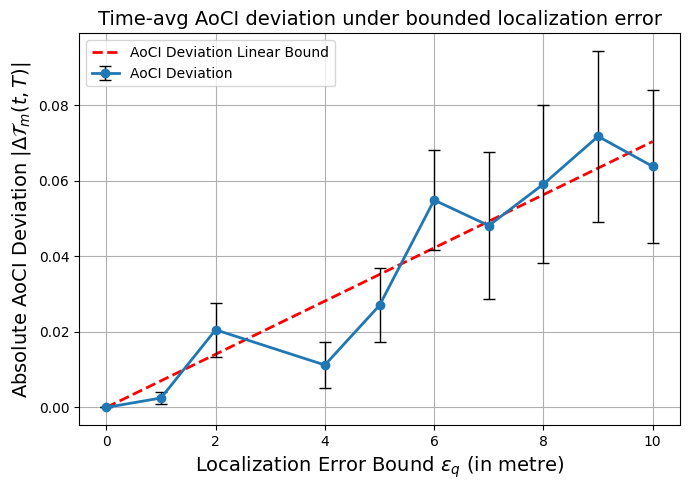

In [ ]:
#Updated

import numpy as np
import matplotlib.pyplot as plt
epsilon_values = np.array([0,1,2,4,5,6,7,8,9,10])
MonteCarlo_runs = 300
experiment_seeds = [10, 20, 30, 40, 50]   # multi-seed validation

def convert_to_npfloat64(data):
    """
    Accepts space-separated numeric string
    Returns list of np.float64 values
    """
    arr = [float(x) for x in data.split()]
    return [np.float64(x) for x in arr]

data = "0.         0.00704211 0.01408421 0.02816843 0.03521053 0.04225264 0.04929475 0.05633685 0.06337896 0.07042107"


theoretical_bound="0.         0.00704211 0.01408421 0.02816843 0.03521053 0.04225264 0.04929475 0.05633685 0.06337896 0.07042107"

theoretical_bound = convert_to_npfloat64(theoretical_bound)



theoretical_bound2="0.         0.00631756 0.01263512 0.02527024 0.0315878  0.03790536 0.04422292 0.05054048 0.05685804 0.0631756"

theoretical_bound2 = convert_to_npfloat64(theoretical_bound2)
mean_abs_dev="0.         0.00249575 0.02056003 0.01122777 0.0270278  0.05491221 0.04815342 0.05914139 0.07179415 0.06383405"

mean_abs_dev = convert_to_npfloat64(mean_abs_dev)

mean_abs_dev2="0.         0.00161599 0.00607618 0.00950023 0.01869102 0.03104647 0.05673327 0.04047736 0.07153969 0.06790905"
mean_abs_dev2 = convert_to_npfloat64(mean_abs_dev2)

# ci="0.         0.00146465 0.02818203 0.00601703 0.00979996 0.04316432 0.03138419 0.02891115 0.02656859 0.03099051"
# ci = convert_to_npfloat64(ci)

# ci2="0.         0.00075746 0.00476711 0.00758637 0.00822423 0.01508539 0.05755565 0.04222083 0.03731779 0.05307477"
# ci2 = convert_to_npfloat64(ci2)

ci=[np.float64(0.0), np.float64(0.00146465), np.float64(0.00718203),
    np.float64(0.00601703), np.float64(0.00979996), np.float64(0.01316432),
    np.float64(0.01938419), np.float64(0.02091115), np.float64(0.02256859), np.float64(0.02029051)]





plt.figure(figsize=(7,5))

plt.plot(epsilon_values,
         theoretical_bound,
         '--',
         linewidth=2,
         color='red' , # #5DADE2',
         label='AoCI Deviation Linear Bound')

plt.errorbar(epsilon_values,
             mean_abs_dev,
             yerr=ci,
             marker='o',
             linewidth=2,
             color='#1f77b4',              # solid line
            #  ecolor=(0.43, 0.47, 0.71, 0.35),  # RGBA with low alpha
             ecolor=(0,0,0, 1),  # RGBA with low alpha
             elinewidth=1,
             capsize=4,
             label='AoCI Deviation')


plt.xlabel(r"Localization Error Bound $\varepsilon_q$ (in metre)",fontsize=14)
plt.ylabel(r"Absolute AoCI Deviation $|\Delta \mathcal{T}_m(t,T)|$",fontsize=14)
plt.title("Time-avg AoCI deviation under bounded localization error",fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

